<a href="https://colab.research.google.com/github/2712-pree/2712-pree.github.io/blob/main/AreaOfSignalPad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab.patches import cv2_imshow
import torch

In [ ]:
!nvidia-smi

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://ik.imagekit.io/roboflow/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow


rf = Roboflow(api_key="uSFDZ7Wig5WHiCWUGNrq")
project = rf.workspace("vesit-nx31u").project("tifr")
dataset = project.version(2).download("yolov8")


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data=/content/datasets/TIFR-2/data.yaml epochs=100 imgsz=640

In [ ]:
!ls {HOME}/runs/segment/train/

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

In [ ]:
!zip -r /content/folder.zip /content/datasets

In [ ]:
!zip -r /content/yolo.zip /content/runs

In [ ]:
from google.colab import files
files.download('/content/yolo.zip')

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11782309 parameters, 0 gradients, 42.5 GFLOPs

image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole82.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 1 None, 17.6ms
Speed: 0.5ms pre-process, 17.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


[4.0, 0.0, 2.0, 6.0]


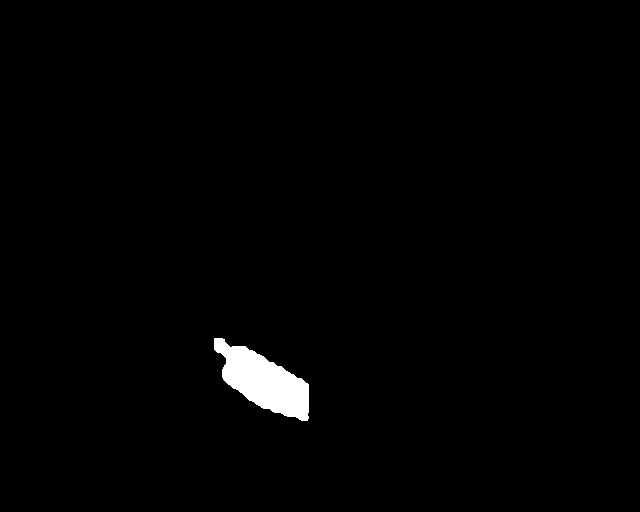

Number of Contours found = 1
Area= 4743.5


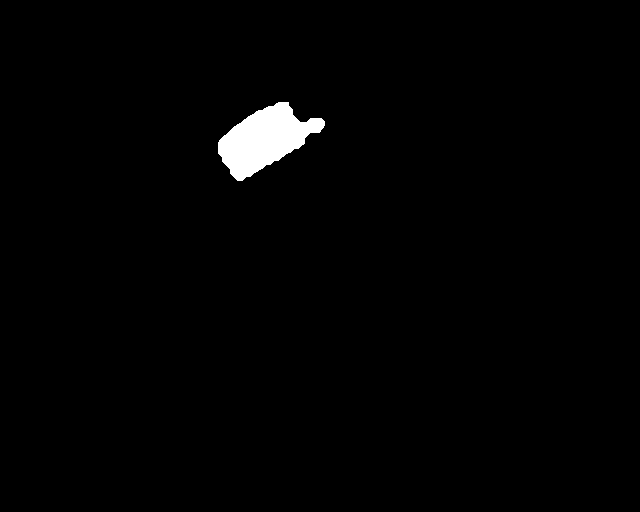

Number of Contours found = 1
Area= 5131.5


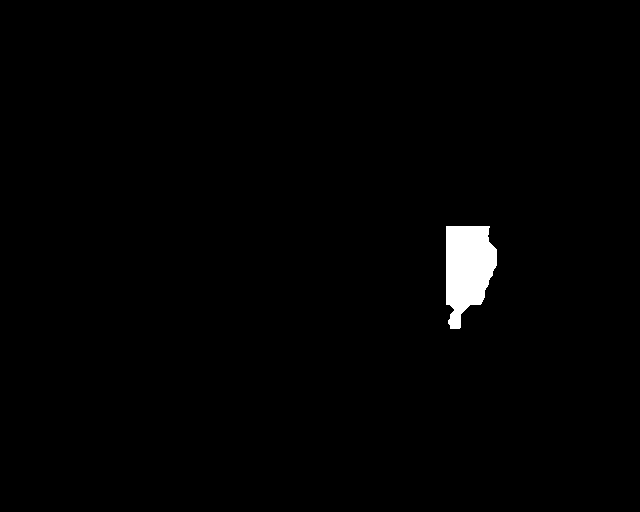

Number of Contours found = 1
Area= 4533.5


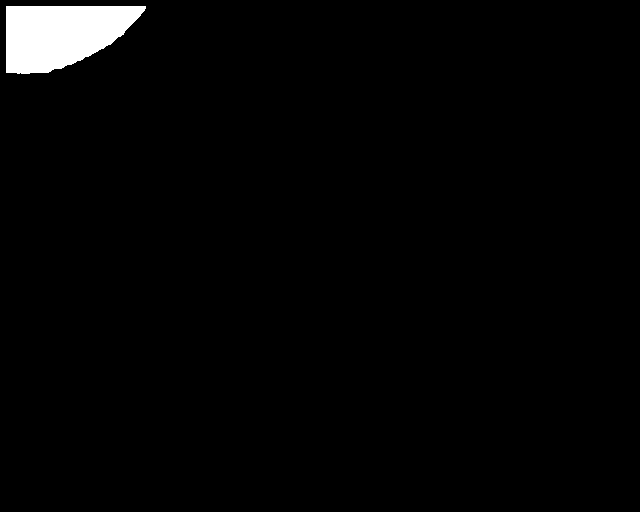

Number of Contours found = 1
Area= 7878.0


In [ ]:
my_model = YOLO('/content/best.pt')
results = list(my_model('/content/drive/MyDrive/Dataset/Stage1_PCB/Hole82.jpg', conf=0.128))
result=results[0]
test_list=result.boxes.cls.cpu().numpy().tolist()
print(test_list)
# mask=  (result.masks.masks[1].cpu().numpy() * 255).astype("uint8")
# ret, thresh = cv2.threshold(mask, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# pixels = cv2.countNonZero(thresh)
# print(pixels)
for mask in result.masks.masks:
      #cv2_imshow((mask.cpu().numpy() * 255).astype("uint8"))
      m=(mask.cpu().numpy() * 255).astype("uint8")
      edged = cv2.Canny(m, 30, 200)
      contours, hierarchy = cv2.findContours(edged,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
      img=cv2.drawContours(m, contours, -1, (0, 255, 0), 3)
      cv2_imshow(m)
      print("Number of Contours found = " + str(len(contours)))
      for contour in contours:
        area=cv2.contourArea(contour)
        print(f'Area= {area}')


Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11782309 parameters, 0 gradients, 42.5 GFLOPs

image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole1.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.9ms
Speed: 0.6ms pre-process, 17.9ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


3


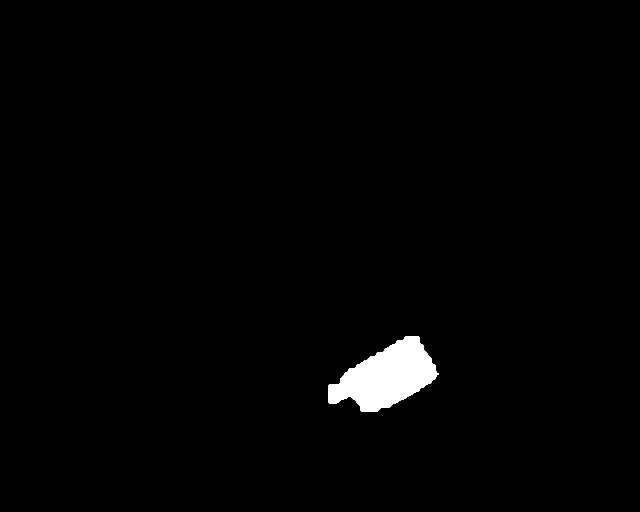

Number of Contours found = 1


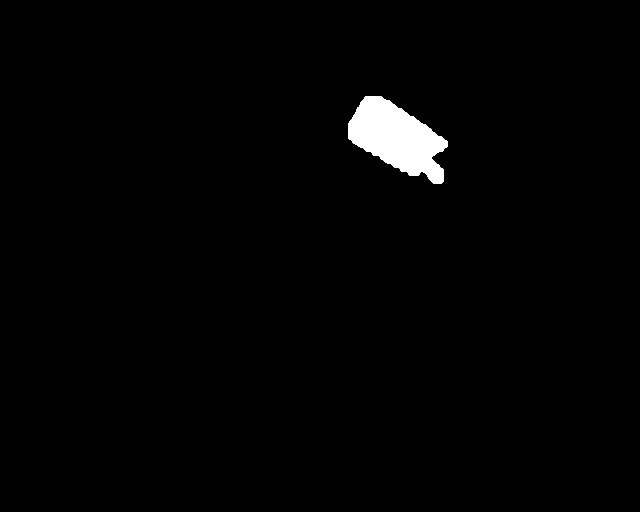

Number of Contours found = 1


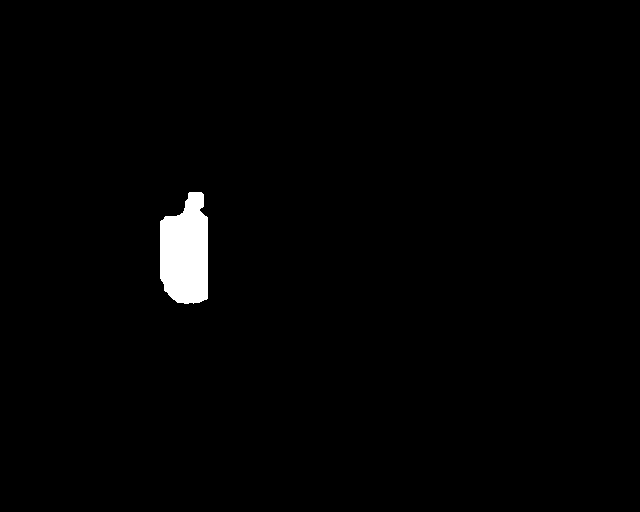


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole2.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 1 None, 17.0ms
Speed: 0.5ms pre-process, 17.0ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


Number of Contours found = 1
4


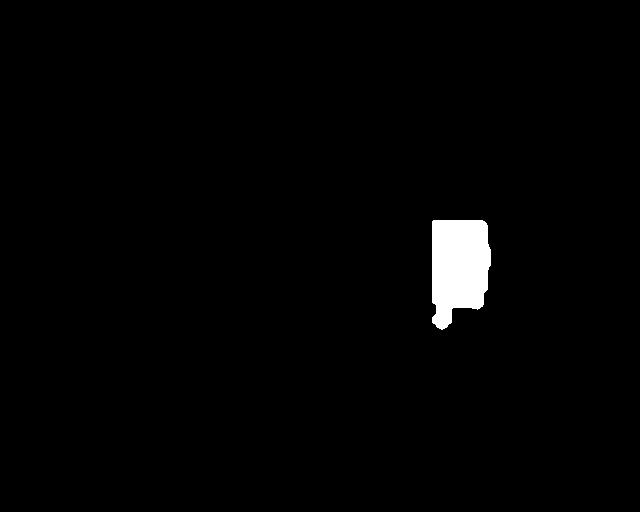

Number of Contours found = 1


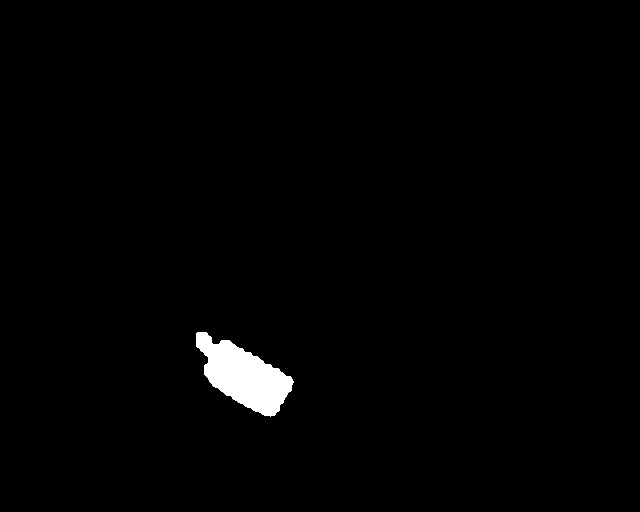

Number of Contours found = 1


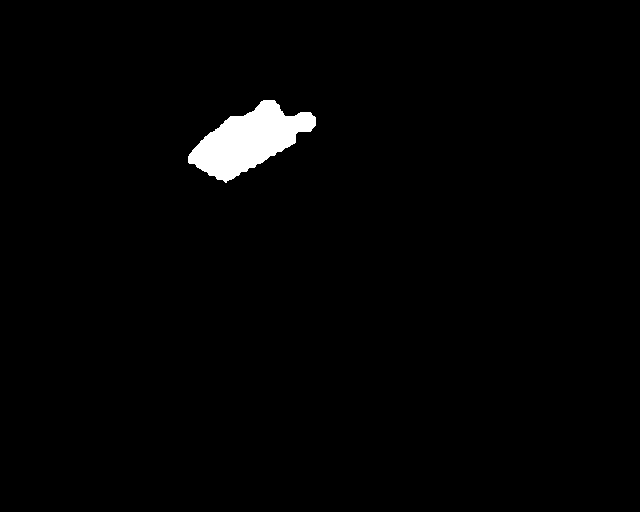

Number of Contours found = 1


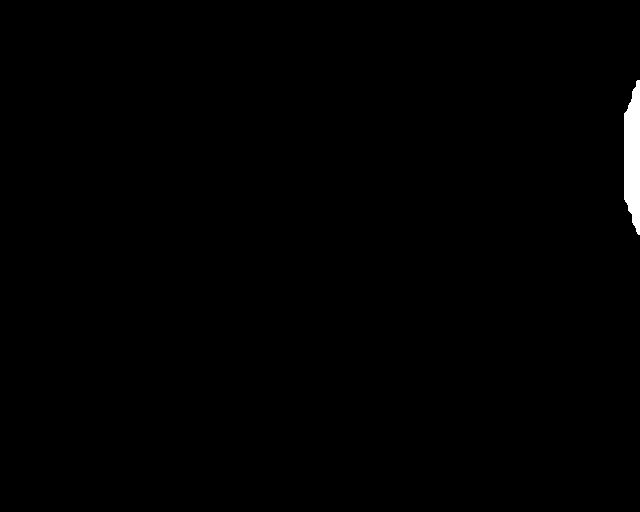

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole3.jpg: 512x640 1 3_SignalPad, 2 Nones, 17.2ms
Speed: 0.6ms pre-process, 17.2ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)



2


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole4.jpg: 512x640 1 3_SignalPad, 1 7_SignalPad, 17.0ms
Speed: 0.7ms pre-process, 17.0ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


2


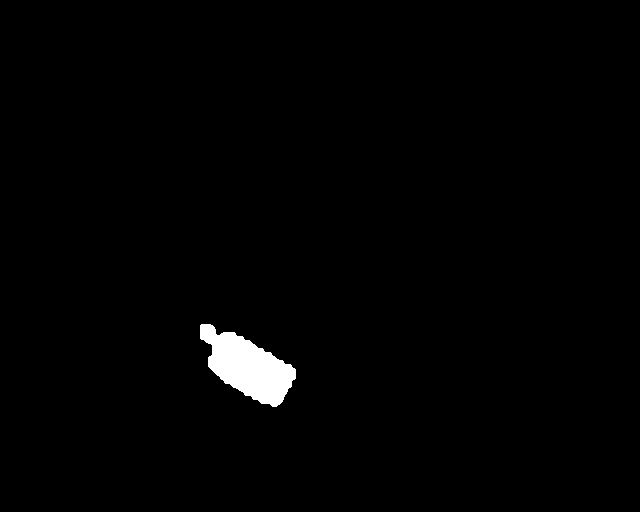

Number of Contours found = 1


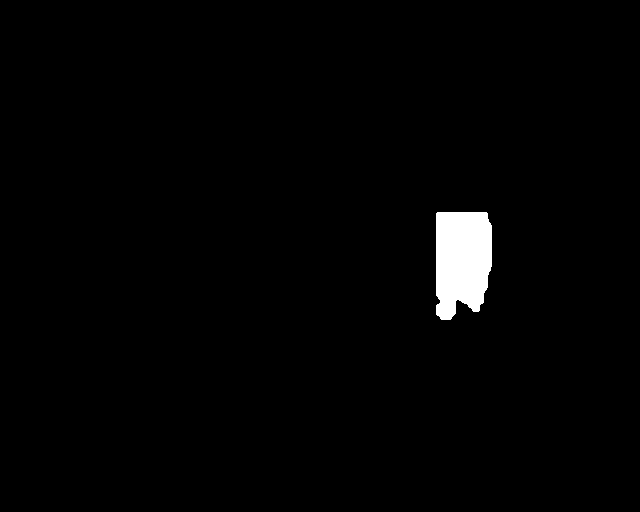

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole5.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


3


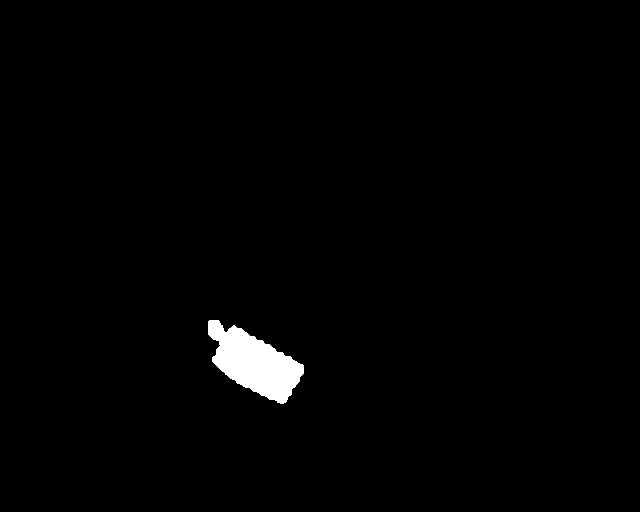

Number of Contours found = 1


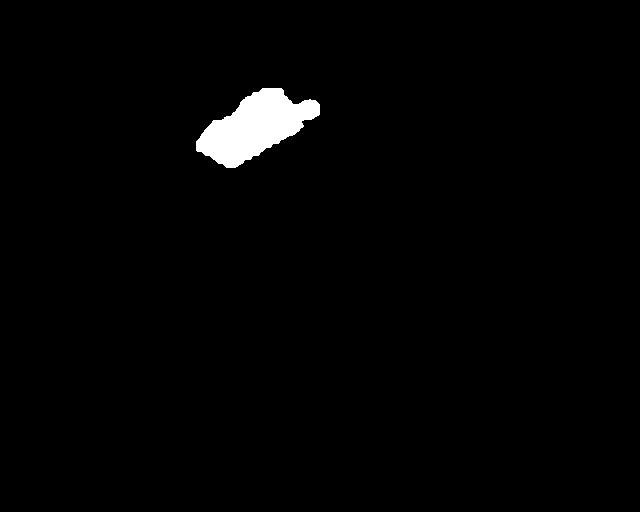

Number of Contours found = 1


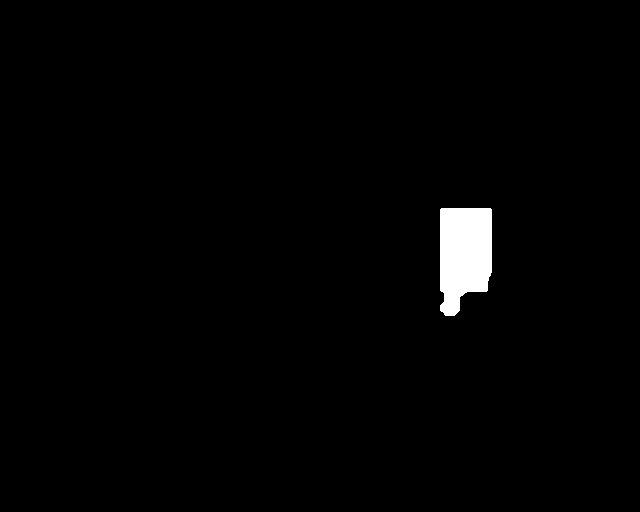


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole6.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.0ms
Speed: 0.7ms pre-process, 17.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


Number of Contours found = 1
3


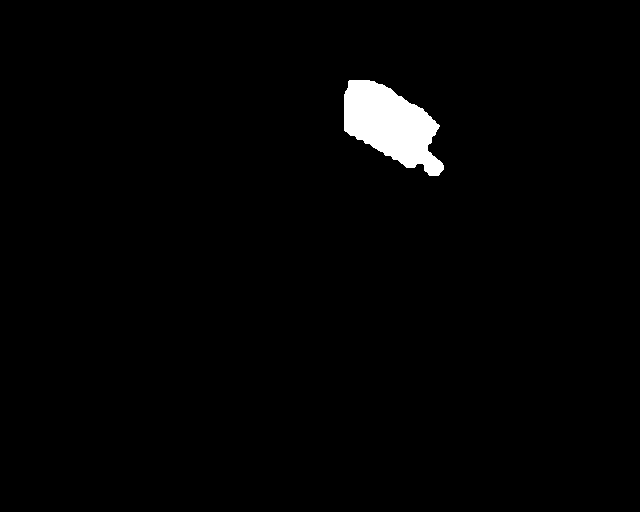

Number of Contours found = 1


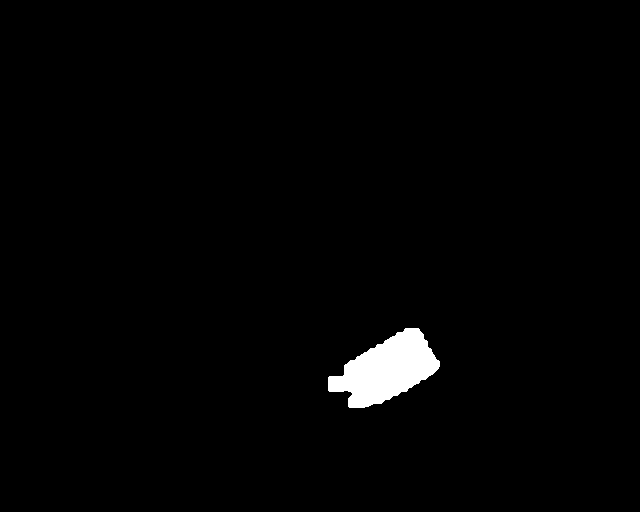

Number of Contours found = 1


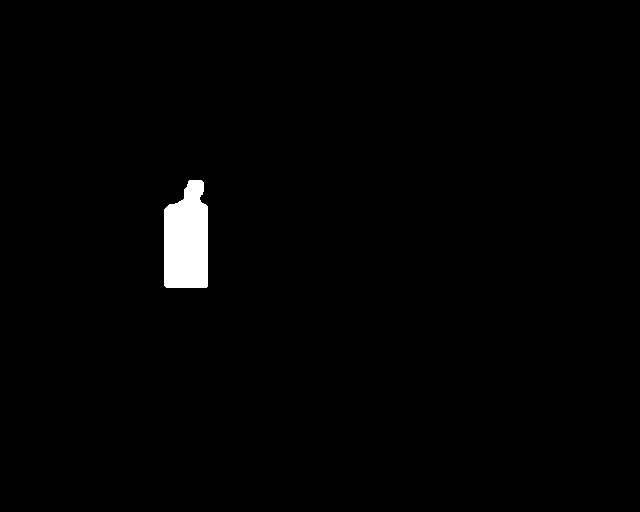


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole7.jpg: 512x640 2 1_SignalPads, 1 5_SignalPad, 17.4ms
Speed: 0.6ms pre-process, 17.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


Number of Contours found = 1
2


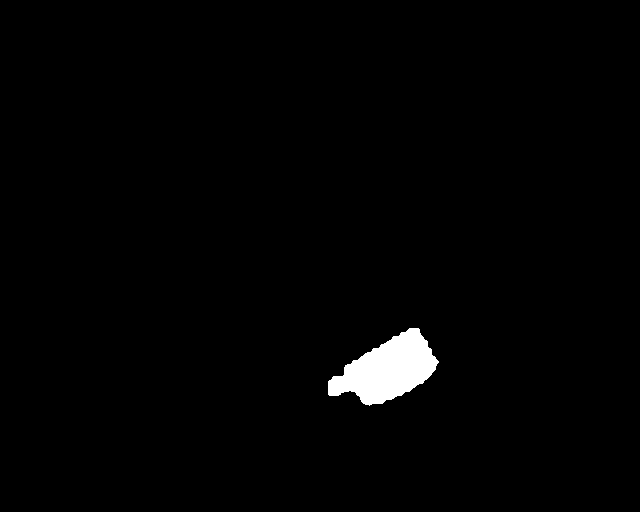

Number of Contours found = 1


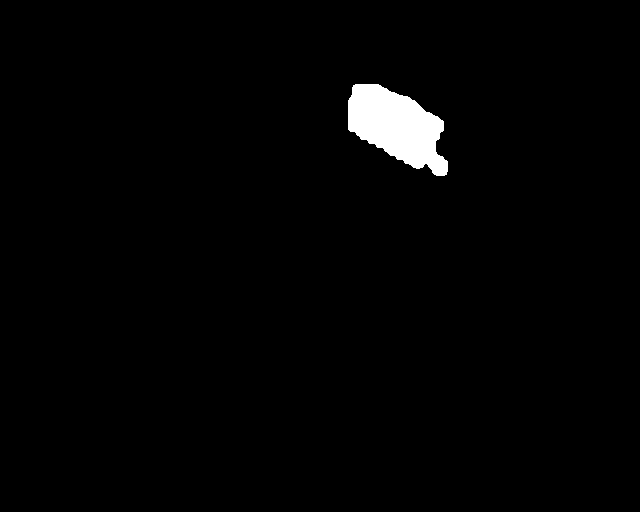

Number of Contours found = 1

image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole8.jpg: 512x640 1 3_SignalPad, 17.1ms
Speed: 0.6ms pre-process, 17.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


1


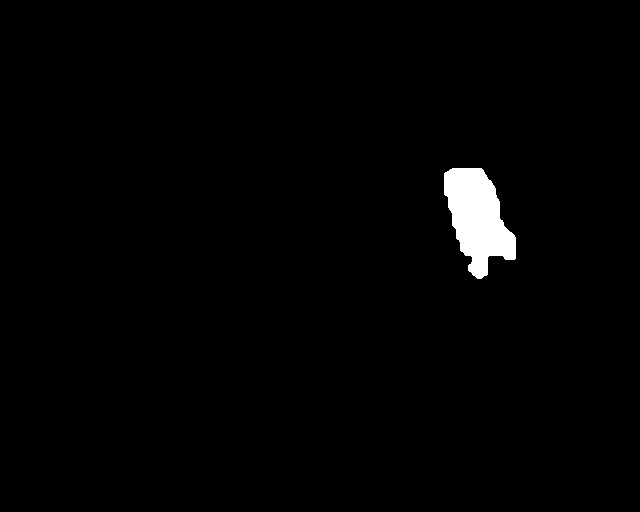

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole9.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 17.5ms
Speed: 0.6ms pre-process, 17.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


2


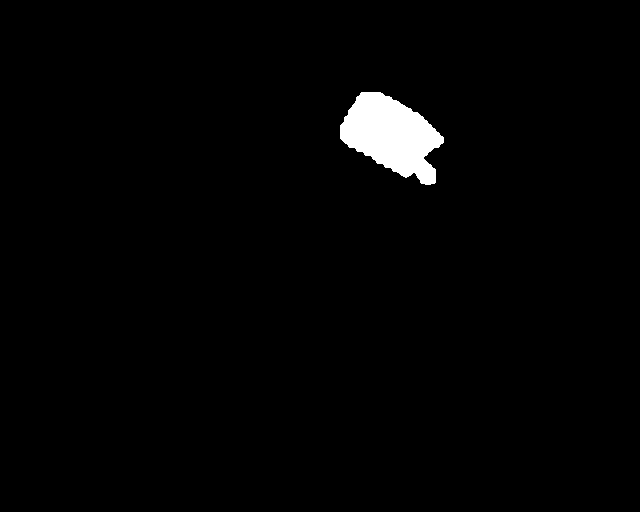

Number of Contours found = 1


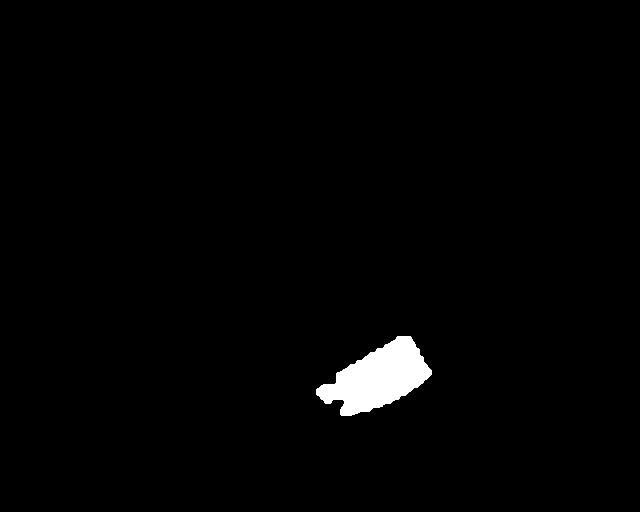

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole10.jpg: 512x640 1 5_SignalPad, 1 9_SignalPad, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


2


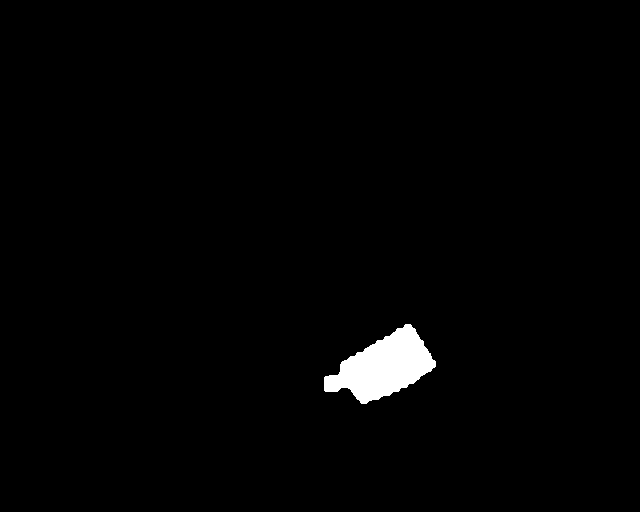

Number of Contours found = 1


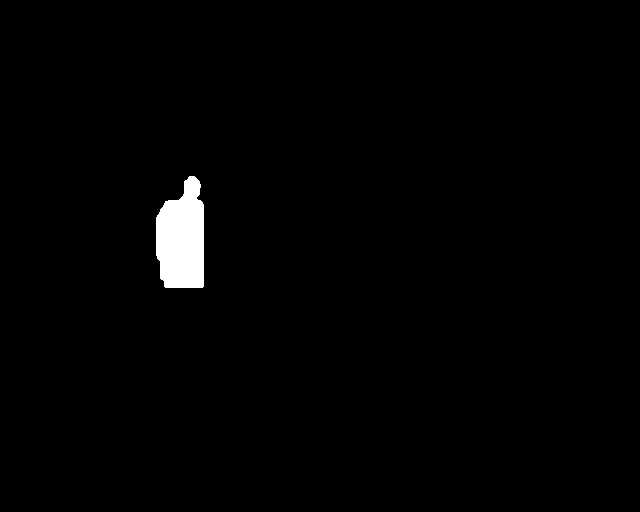

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole11.jpg: 512x640 1 None, 17.4ms
Speed: 0.6ms pre-process, 17.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


1


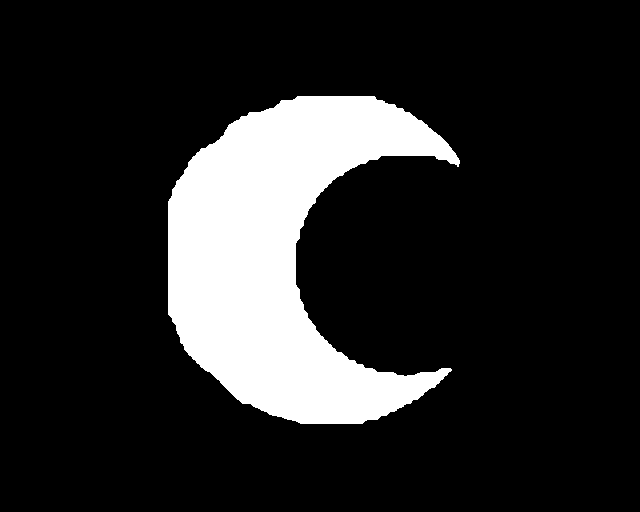

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole12.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 17.0ms
Speed: 0.5ms pre-process, 17.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


3


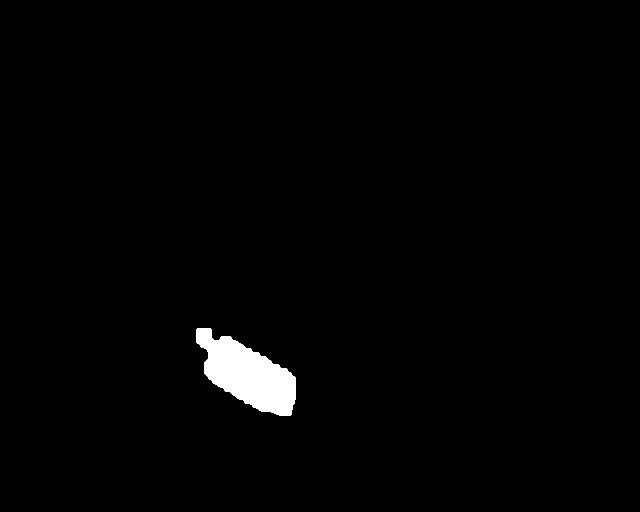

Number of Contours found = 1


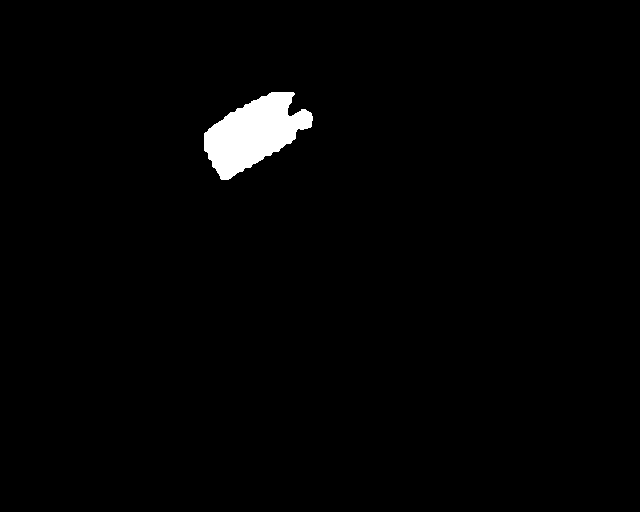

Number of Contours found = 1


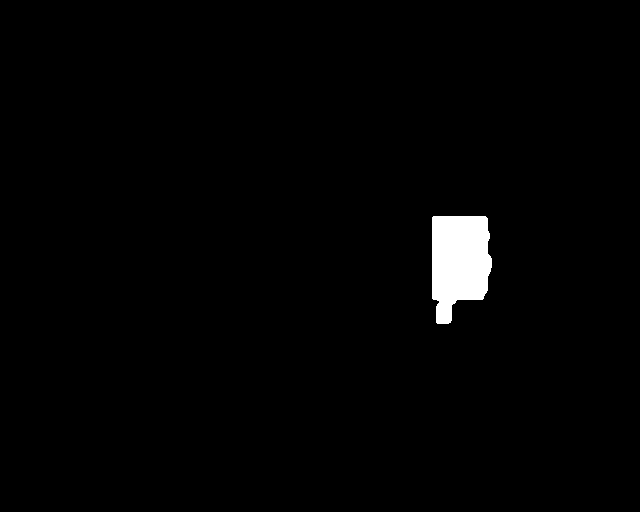

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole13.jpg: 512x640 1 5_SignalPad, 17.1ms
Speed: 0.8ms pre-process, 17.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


1


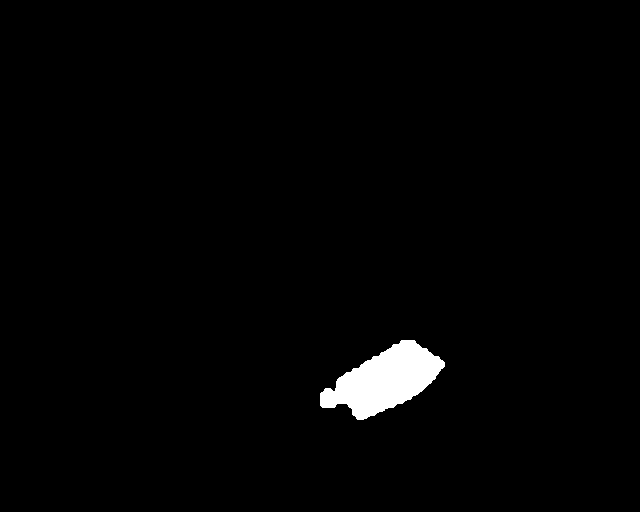

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole14.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 17.1ms
Speed: 0.6ms pre-process, 17.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


3


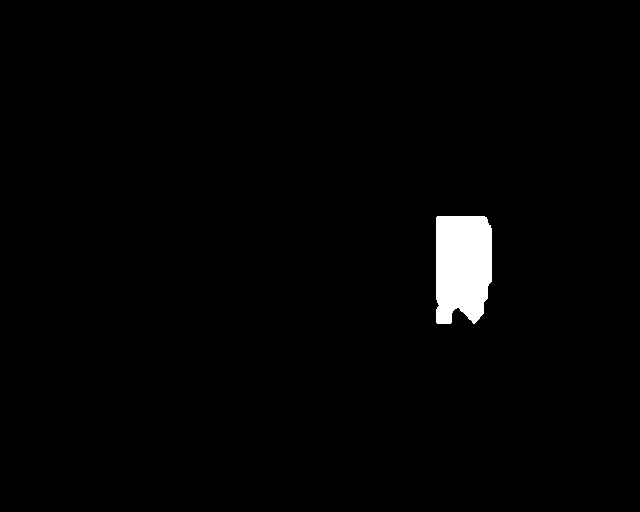

Number of Contours found = 1


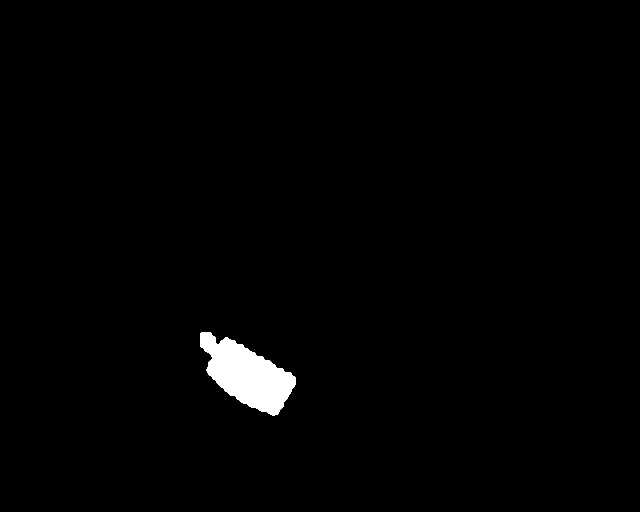

Number of Contours found = 1


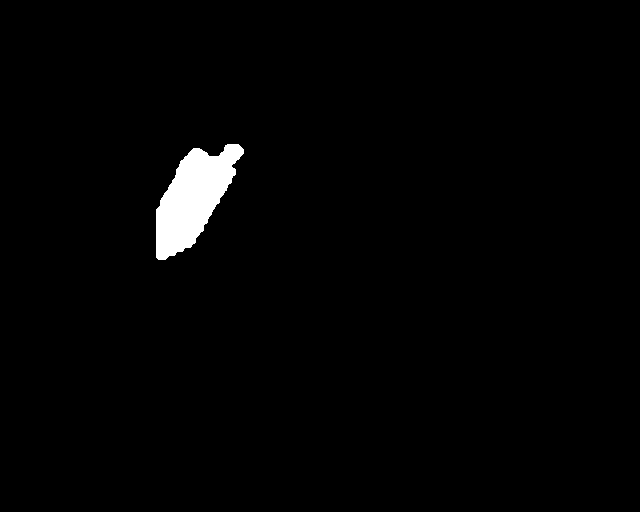

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole15.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.0ms
Speed: 1.5ms pre-process, 17.0ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


3


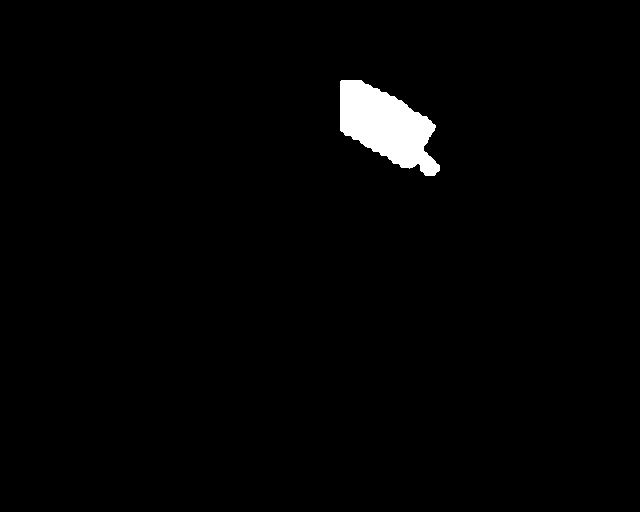

Number of Contours found = 1


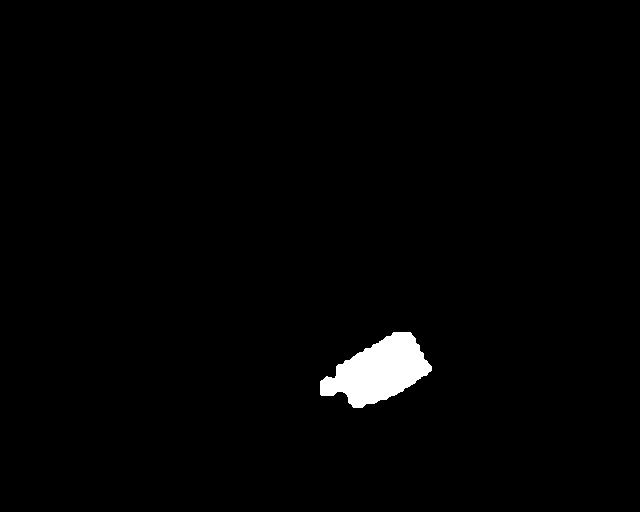

Number of Contours found = 1


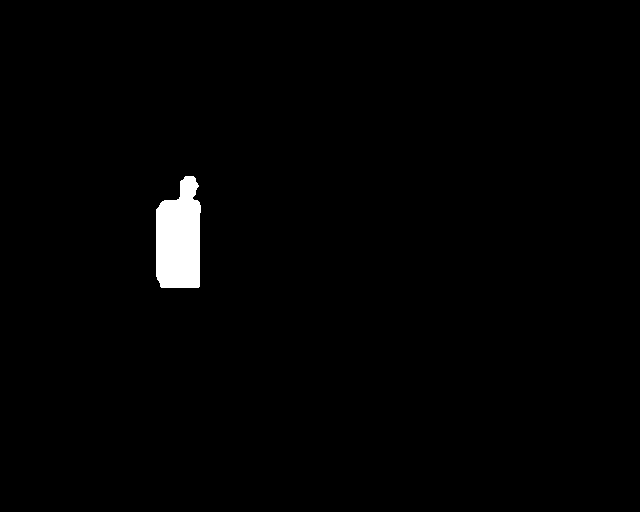

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole16.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


3


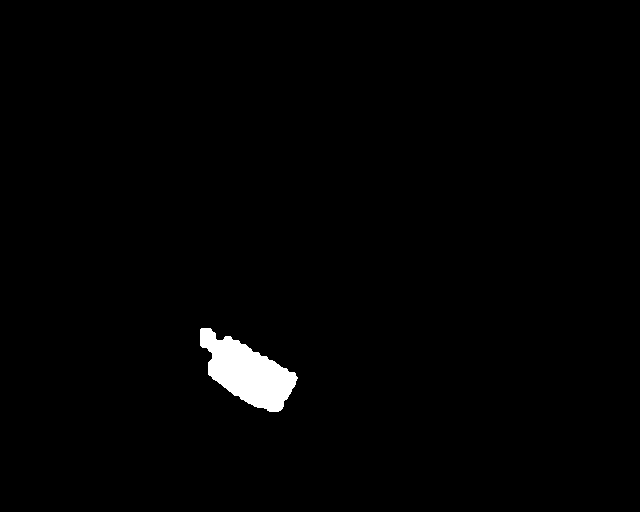

Number of Contours found = 1


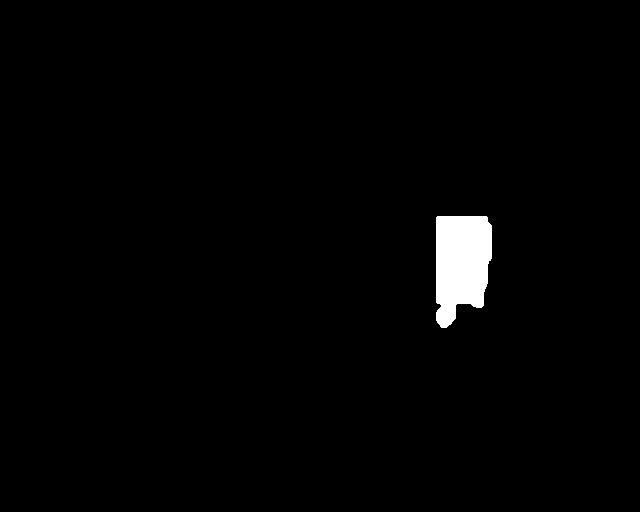

Number of Contours found = 1


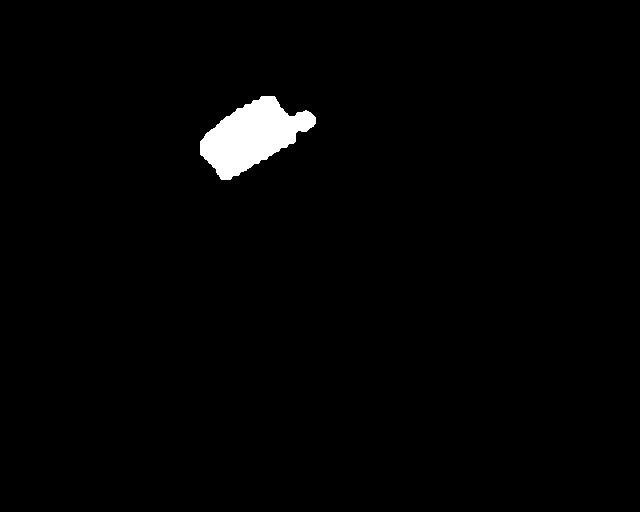


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole17.jpg: 512x640 1 11_SignalPad, 1 7_SignalPad, 17.5ms
Speed: 0.6ms pre-process, 17.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


Number of Contours found = 1
2


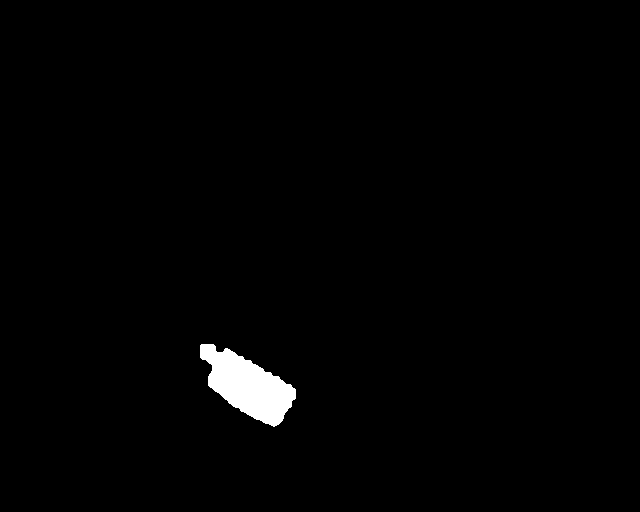

Number of Contours found = 1


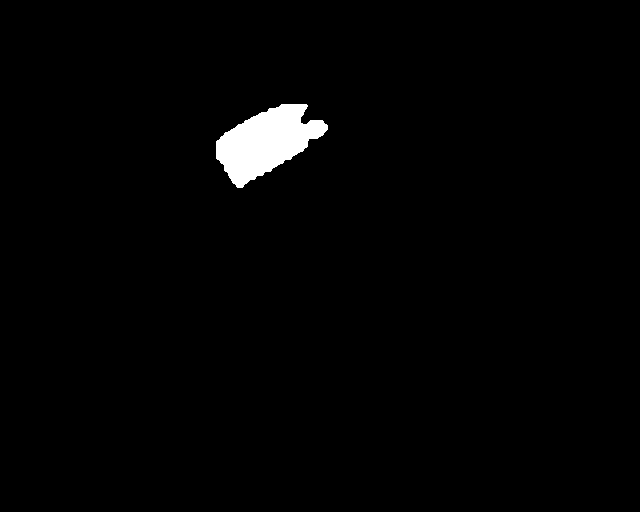

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole18.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 17.1ms
Speed: 0.7ms pre-process, 17.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


3


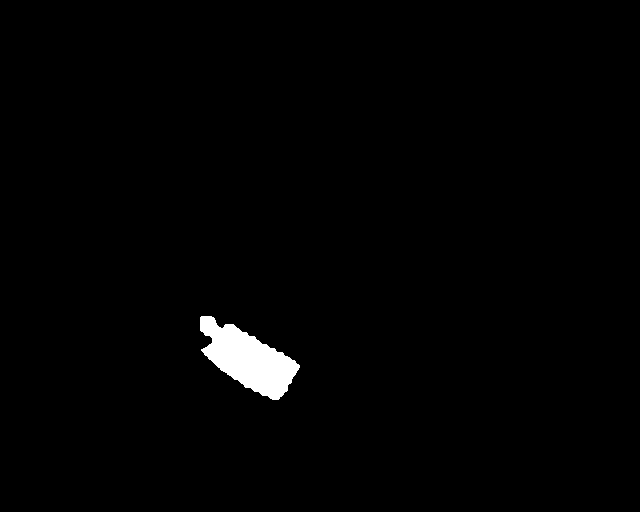

Number of Contours found = 1


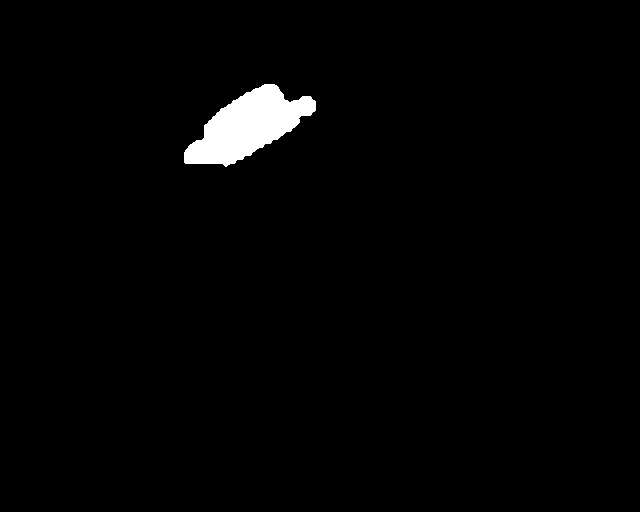

Number of Contours found = 1


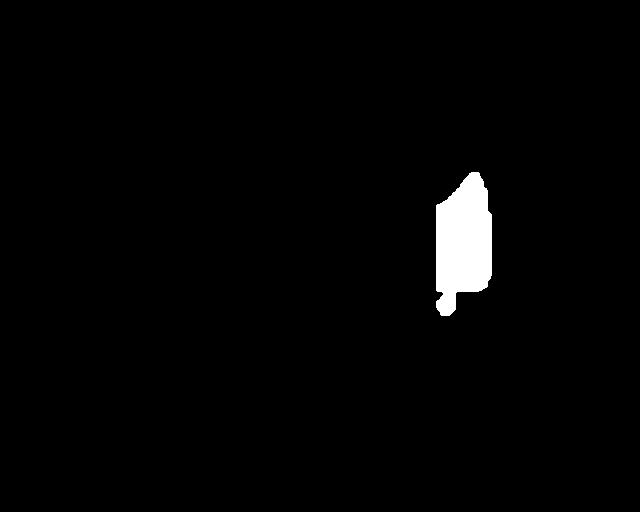

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole19.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.1ms
Speed: 0.6ms pre-process, 17.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


3


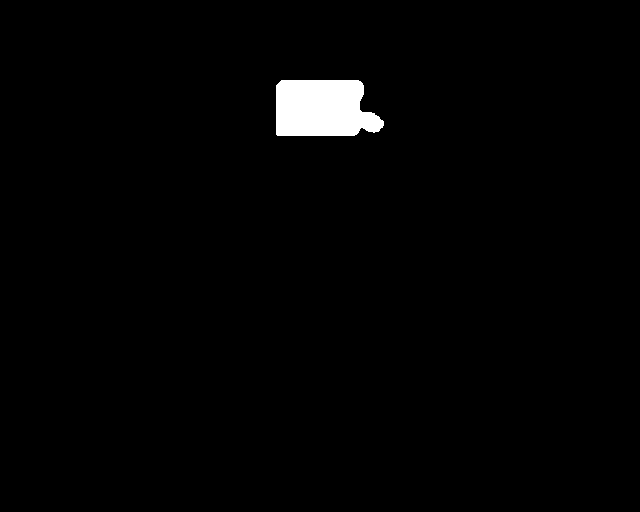

Number of Contours found = 1


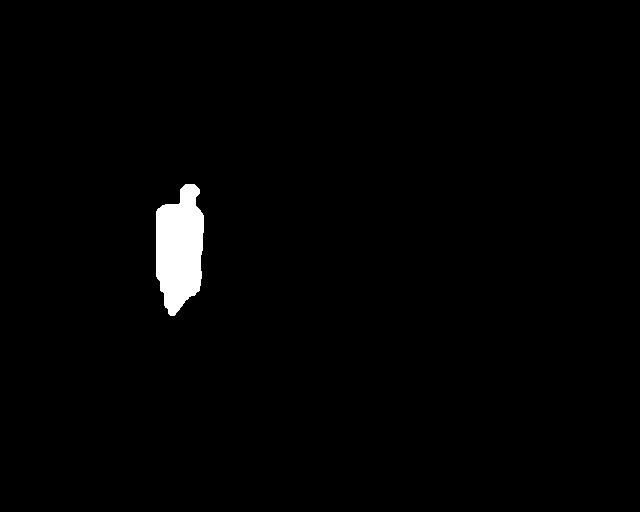

Number of Contours found = 1


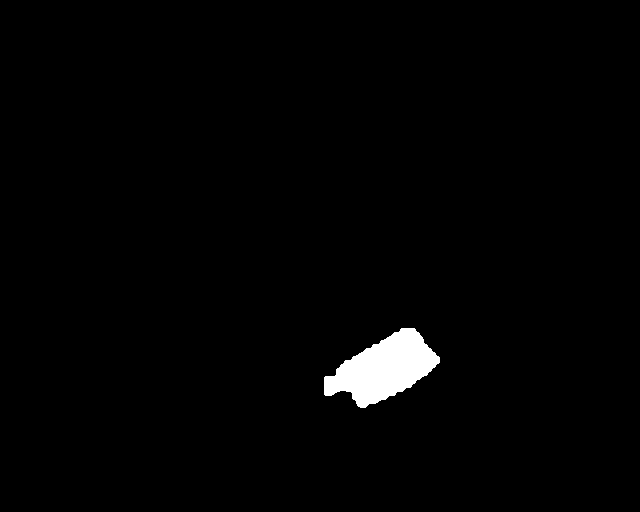

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole20.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.0ms
Speed: 0.5ms pre-process, 17.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


3


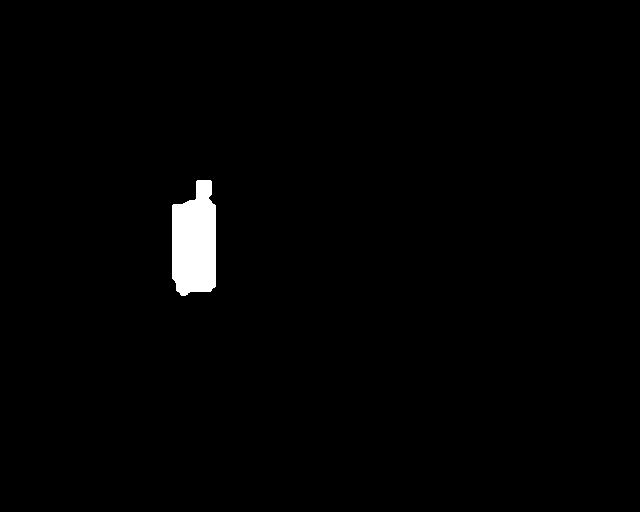

Number of Contours found = 1


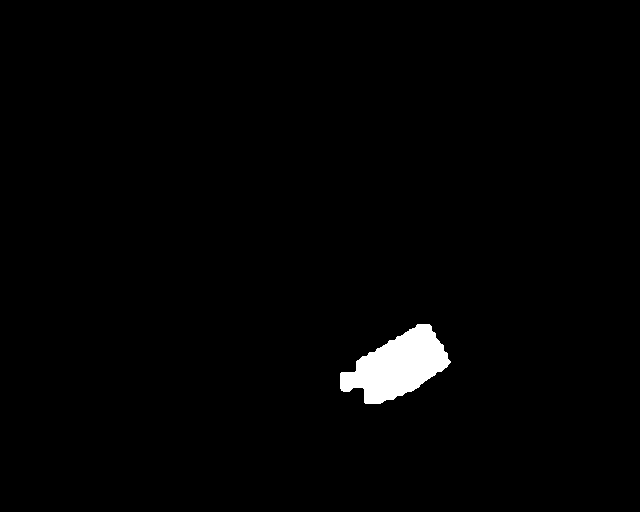

Number of Contours found = 1


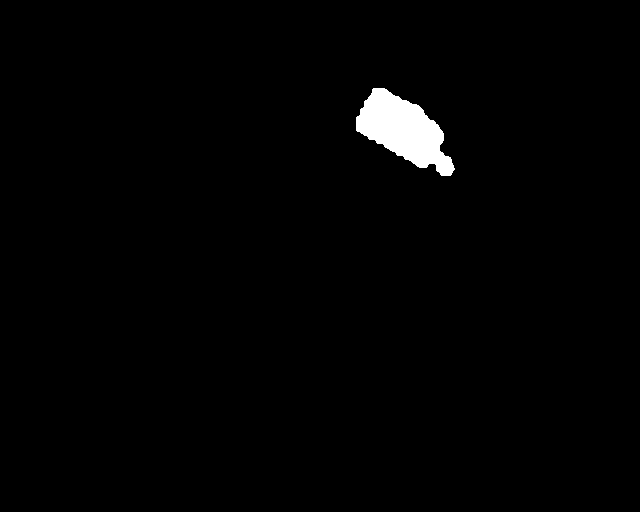

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole21.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.1ms
Speed: 0.6ms pre-process, 17.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


3


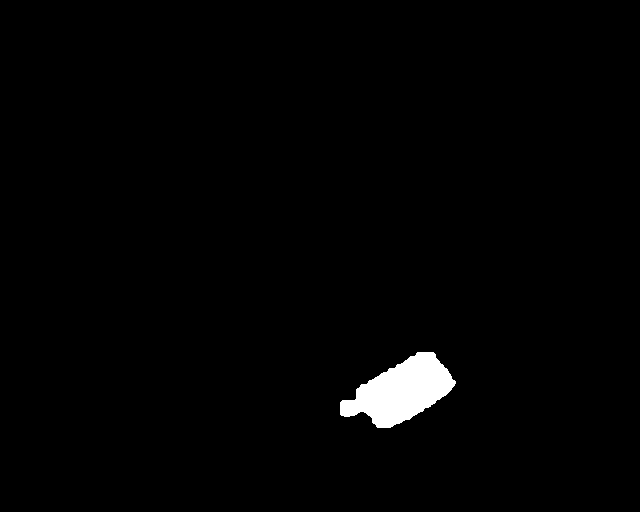

Number of Contours found = 1


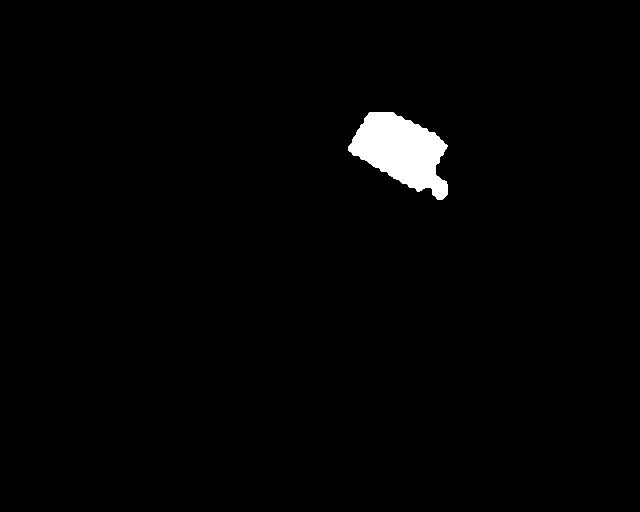

Number of Contours found = 1


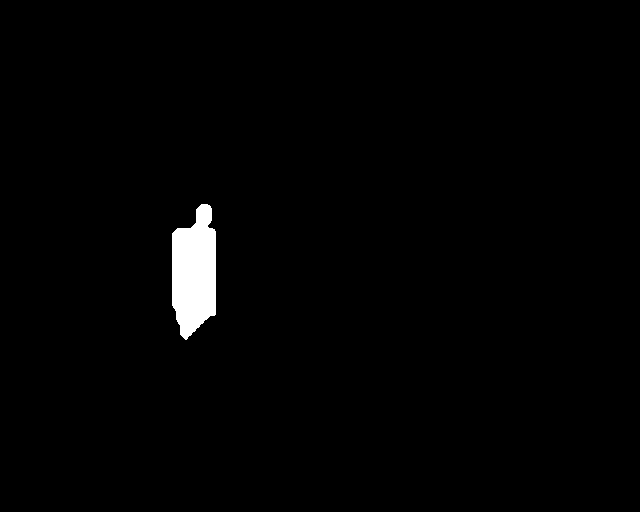

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole22.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 18.5ms
Speed: 0.7ms pre-process, 18.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


3


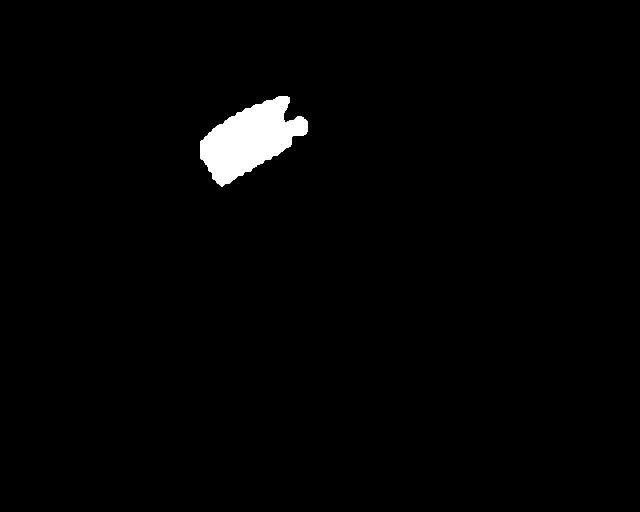

Number of Contours found = 1


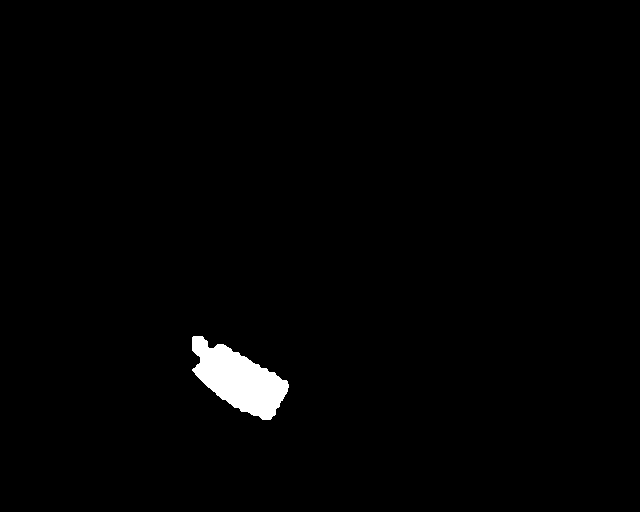

Number of Contours found = 1


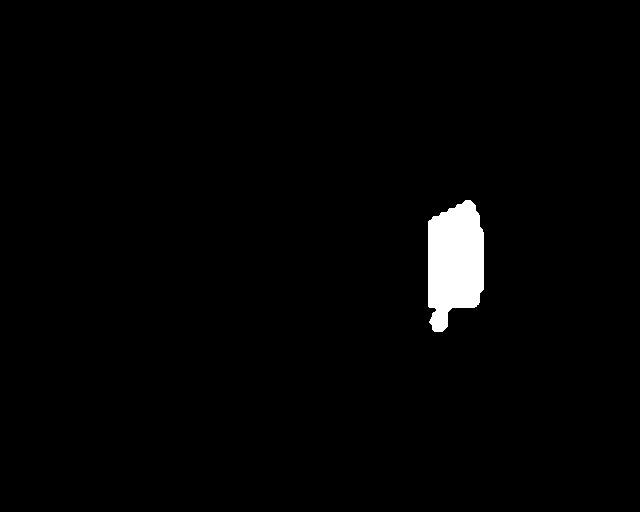

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole23.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 17.0ms
Speed: 0.7ms pre-process, 17.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


3


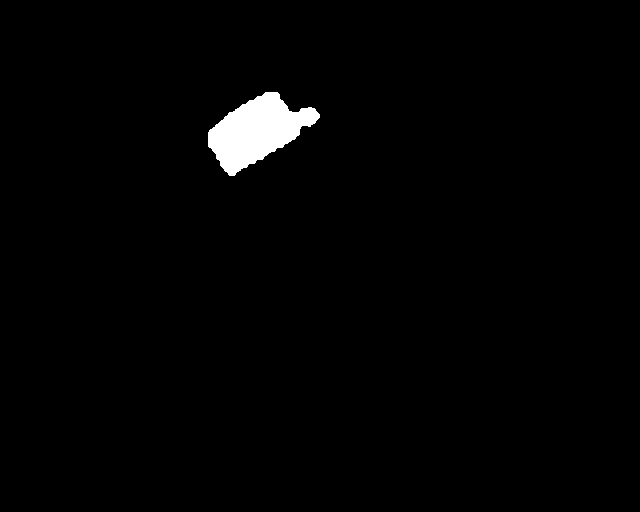

Number of Contours found = 1


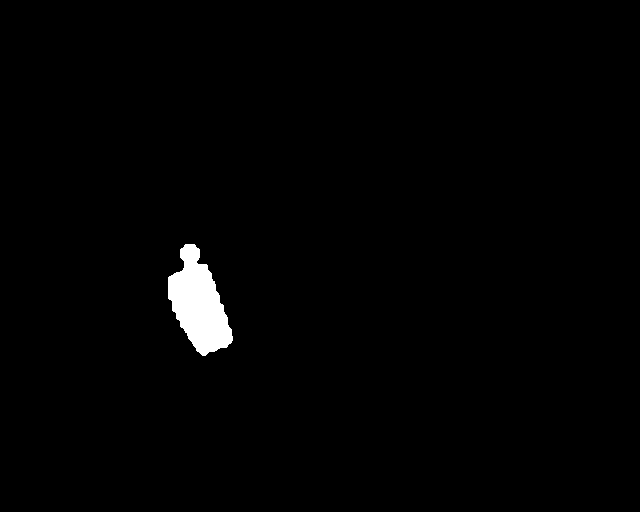

Number of Contours found = 1


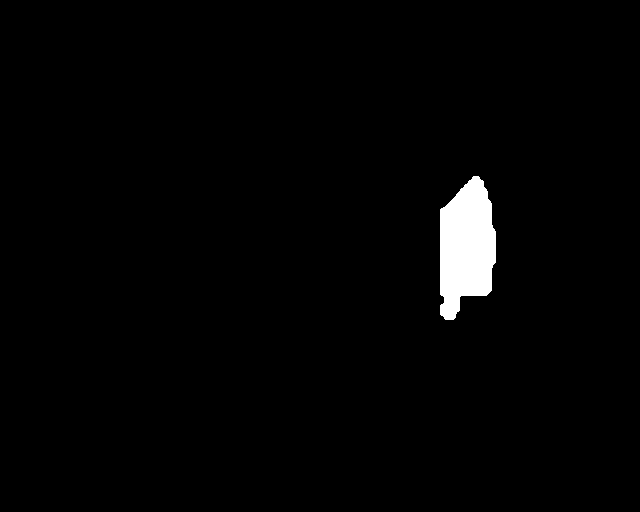

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole24.jpg: 512x640 1 11_SignalPad, 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 18.7ms
Speed: 0.6ms pre-process, 18.7ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)


4


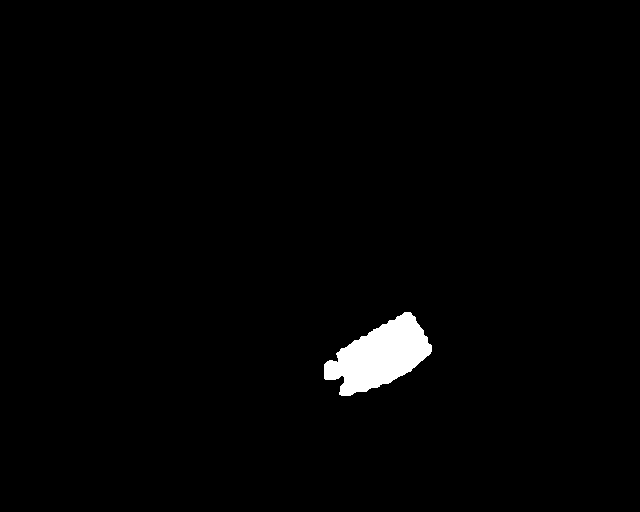

Number of Contours found = 1


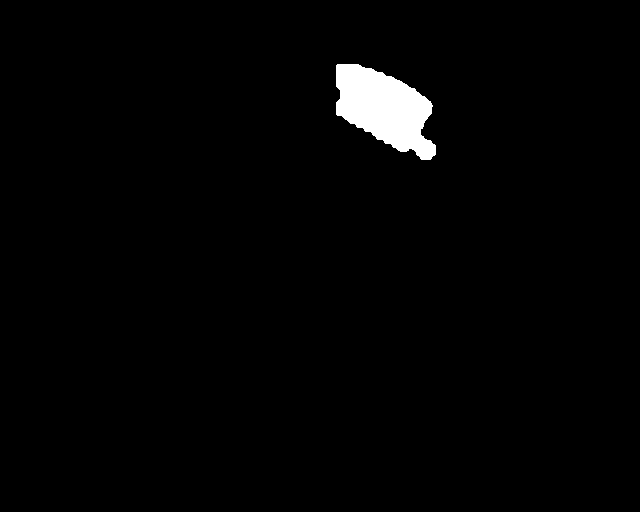

Number of Contours found = 1


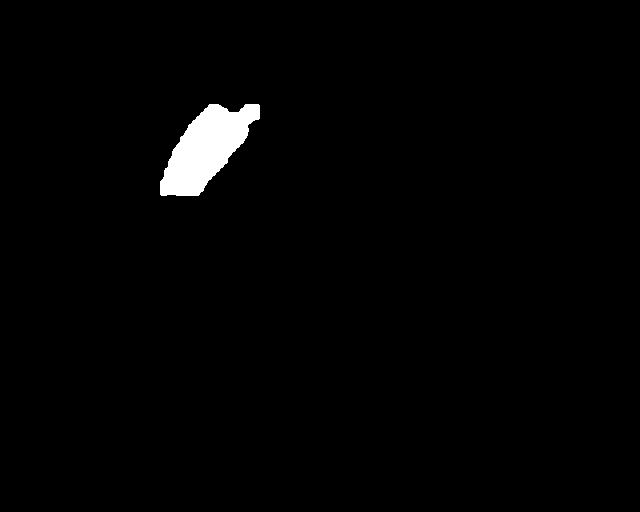

Number of Contours found = 1


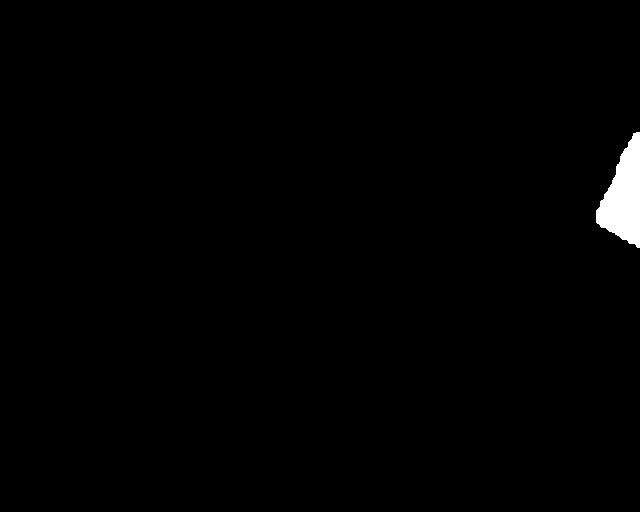

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole25.jpg: 512x640 1 7_SignalPad, 18.4ms
Speed: 0.7ms pre-process, 18.4ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)


1


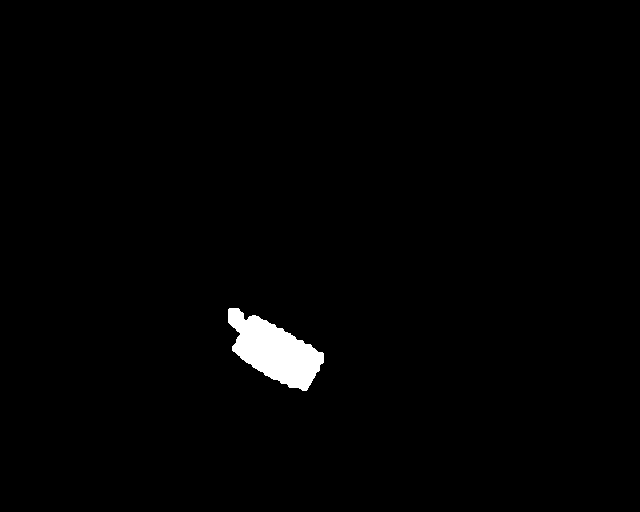


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole26.jpg: 512x640 1 3_SignalPad, 17.3ms
Speed: 1.3ms pre-process, 17.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


Number of Contours found = 1
1


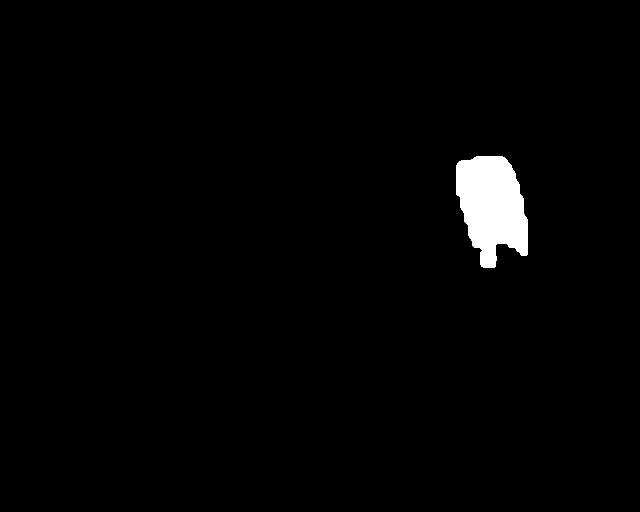

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole27.jpg: 512x640 1 9_SignalPad, 19.4ms
Speed: 0.6ms pre-process, 19.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


1


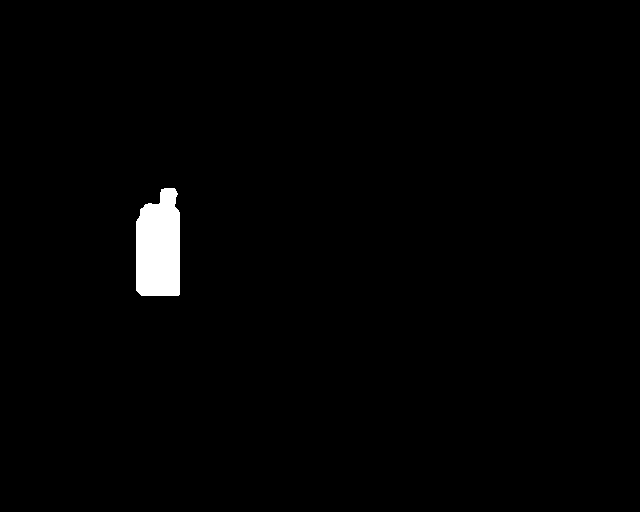

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole28.jpg: 512x640 1 3_SignalPad, 19.6ms
Speed: 0.6ms pre-process, 19.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


1


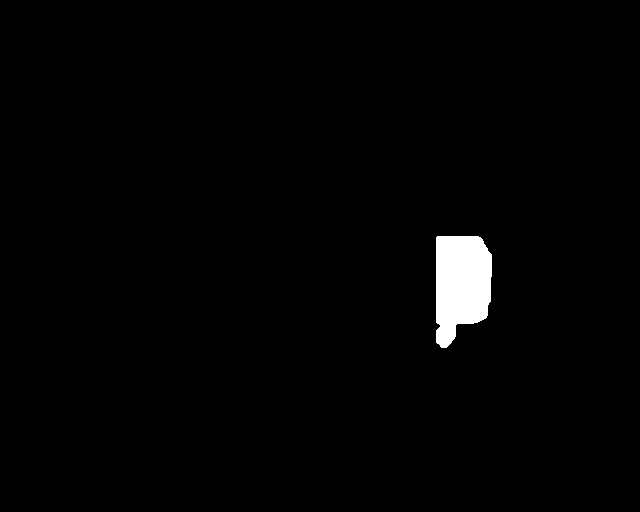

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole29.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.1ms
Speed: 0.6ms pre-process, 17.1ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


3


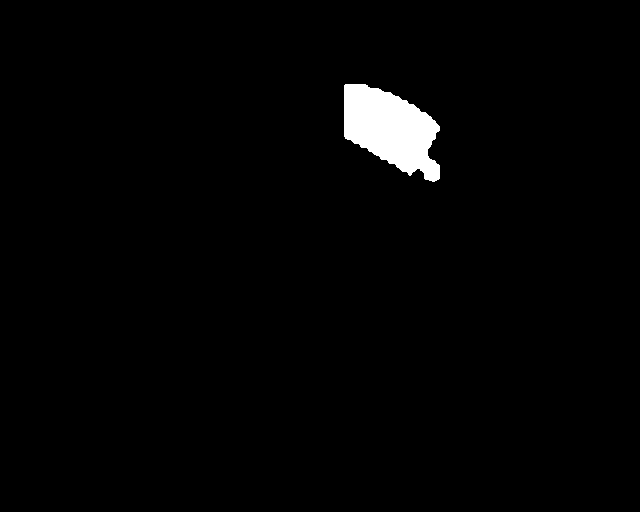

Number of Contours found = 1


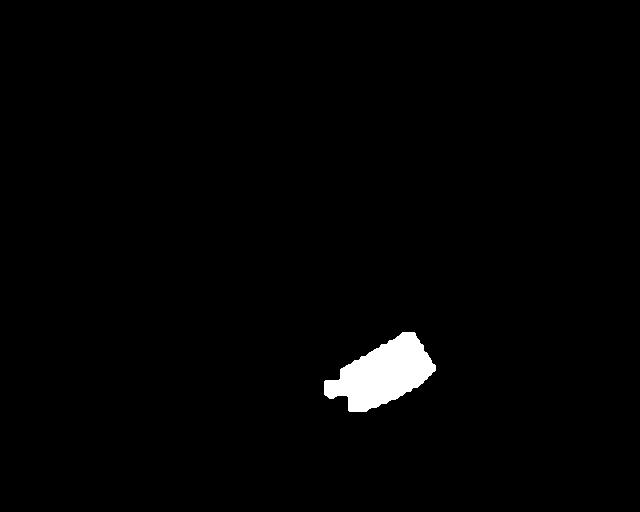

Number of Contours found = 1


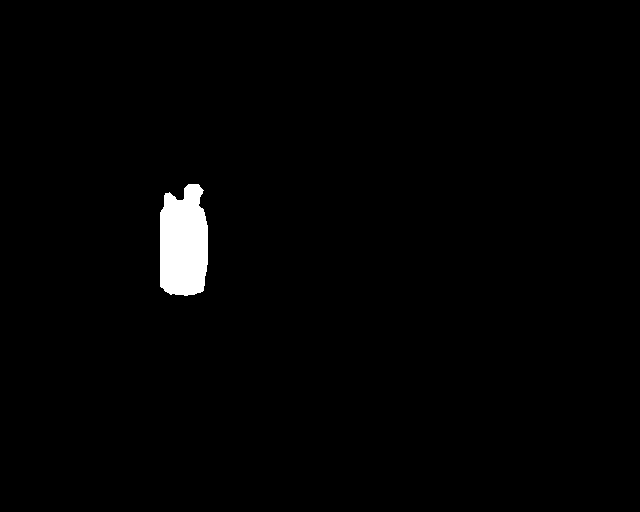

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole30.jpg: 512x640 1 5_SignalPad, 1 9_SignalPad, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)


2


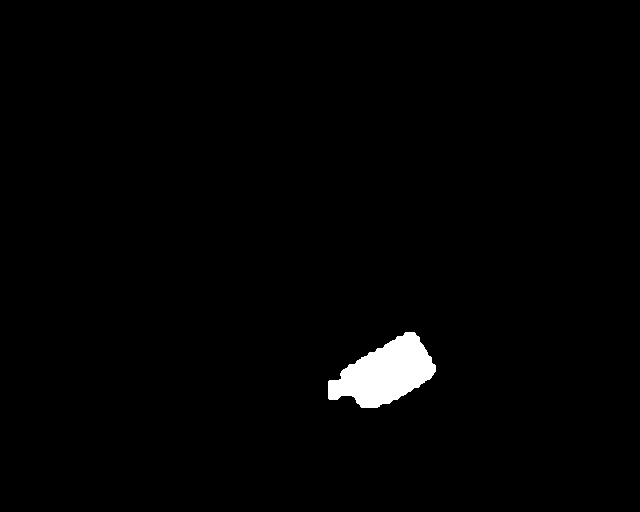

Number of Contours found = 1


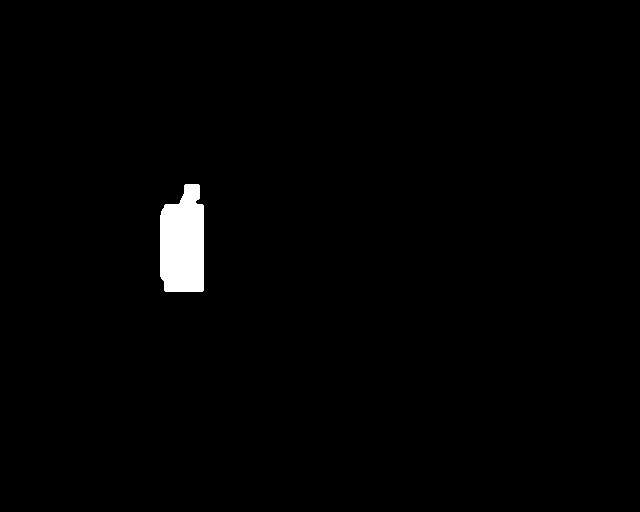

Number of Contours found = 1

image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole31.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)


2


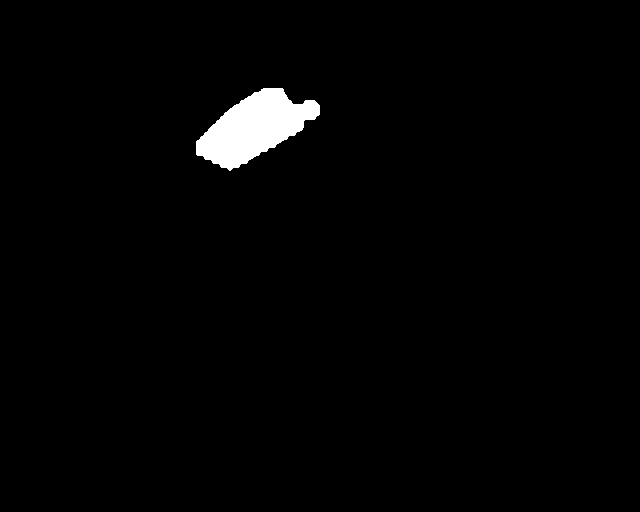

Number of Contours found = 1


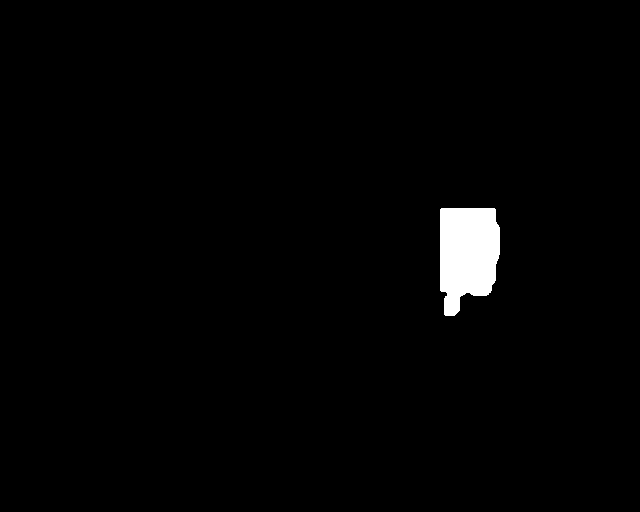

Number of Contours found = 1



image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole32.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 17.0ms
Speed: 0.7ms pre-process, 17.0ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


3


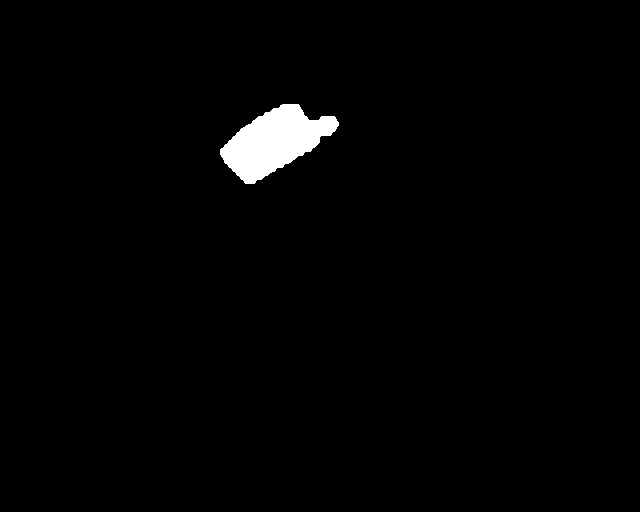

Number of Contours found = 1


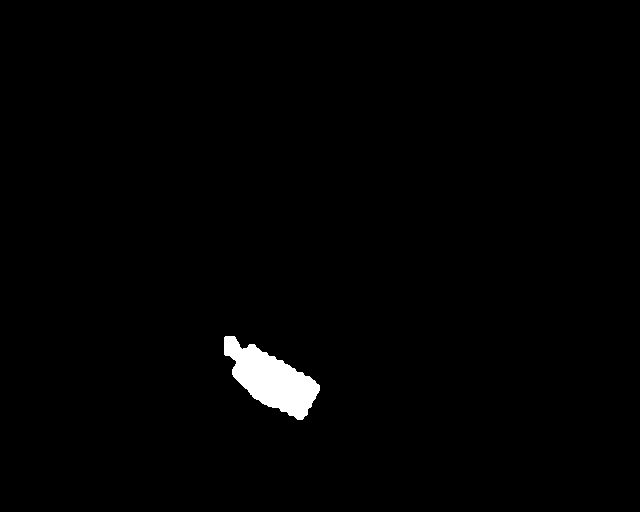

Number of Contours found = 1


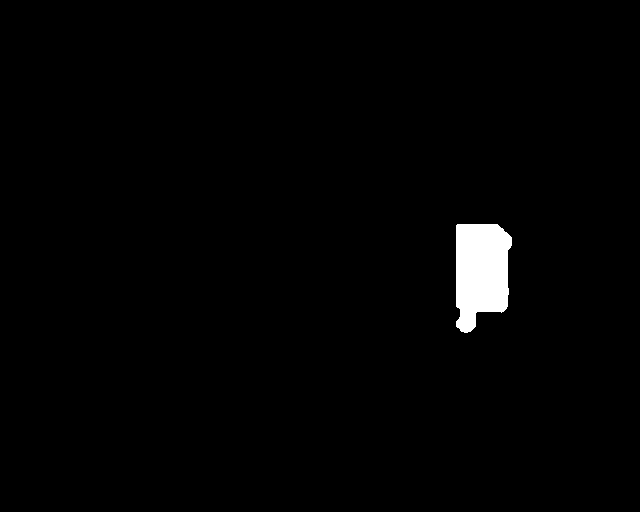

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole33.jpg: 512x640 1 5_SignalPad, 17.1ms
Speed: 0.7ms pre-process, 17.1ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


1


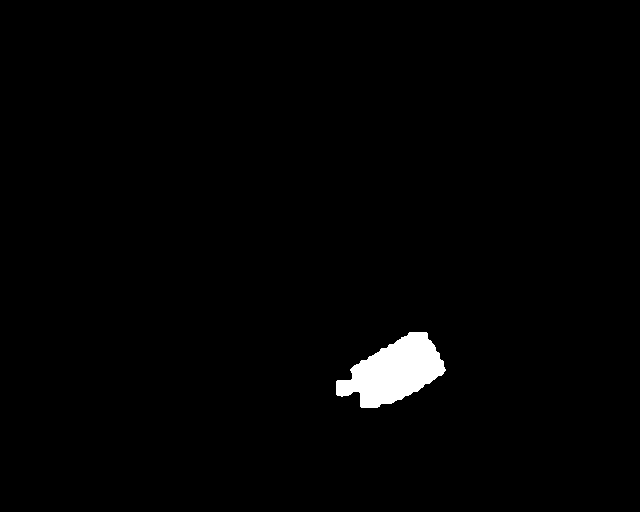

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole34.jpg: 512x640 1 None, 17.5ms
Speed: 0.7ms pre-process, 17.5ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


1


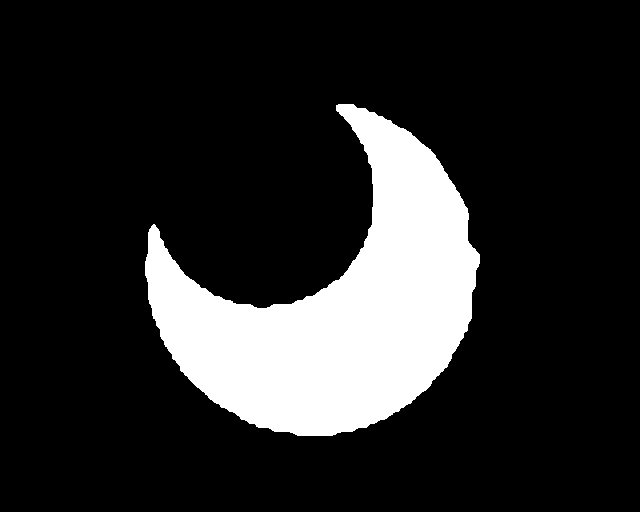

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole35.jpg: 512x640 1 3_SignalPad, 17.1ms
Speed: 0.7ms pre-process, 17.1ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 640)


1


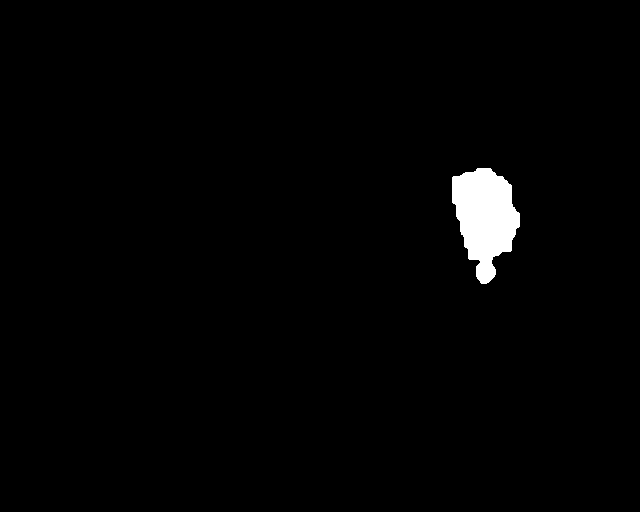

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole36.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.1ms
Speed: 0.7ms pre-process, 17.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3


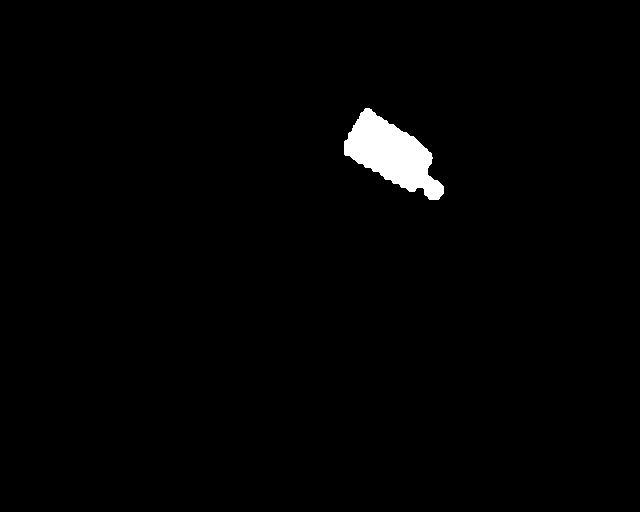

Number of Contours found = 1


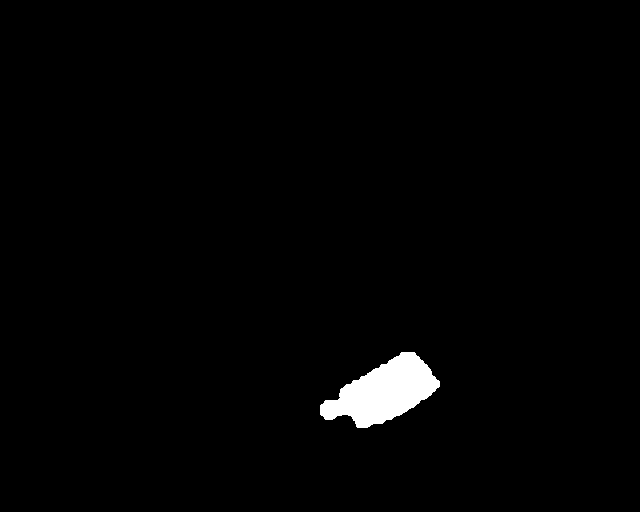

Number of Contours found = 1


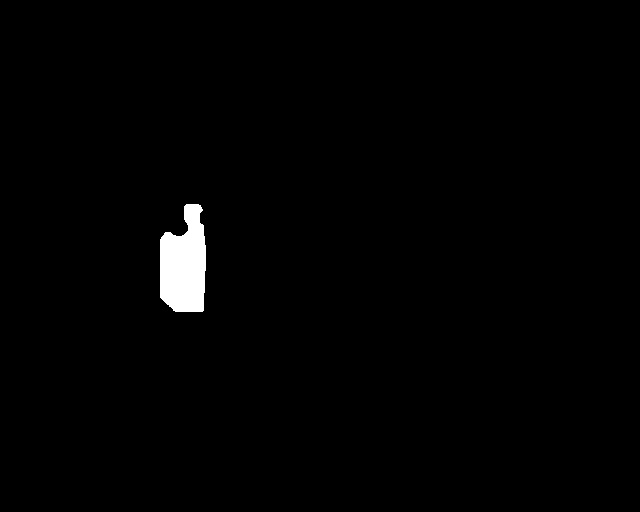

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole37.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.1ms
Speed: 0.8ms pre-process, 17.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


3


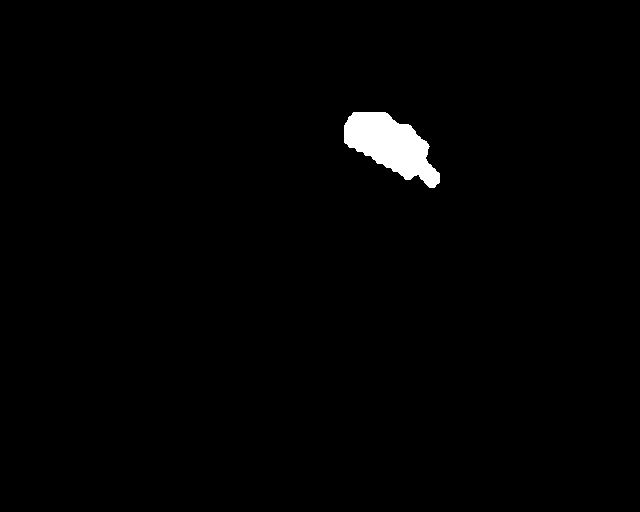

Number of Contours found = 1


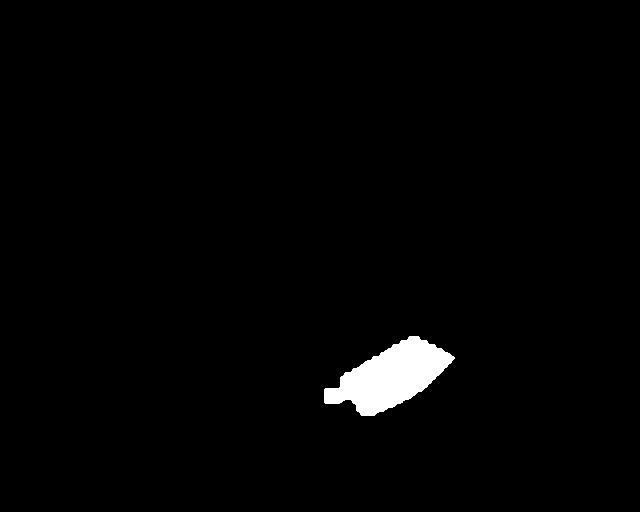

Number of Contours found = 1


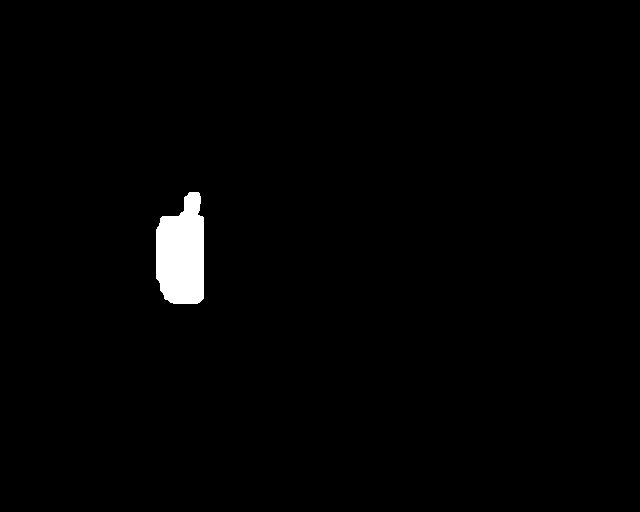

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole38.jpg: 512x640 1 1_SignalPad, 17.1ms
Speed: 0.7ms pre-process, 17.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


1


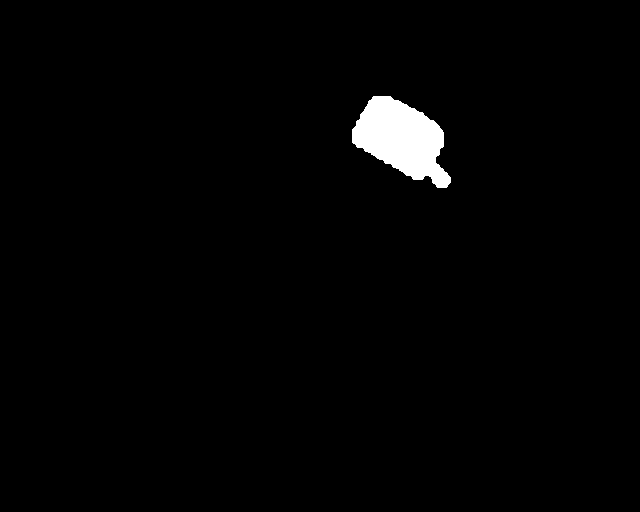

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole39.jpg: 512x640 1 3_SignalPad, 1 7_SignalPad, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2


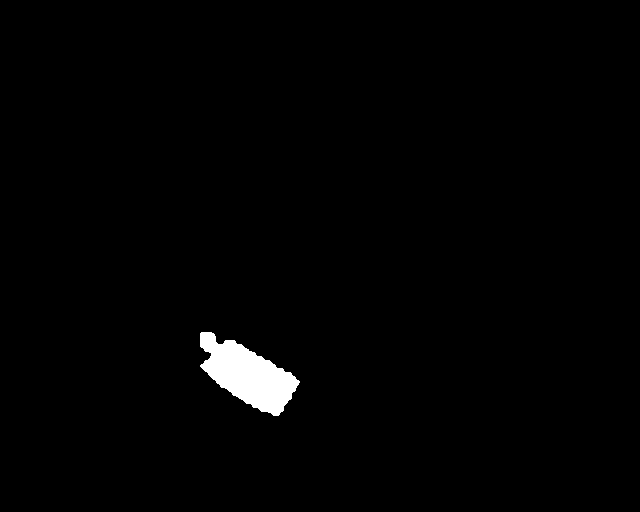

Number of Contours found = 1


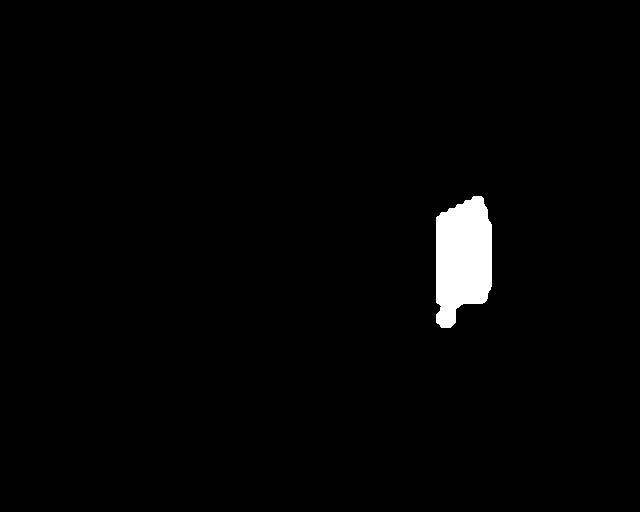

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole40.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.0ms
Speed: 0.5ms pre-process, 17.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


3


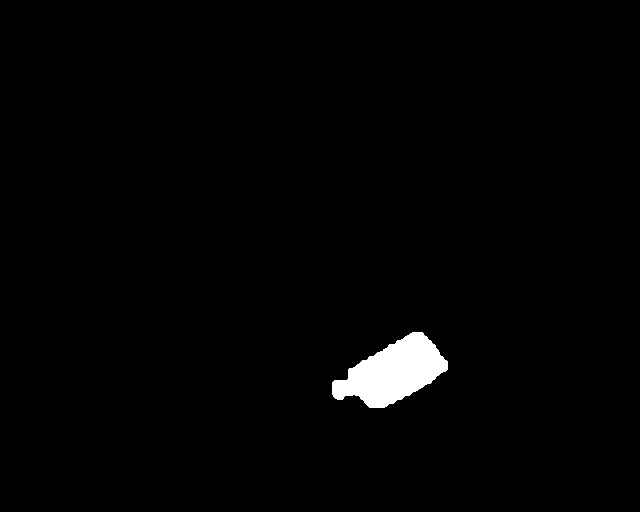

Number of Contours found = 1


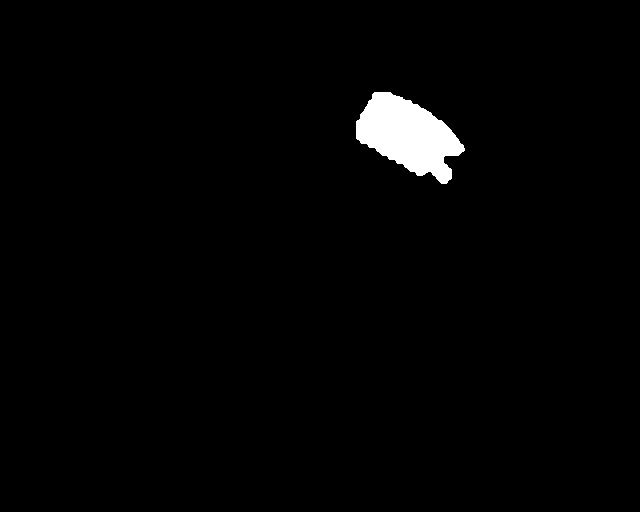

Number of Contours found = 1


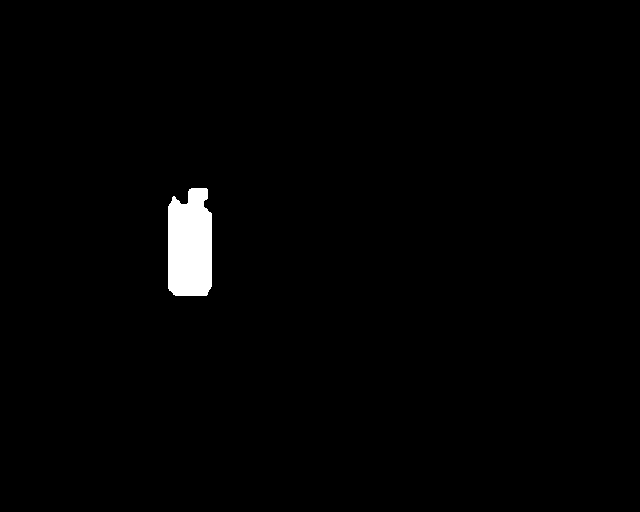

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole41.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 17.0ms
Speed: 0.5ms pre-process, 17.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3


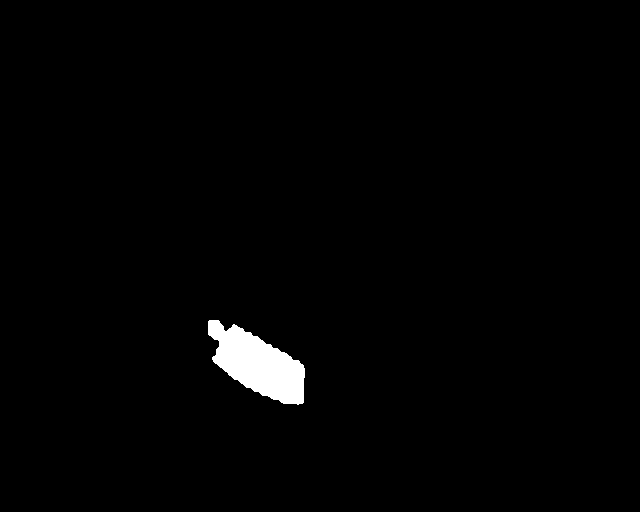

Number of Contours found = 1


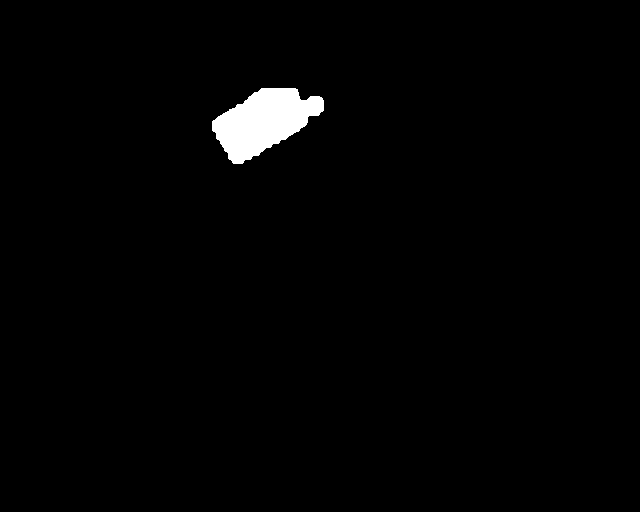

Number of Contours found = 1


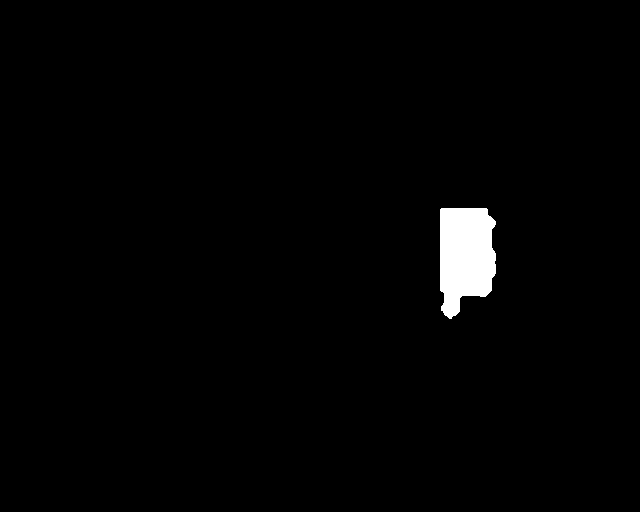

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole42.jpg: 512x640 1 7_SignalPad, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1


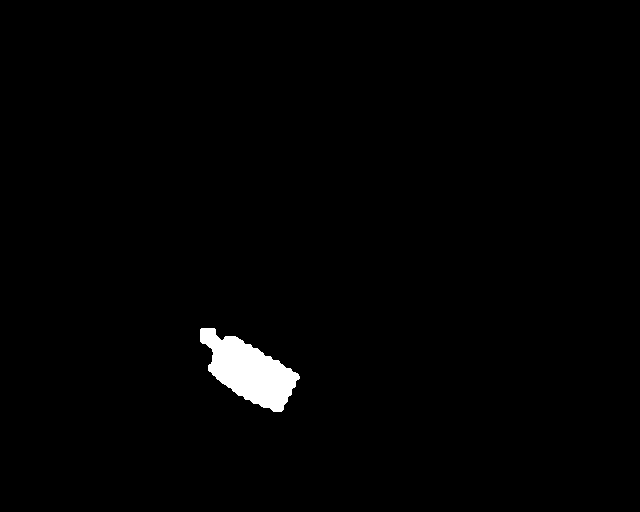

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole43.jpg: 512x640 1 9_SignalPad, 17.3ms
Speed: 0.7ms pre-process, 17.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1


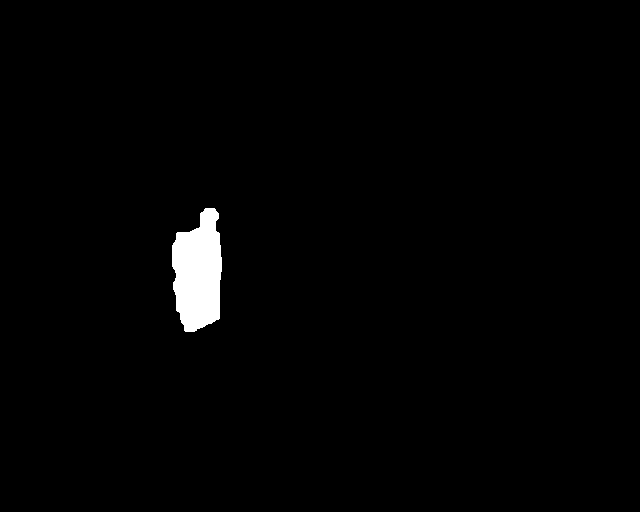

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole44.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2


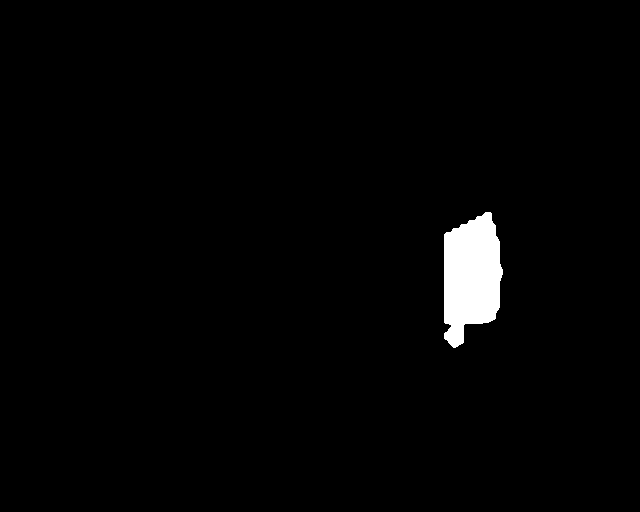

Number of Contours found = 1


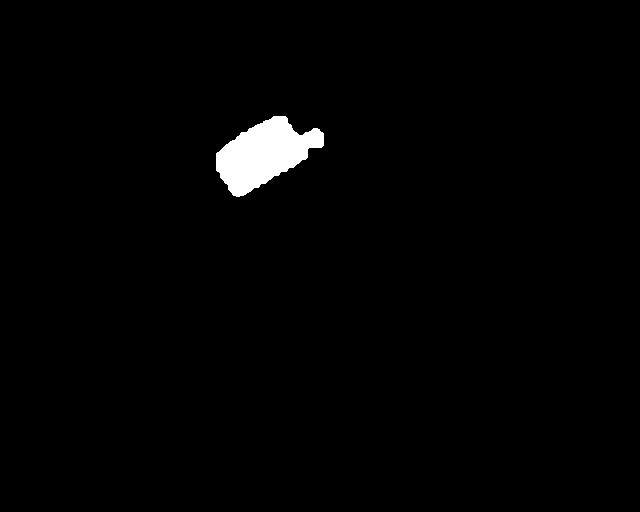

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole45.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.7ms
Speed: 0.6ms pre-process, 17.7ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


3


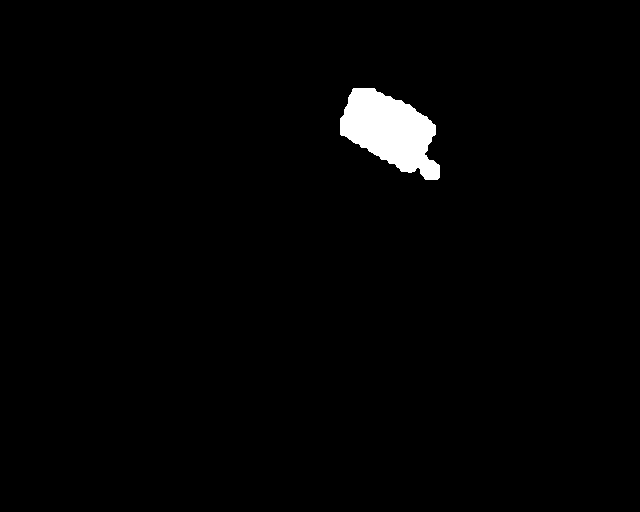

Number of Contours found = 1


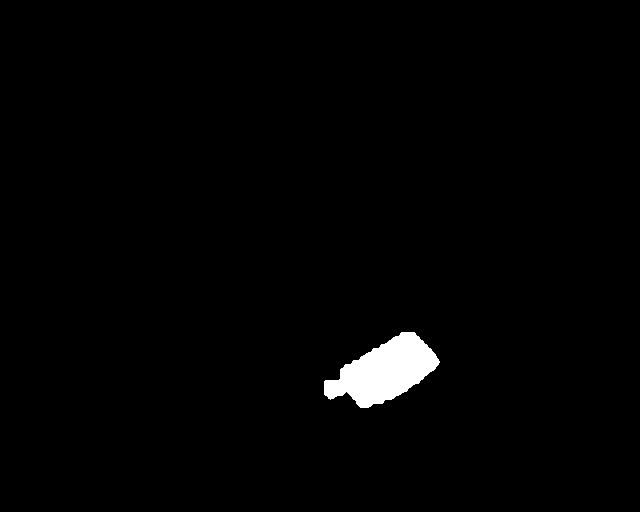

Number of Contours found = 1


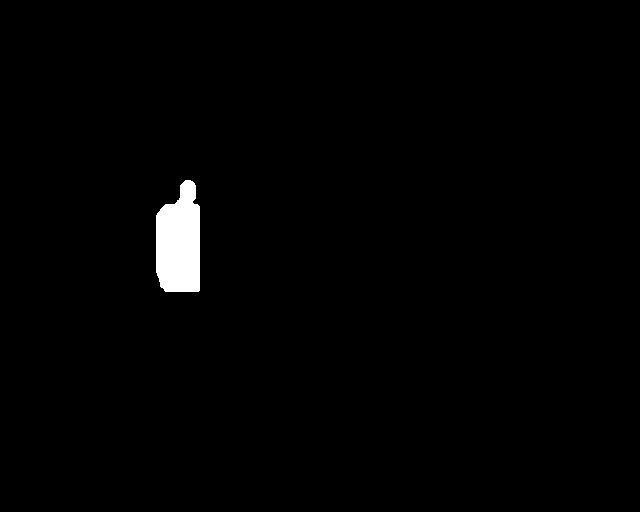

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole46.jpg: 512x640 1 11_SignalPad, 1 7_SignalPad, 17.1ms
Speed: 0.7ms pre-process, 17.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2


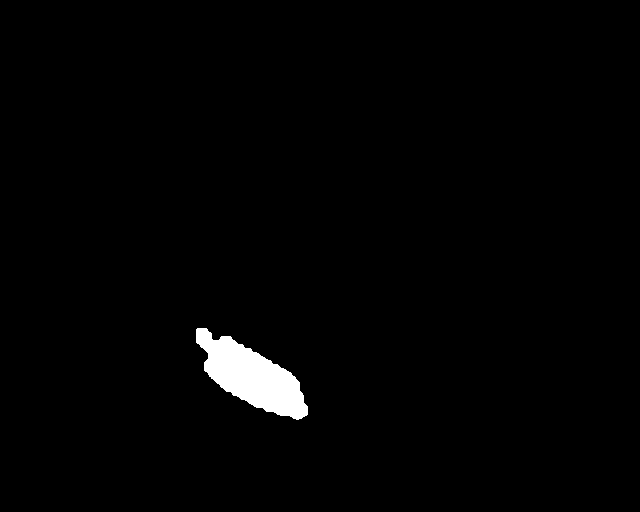

Number of Contours found = 1


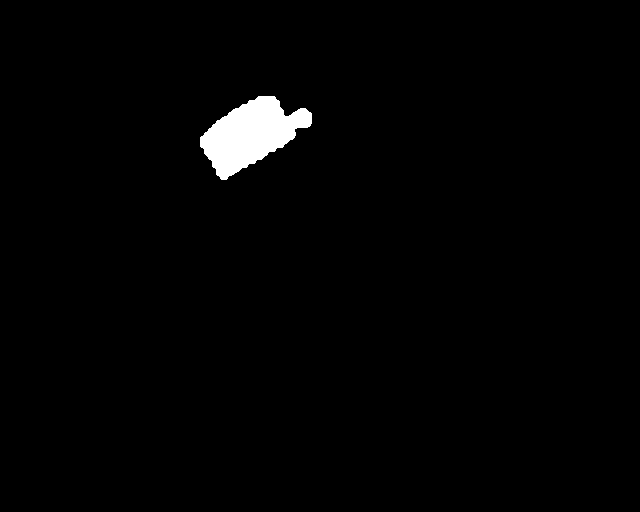

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole47.jpg: 512x640 1 11_SignalPad, 17.1ms
Speed: 0.7ms pre-process, 17.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1


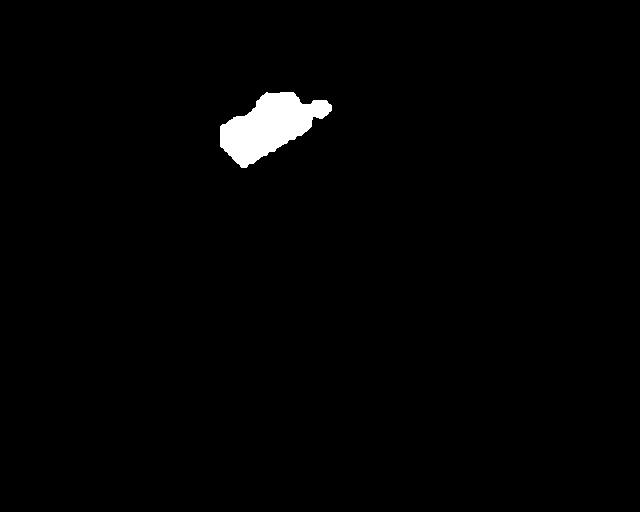

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole48.jpg: 512x640 1 1_SignalPad, 2 5_SignalPads, 1 9_SignalPad, 17.0ms
Speed: 1.3ms pre-process, 17.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


3


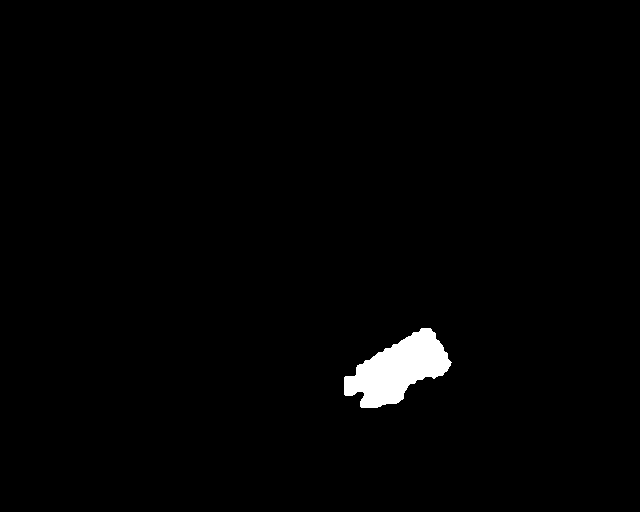

Number of Contours found = 1


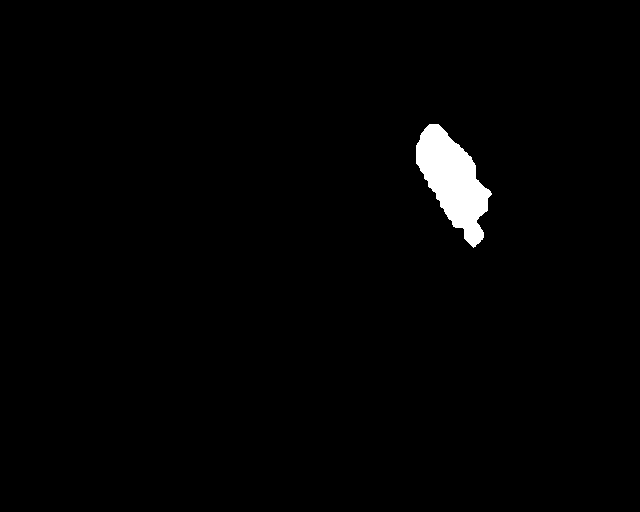

Number of Contours found = 1


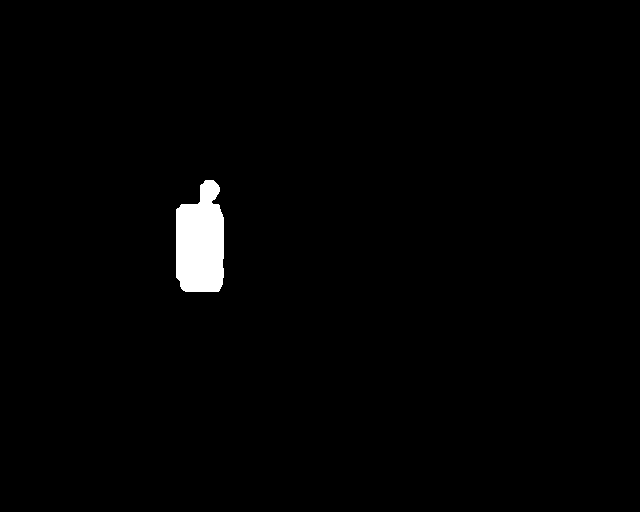

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole49.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.1ms
Speed: 0.8ms pre-process, 17.1ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


3


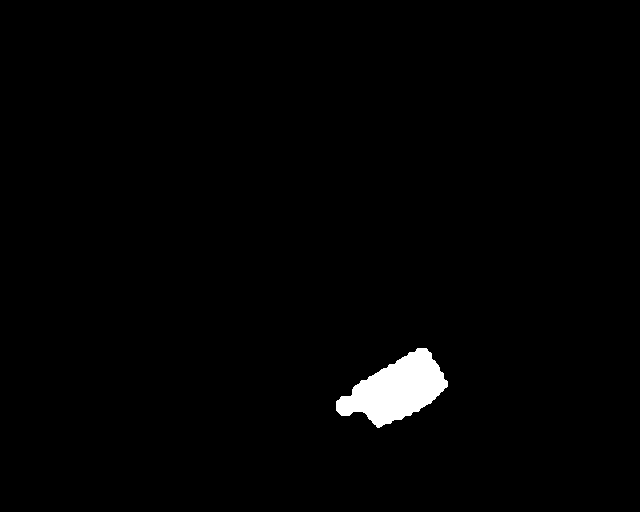

Number of Contours found = 1


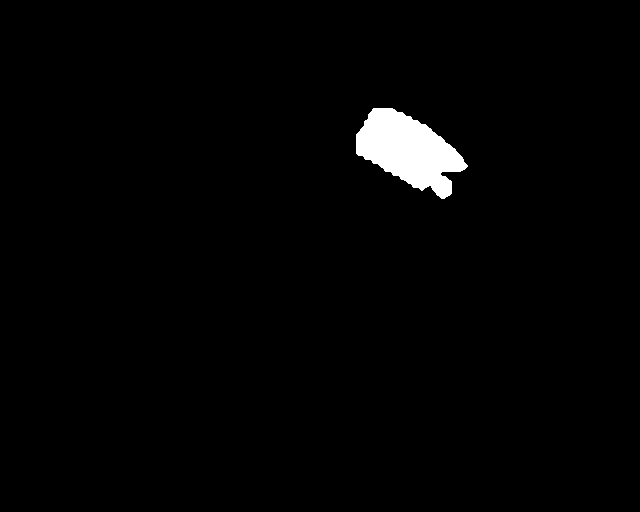

Number of Contours found = 1


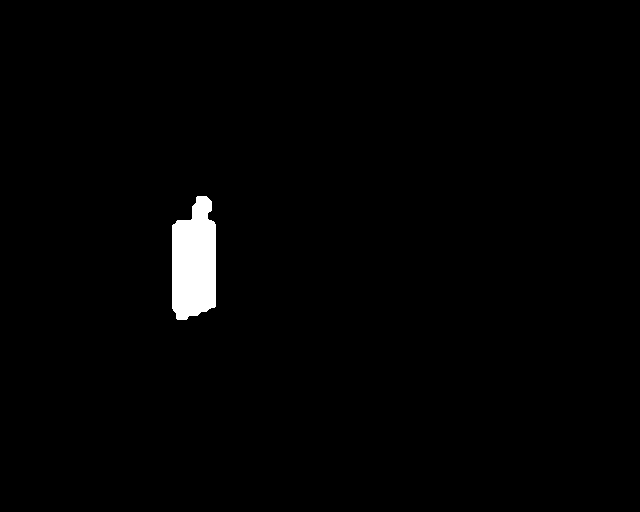

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole50.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 17.1ms
Speed: 0.8ms pre-process, 17.1ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


2


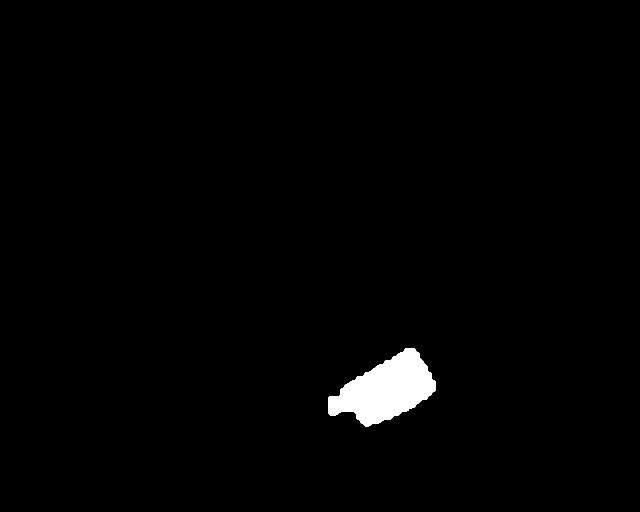

Number of Contours found = 1


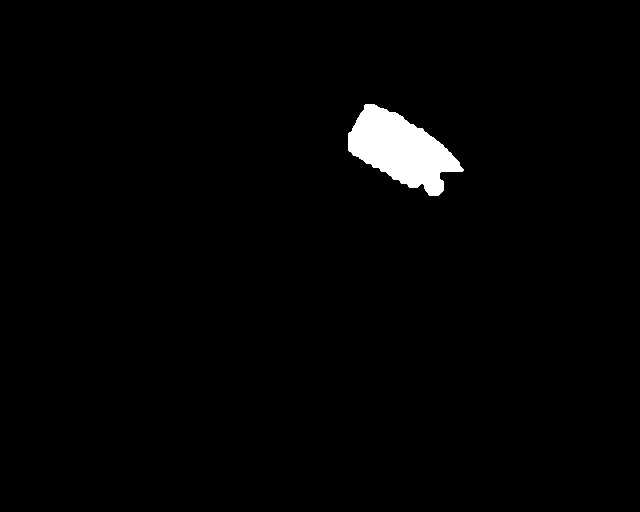

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole51.jpg: 512x640 2 11_SignalPads, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1


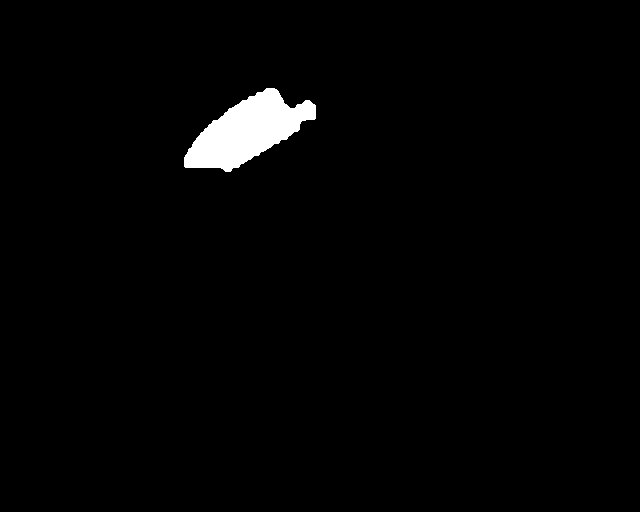

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole52.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.0ms
Speed: 1.3ms pre-process, 17.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


3


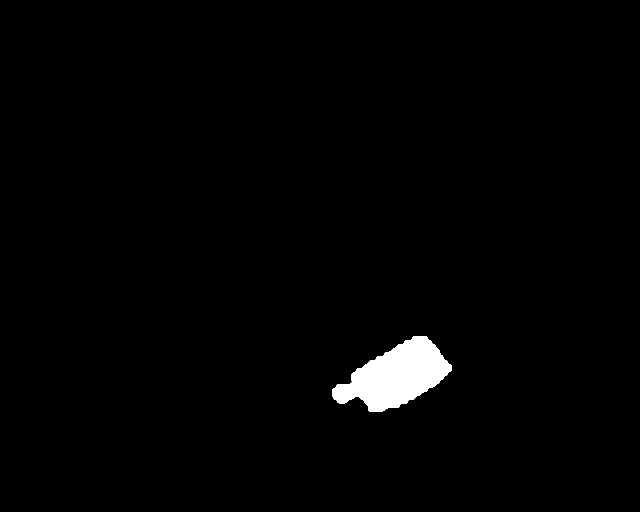

Number of Contours found = 1


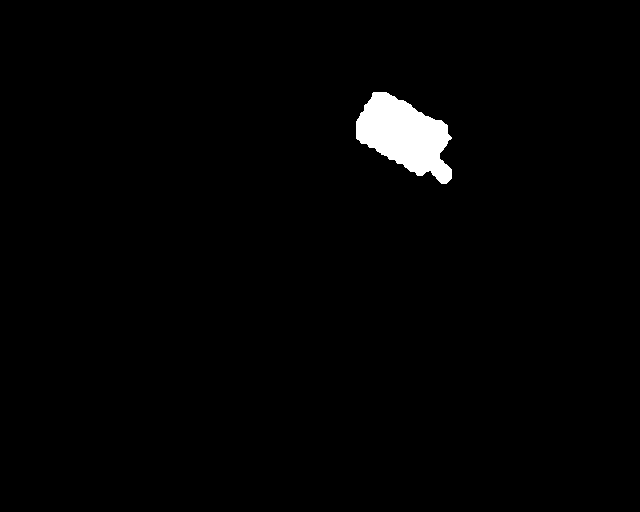

Number of Contours found = 1


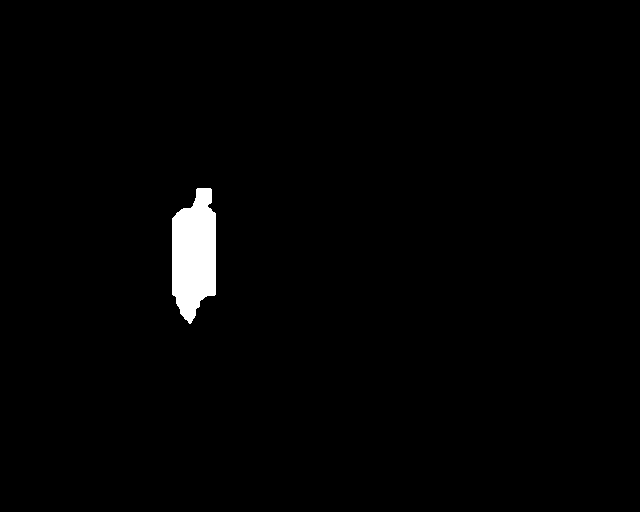

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole53.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 17.2ms
Speed: 0.7ms pre-process, 17.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


3


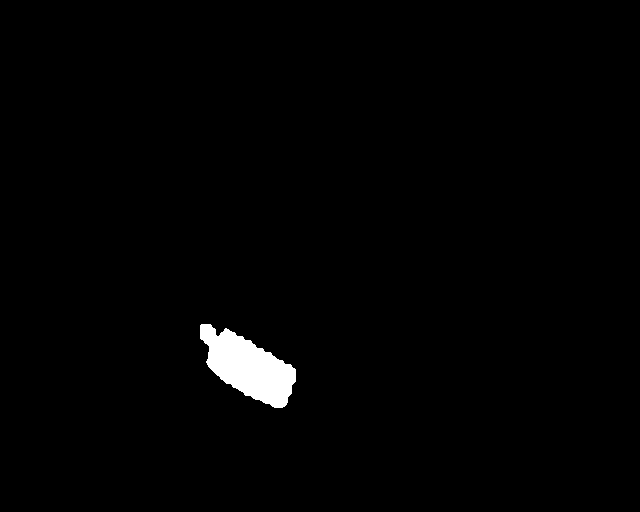

Number of Contours found = 1


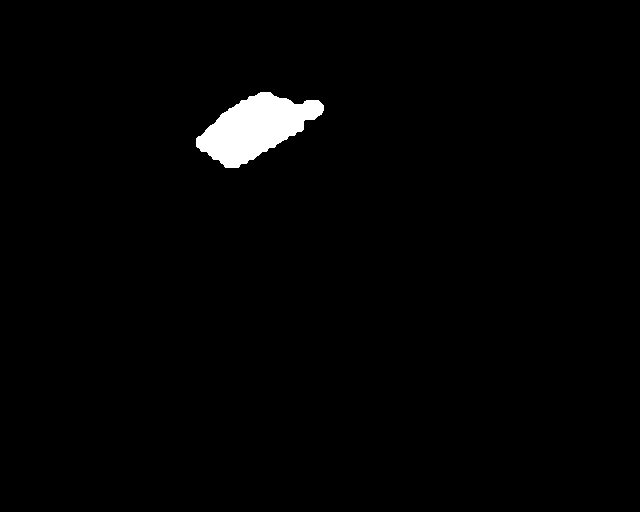

Number of Contours found = 1


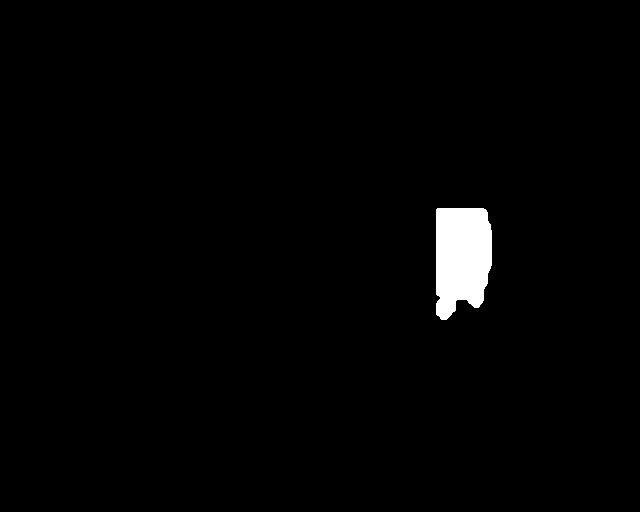

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole54.jpg: 512x640 1 5_SignalPad, 1 9_SignalPad, 17.1ms
Speed: 0.7ms pre-process, 17.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2


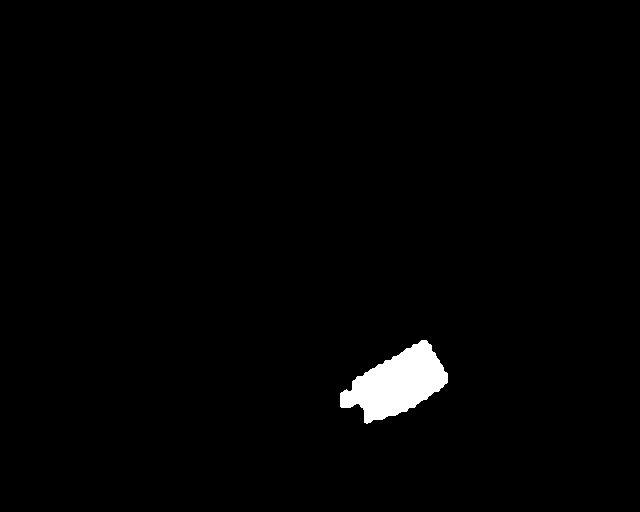

Number of Contours found = 1


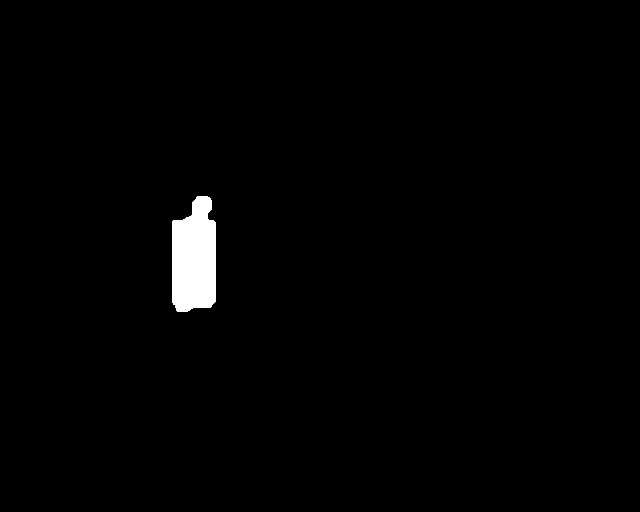

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole55.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 17.0ms
Speed: 0.7ms pre-process, 17.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3


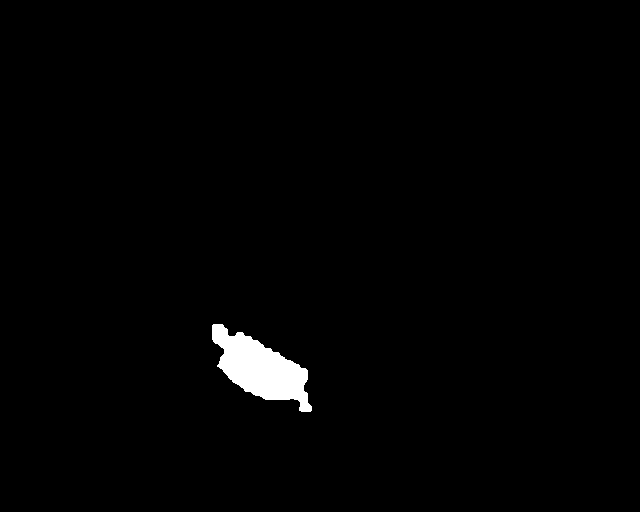

Number of Contours found = 1


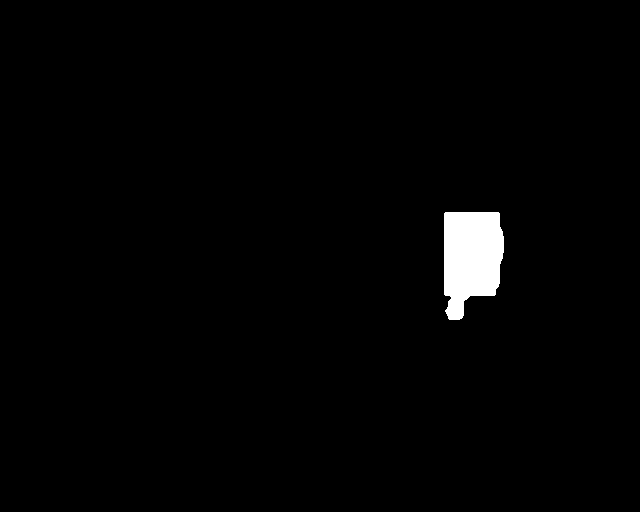

Number of Contours found = 1


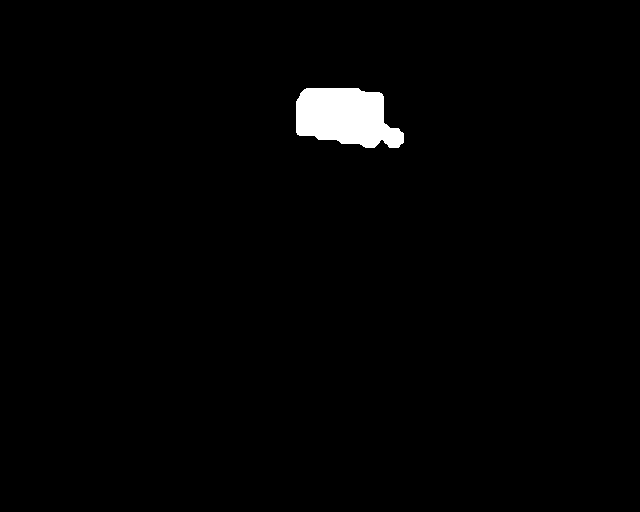

Number of Contours found = 1



image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole56.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 17.0ms
Speed: 0.7ms pre-process, 17.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3


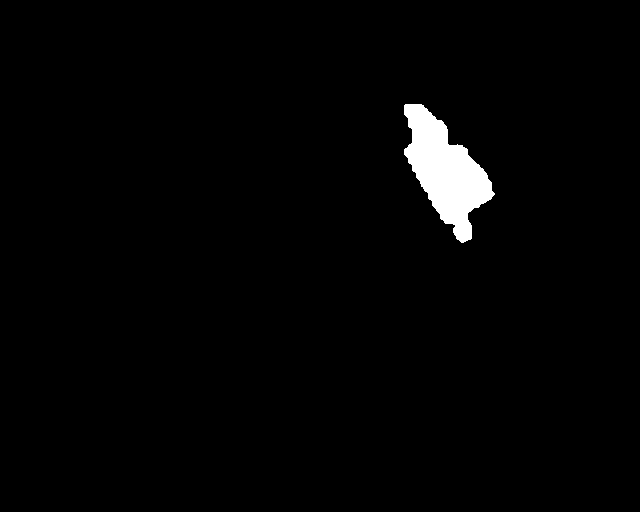

Number of Contours found = 1


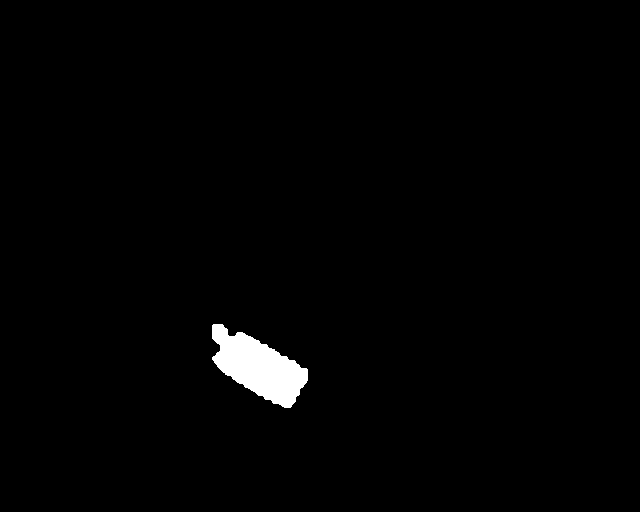

Number of Contours found = 1


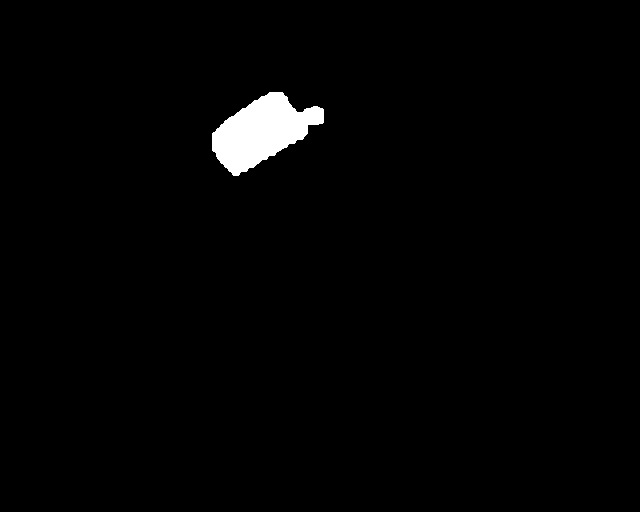

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole57.jpg: 512x640 1 1_SignalPad, 1 9_SignalPad, 17.1ms
Speed: 0.6ms pre-process, 17.1ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


2


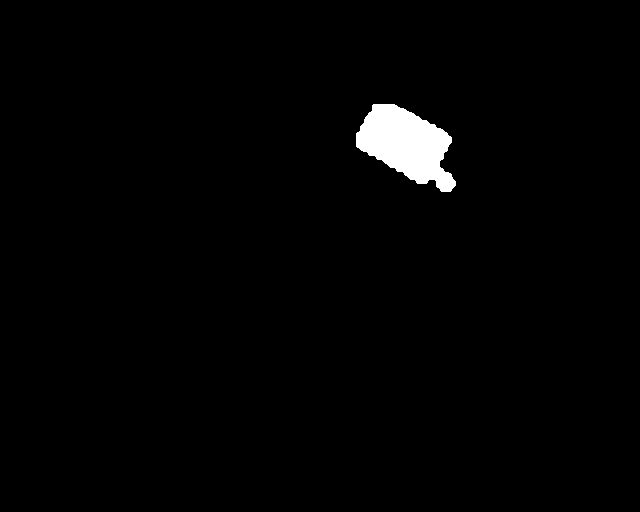

Number of Contours found = 1


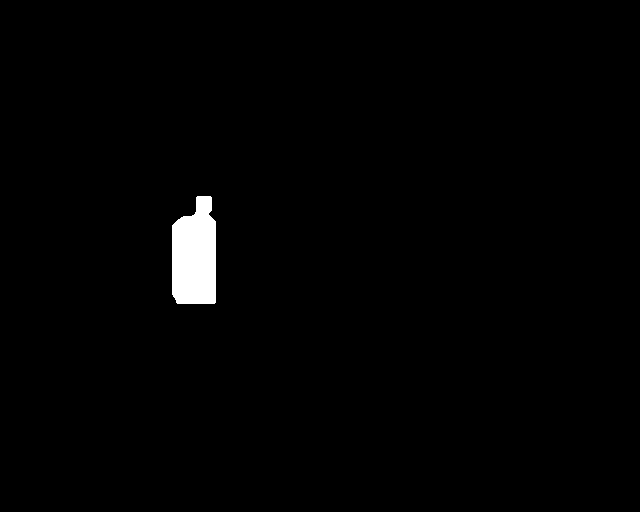

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole58.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.0ms
Speed: 0.7ms pre-process, 17.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


3


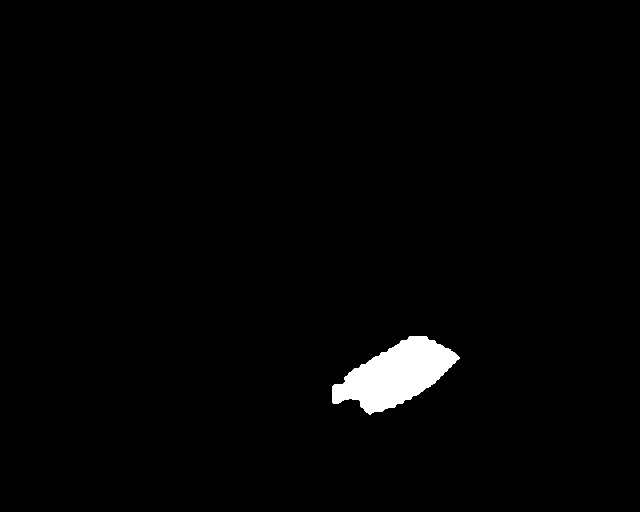

Number of Contours found = 1


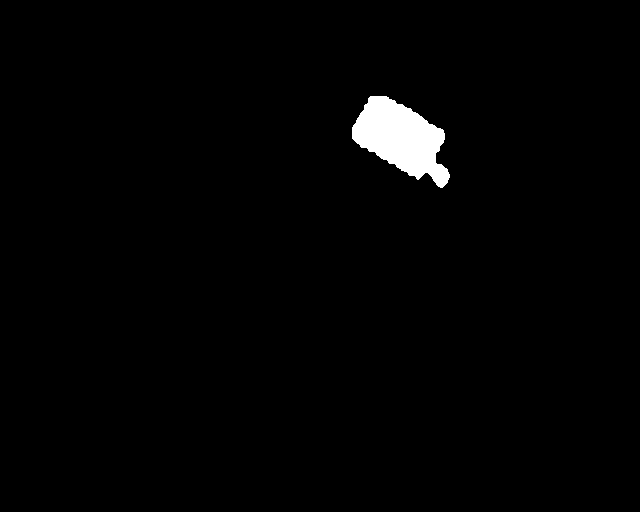

Number of Contours found = 1


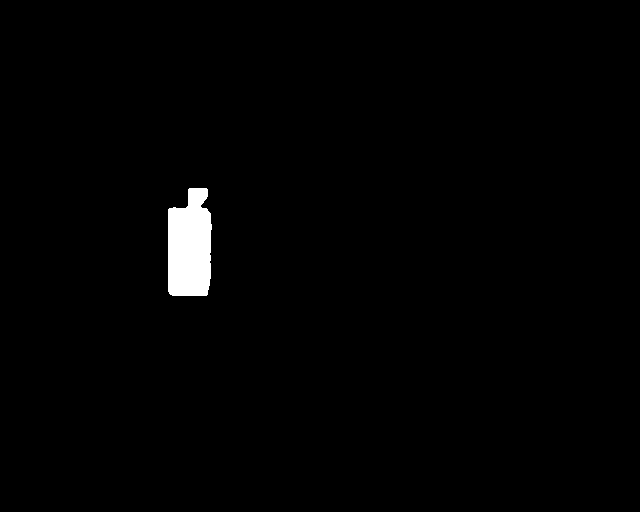

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole59.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.1ms
Speed: 0.7ms pre-process, 17.1ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


3


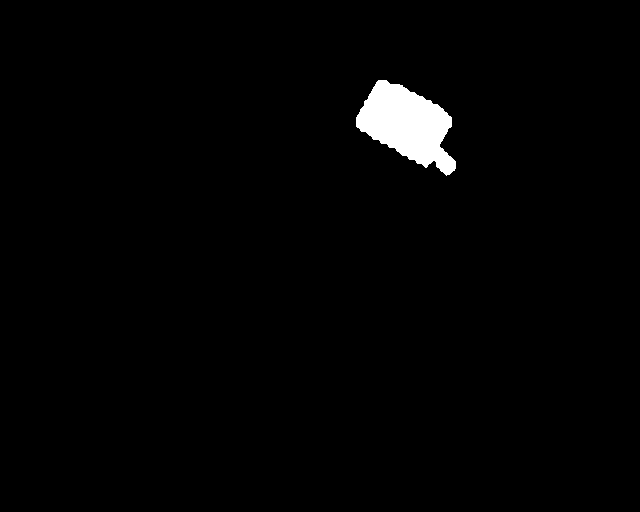

Number of Contours found = 1


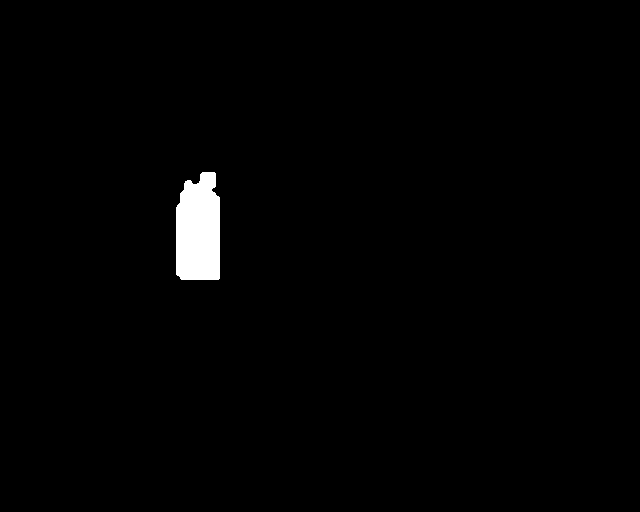

Number of Contours found = 1


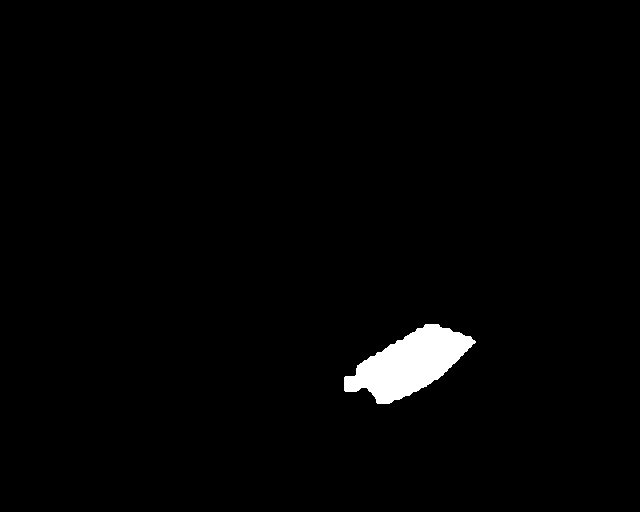

Number of Contours found = 1

image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole60.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 17.1ms
Speed: 0.6ms pre-process, 17.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


2


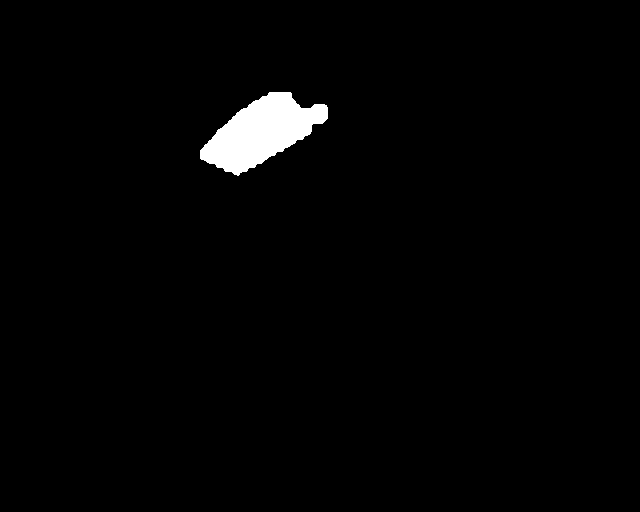

Number of Contours found = 1


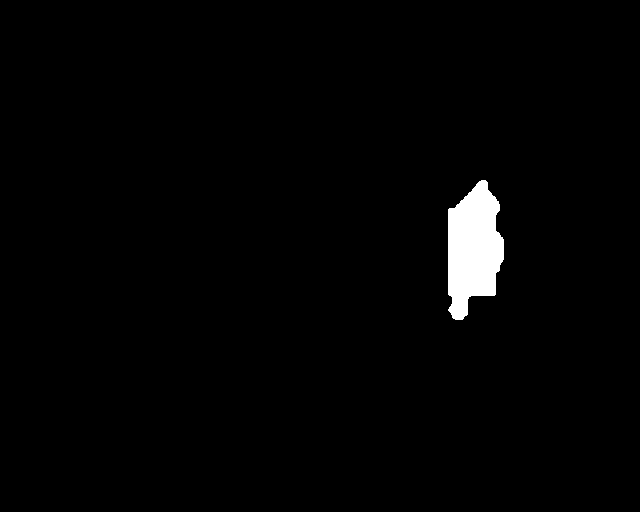

Number of Contours found = 1

image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole61.jpg: 512x640 1 None, 17.1ms
Speed: 0.6ms pre-process, 17.1ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


1


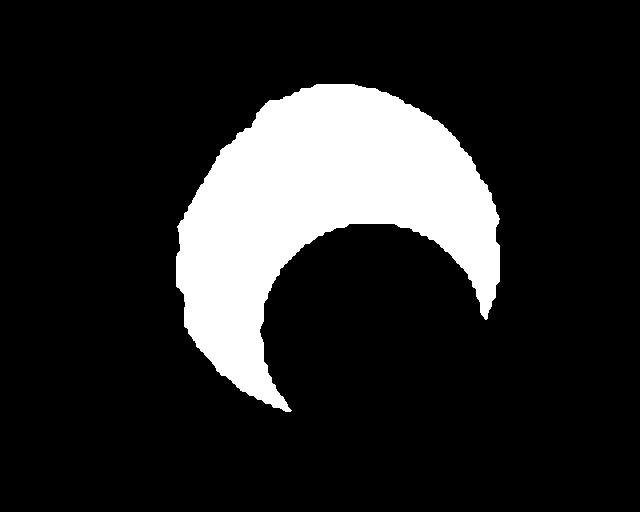

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole62.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 17.2ms
Speed: 0.6ms pre-process, 17.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


3


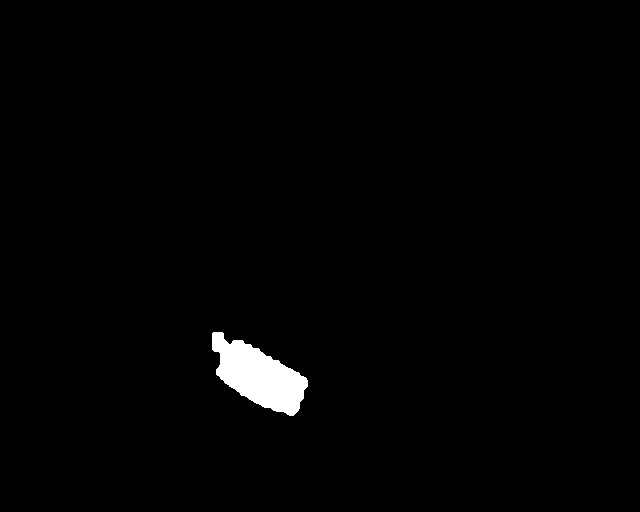

Number of Contours found = 1


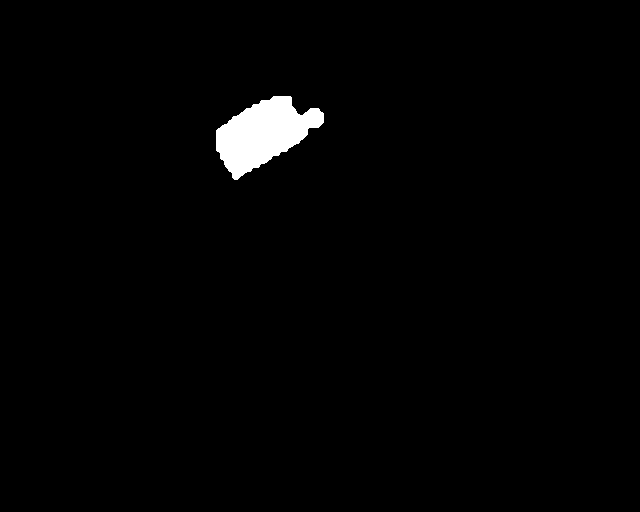

Number of Contours found = 1


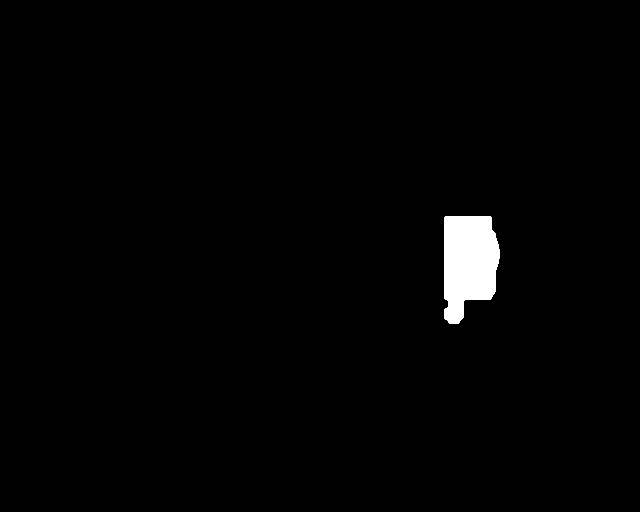

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole63.jpg: 512x640 1 1_SignalPad, 1 9_SignalPad, 17.0ms
Speed: 0.7ms pre-process, 17.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


2


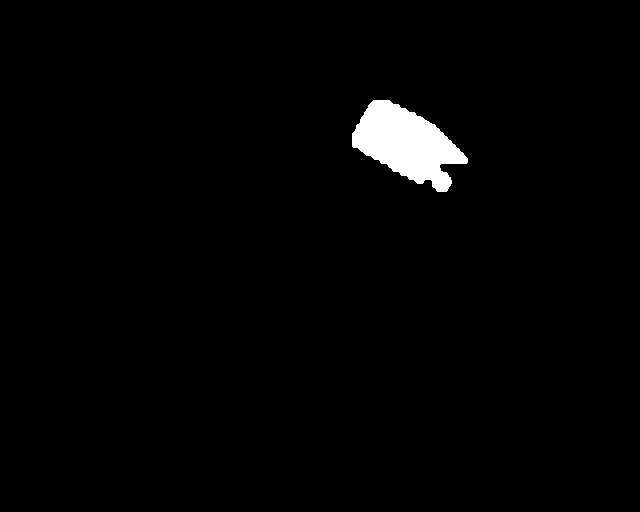

Number of Contours found = 1


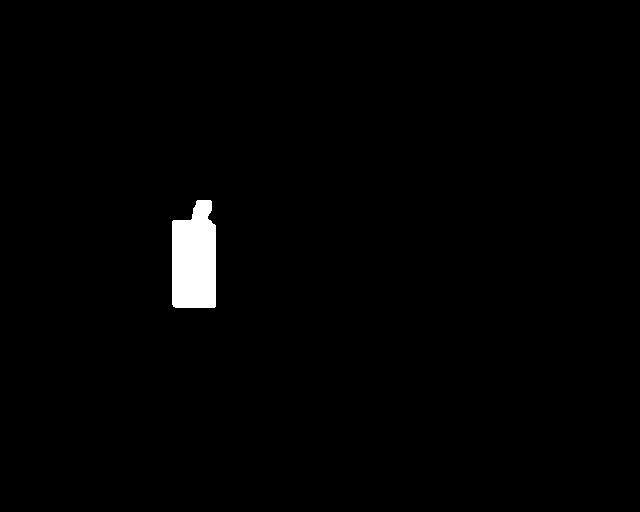

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole64.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.0ms
Speed: 0.5ms pre-process, 17.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


3


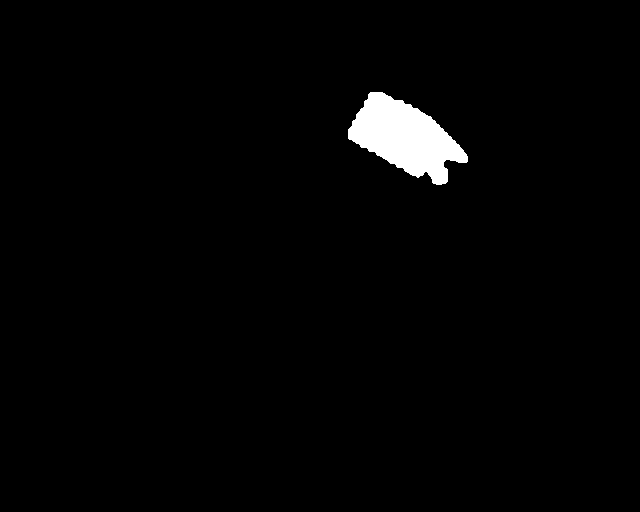

Number of Contours found = 1


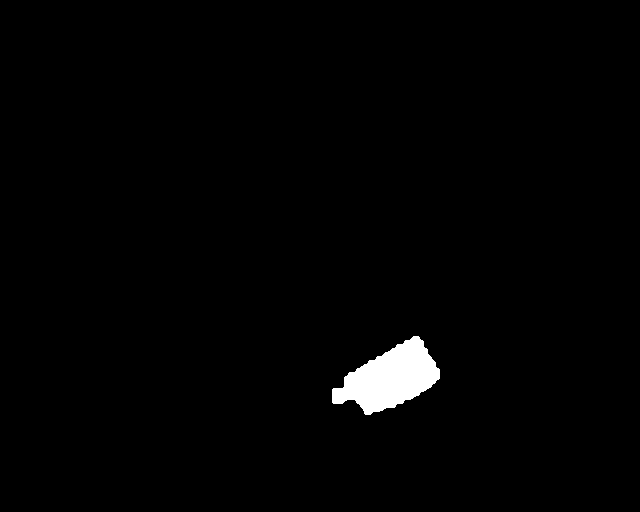

Number of Contours found = 1


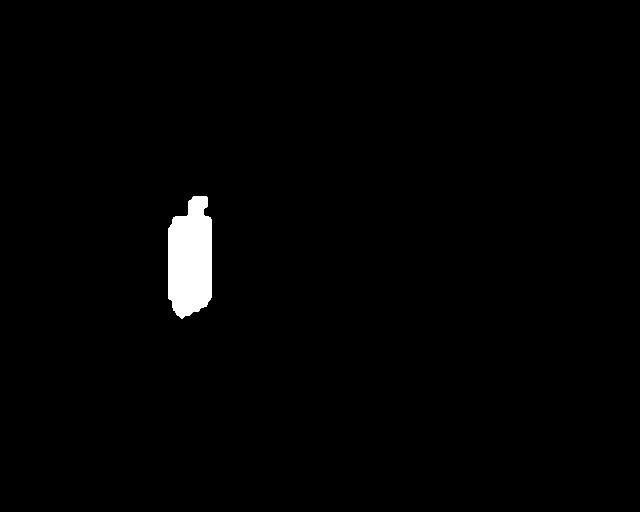

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole65.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 17.0ms
Speed: 0.7ms pre-process, 17.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


3


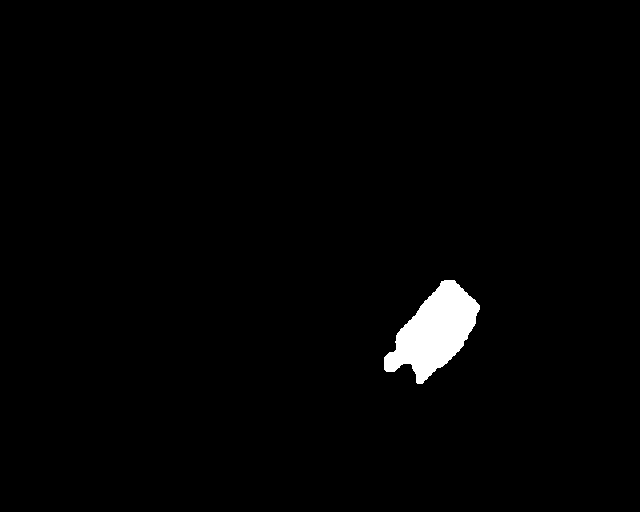

Number of Contours found = 1


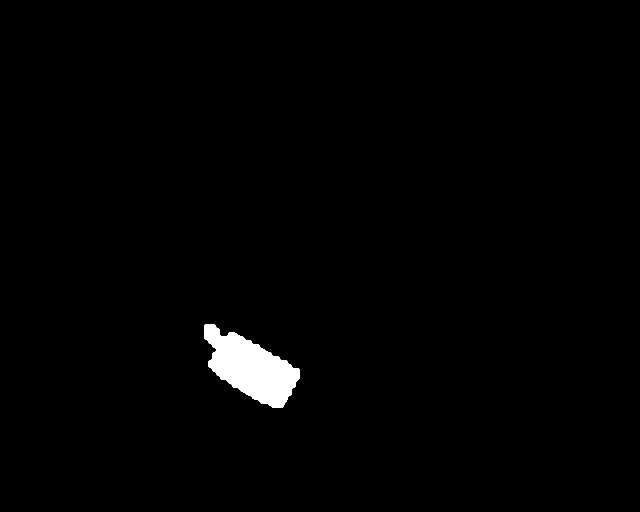

Number of Contours found = 1


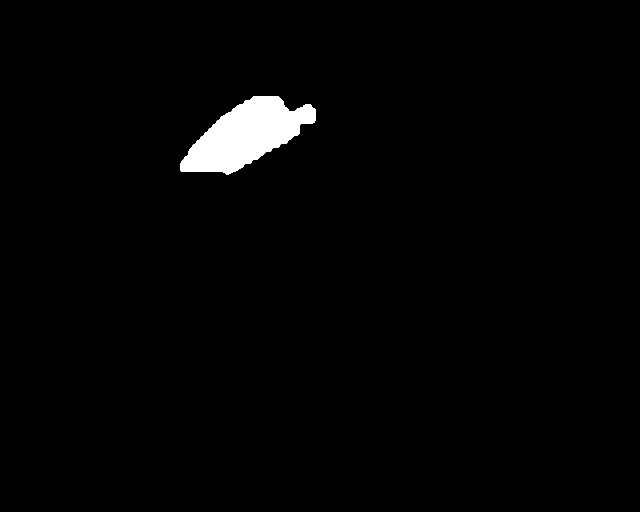

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole66.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


3


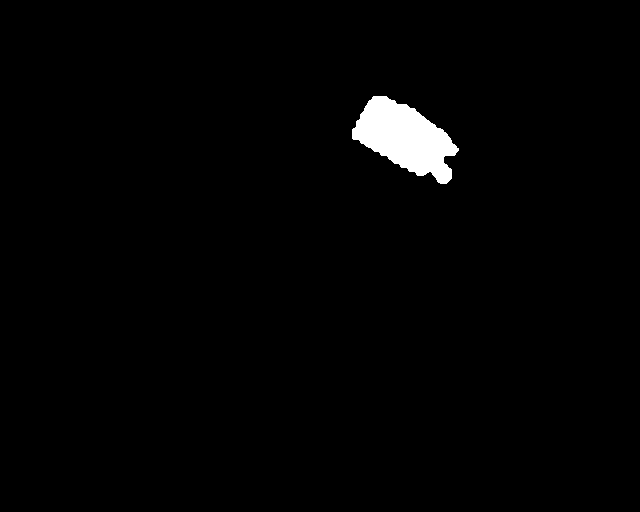

Number of Contours found = 1


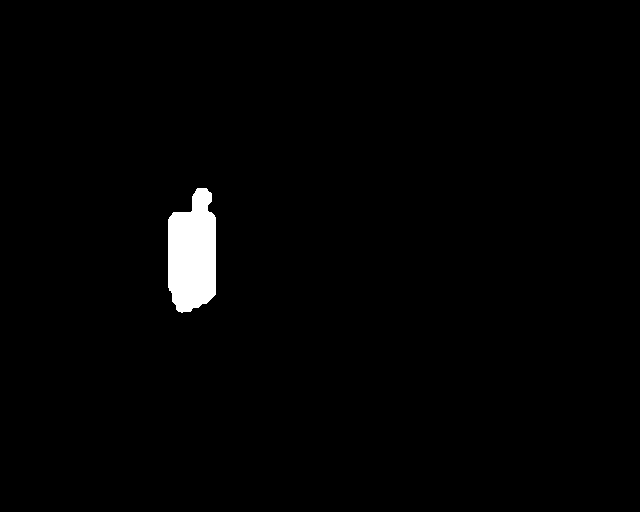

Number of Contours found = 1


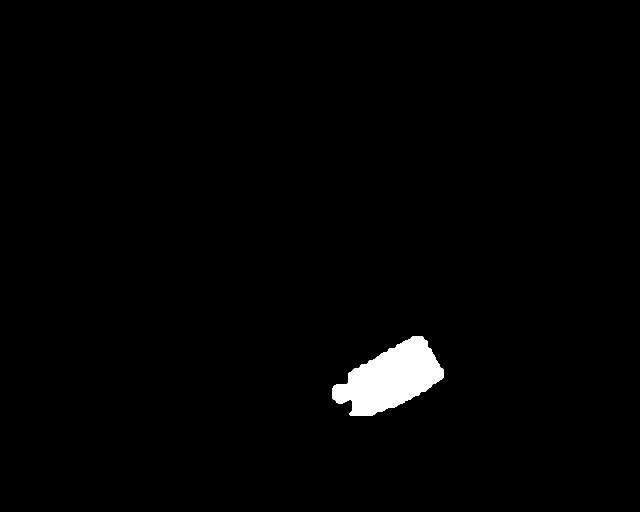

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole67.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 17.0ms
Speed: 0.7ms pre-process, 17.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


3


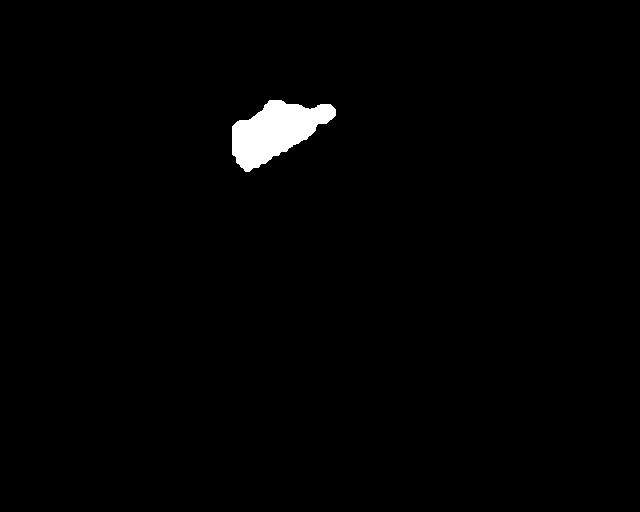

Number of Contours found = 1


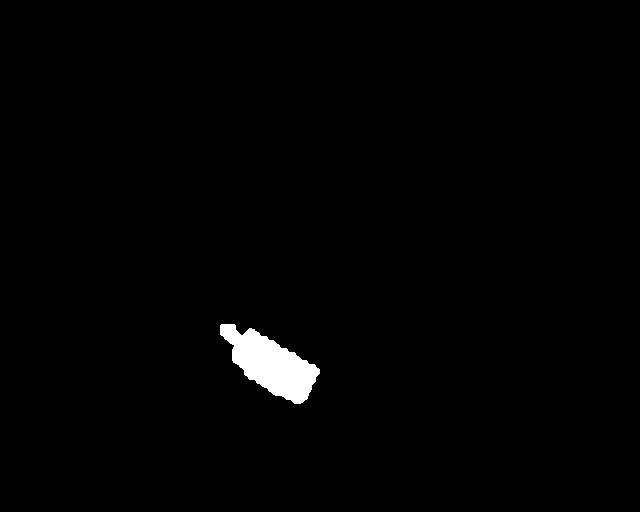

Number of Contours found = 1


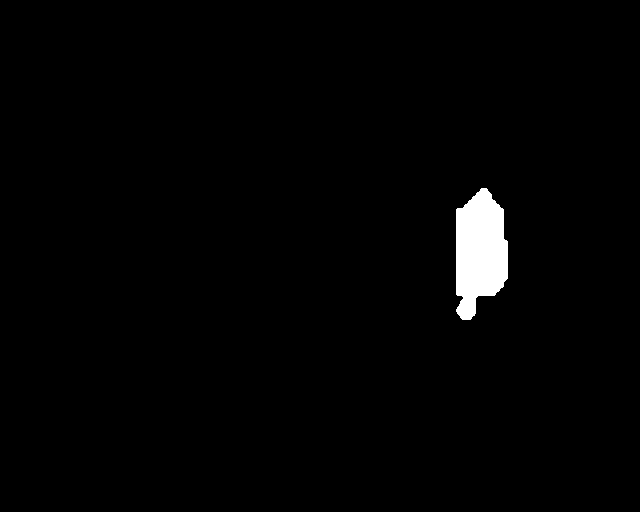

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole68.jpg: 512x640 1 3_SignalPad, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


1


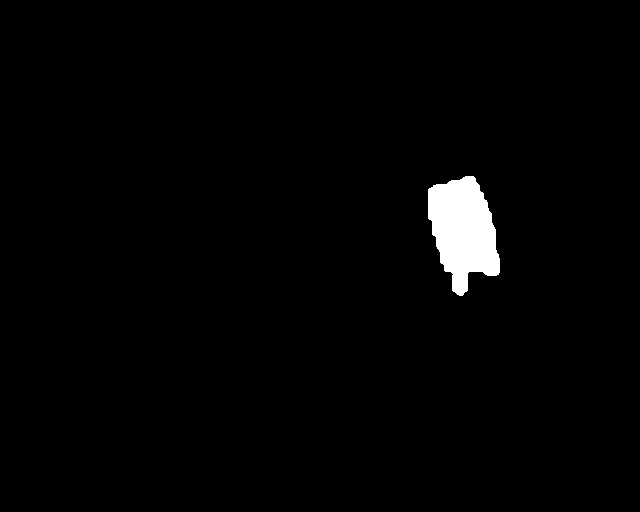

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole69.jpg: 512x640 1 3_SignalPad, 17.1ms
Speed: 0.6ms pre-process, 17.1ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


1


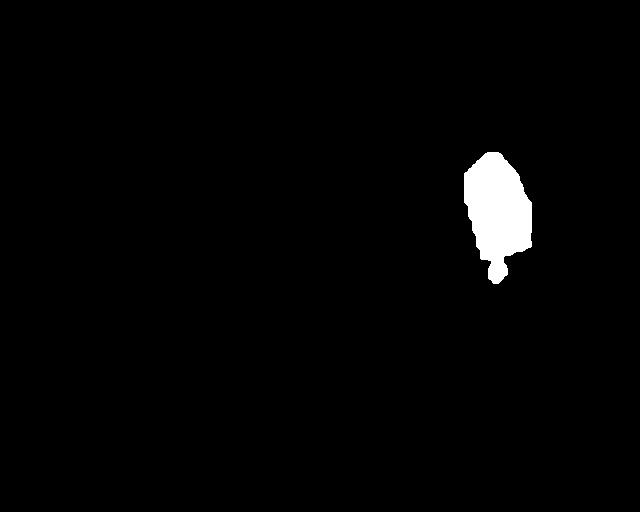

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole70.jpg: 512x640 1 5_SignalPad, 1 9_SignalPad, 18.1ms
Speed: 0.7ms pre-process, 18.1ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


2


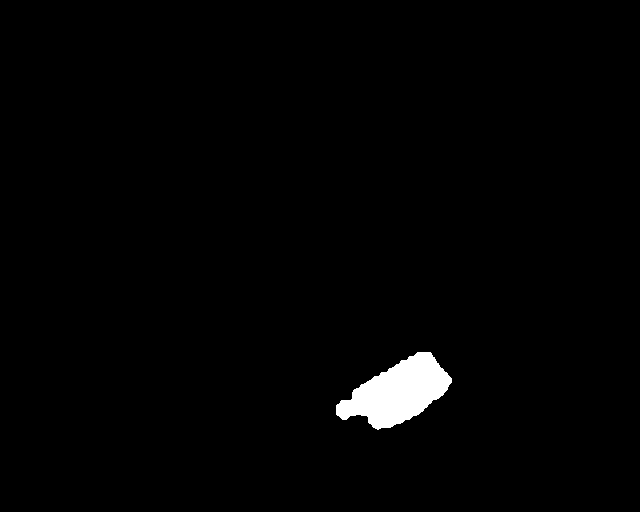

Number of Contours found = 1


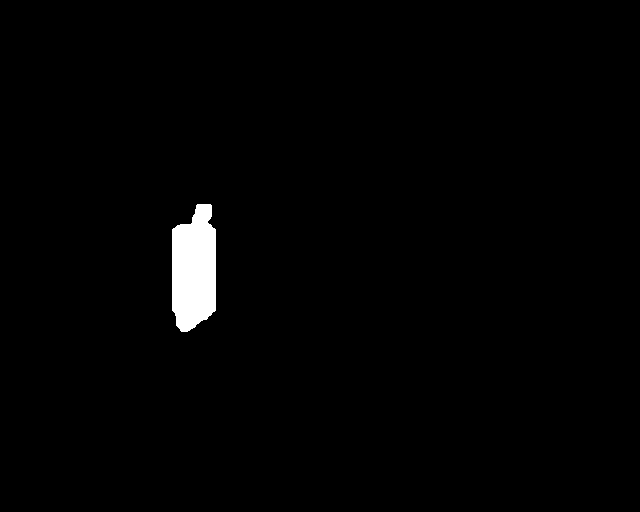

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole71.jpg: 512x640 1 1_SignalPad, 1 9_SignalPad, 18.9ms
Speed: 0.6ms pre-process, 18.9ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


2


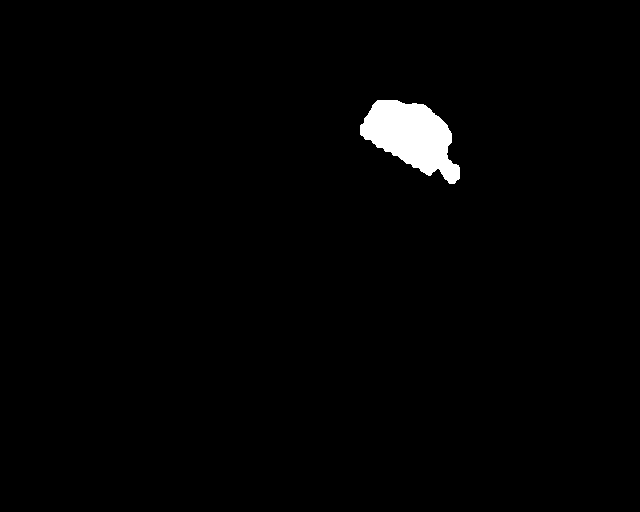

Number of Contours found = 1


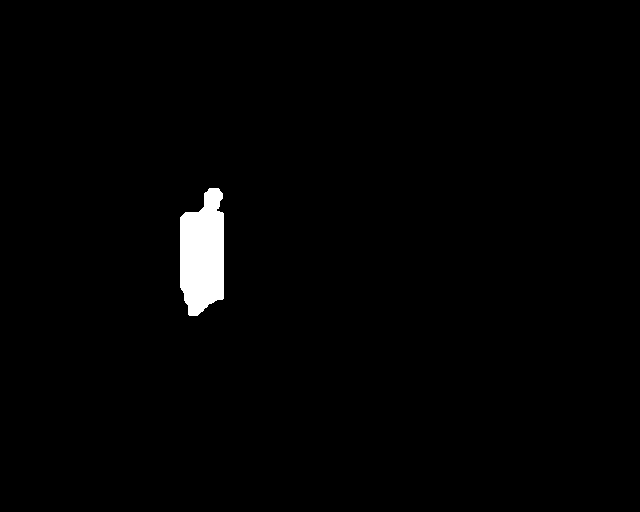

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole72.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


3


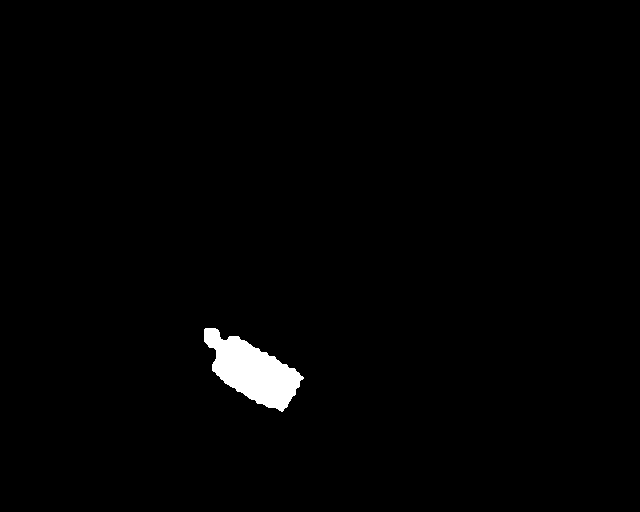

Number of Contours found = 1


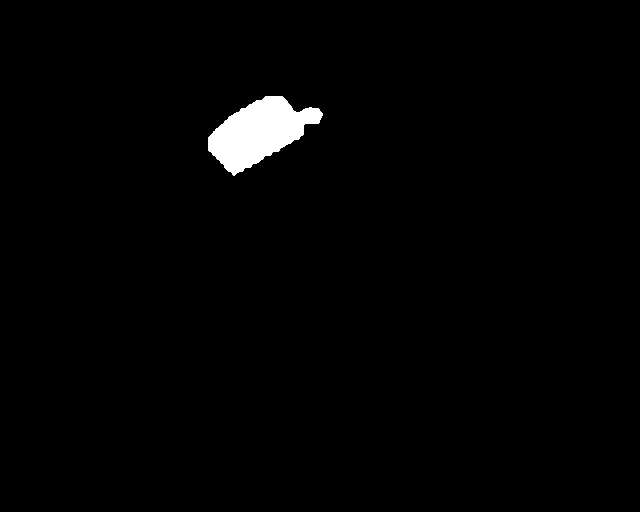

Number of Contours found = 1


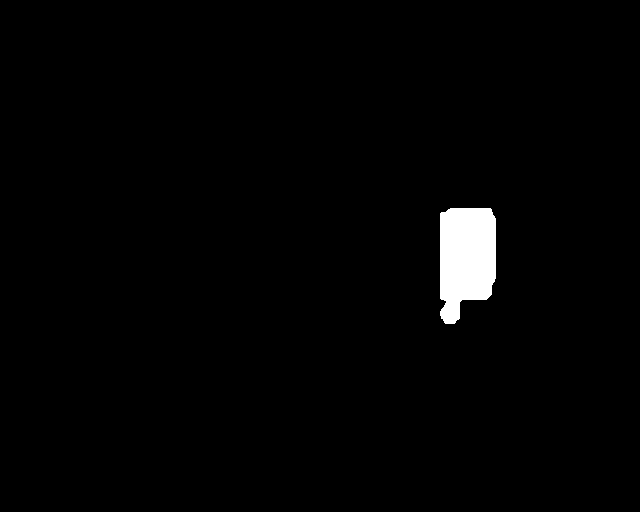

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole73.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


2


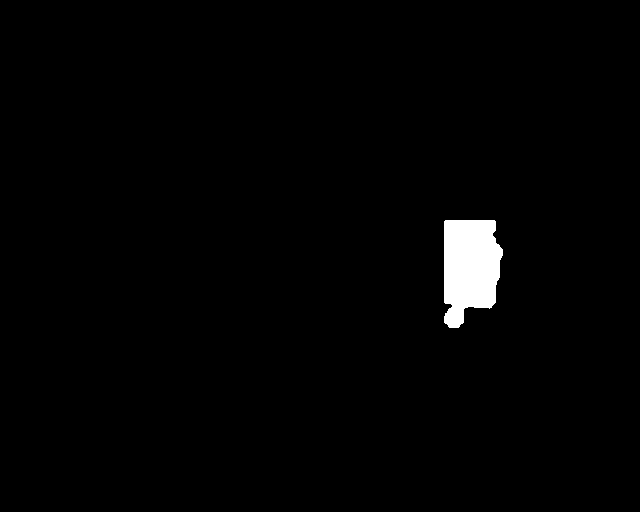

Number of Contours found = 1


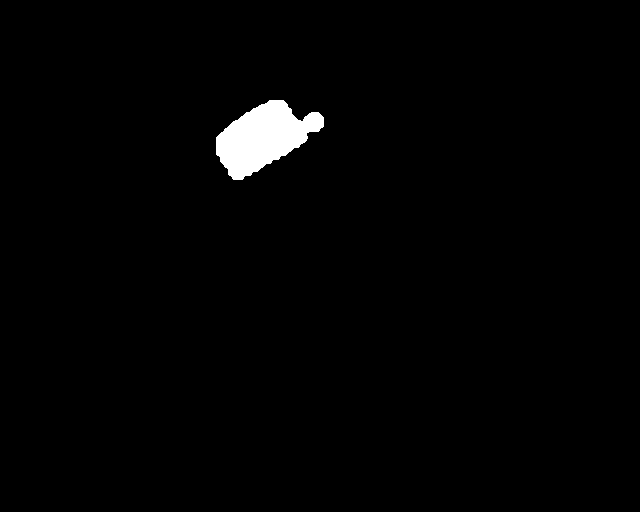

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole74.jpg: 512x640 1 5_SignalPad, 1 7_SignalPad, 17.0ms
Speed: 0.7ms pre-process, 17.0ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)


2


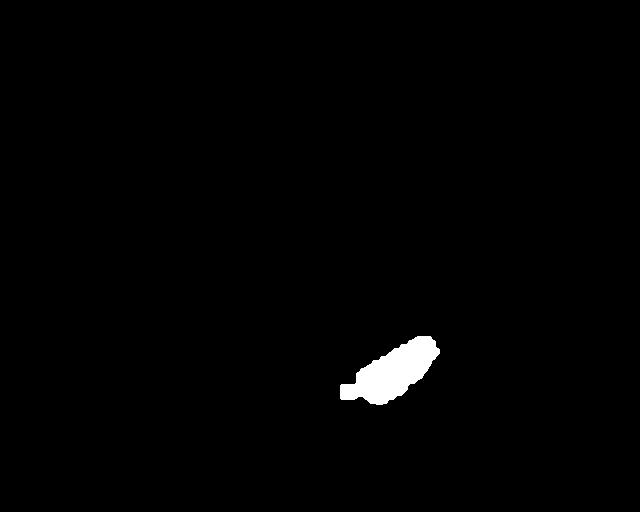

Number of Contours found = 1


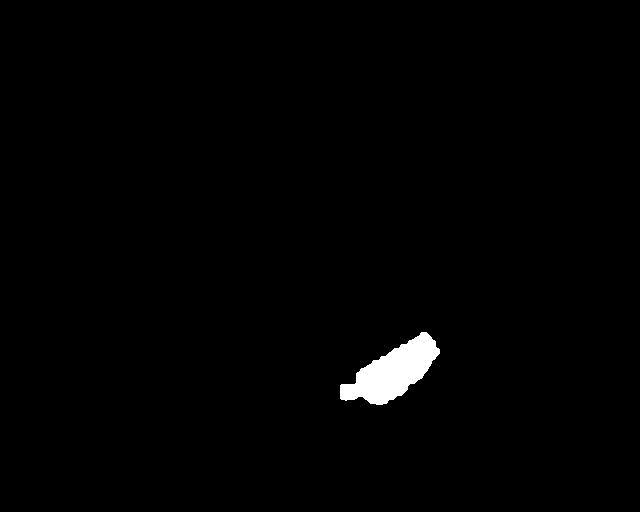

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole75.jpg: 512x640 1 3_SignalPad, 17.0ms
Speed: 0.5ms pre-process, 17.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


1


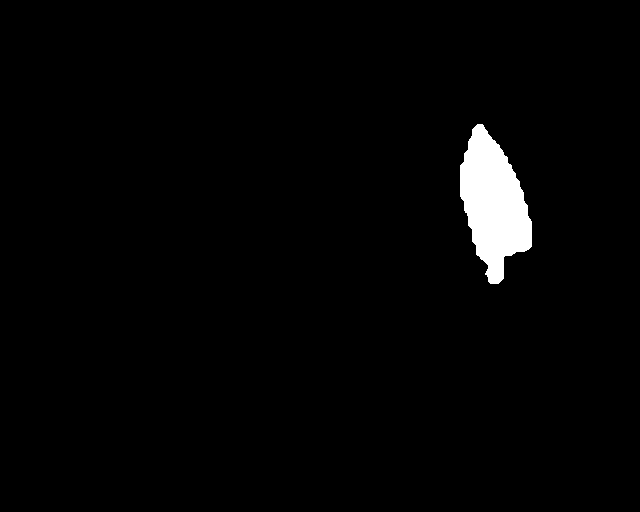

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole76.jpg: 512x640 1 11_SignalPad, 2 3_SignalPads, 1 7_SignalPad, 17.0ms
Speed: 0.5ms pre-process, 17.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


3


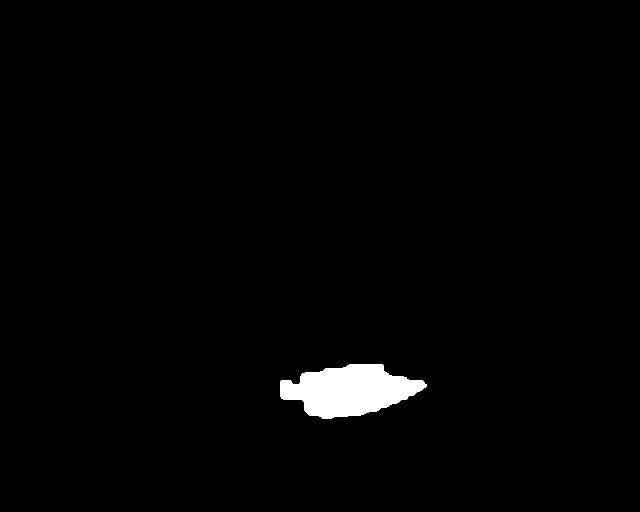

Number of Contours found = 1


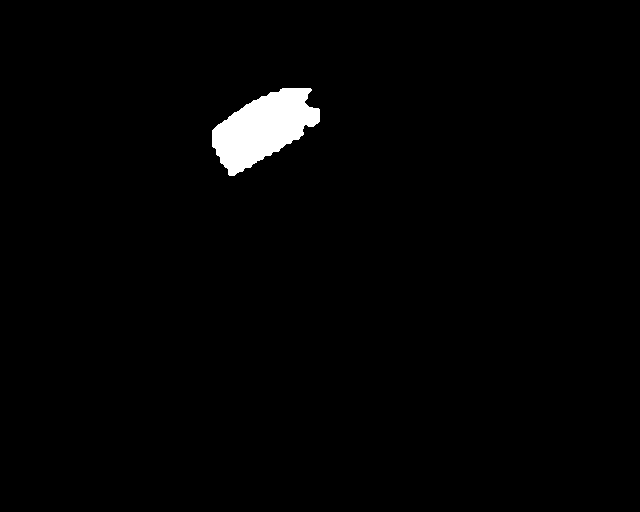

Number of Contours found = 1


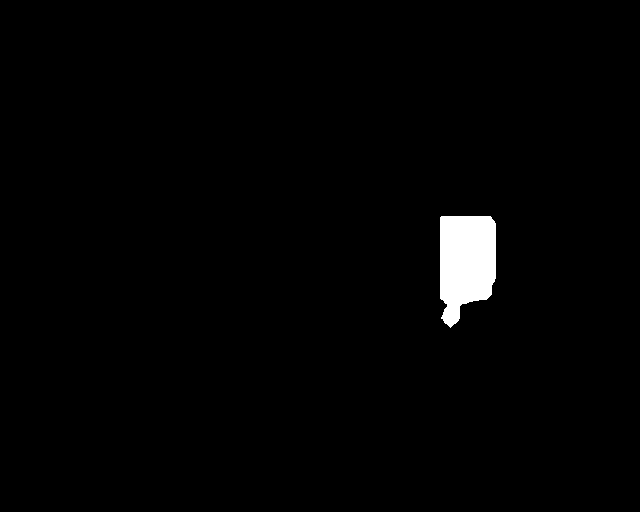

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole77.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 17.6ms
Speed: 0.5ms pre-process, 17.6ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


3


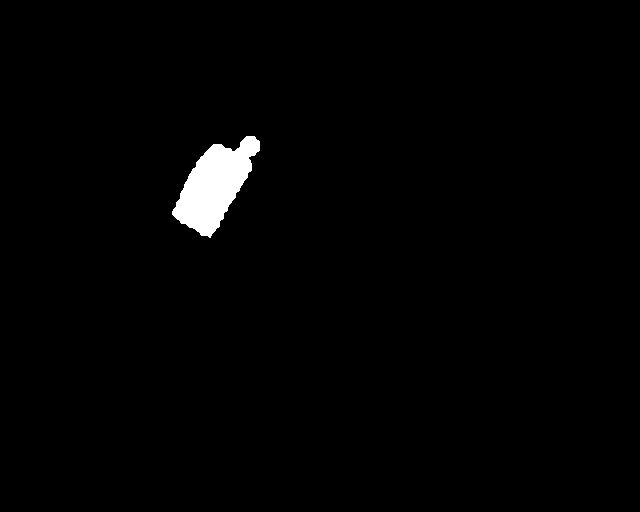

Number of Contours found = 1


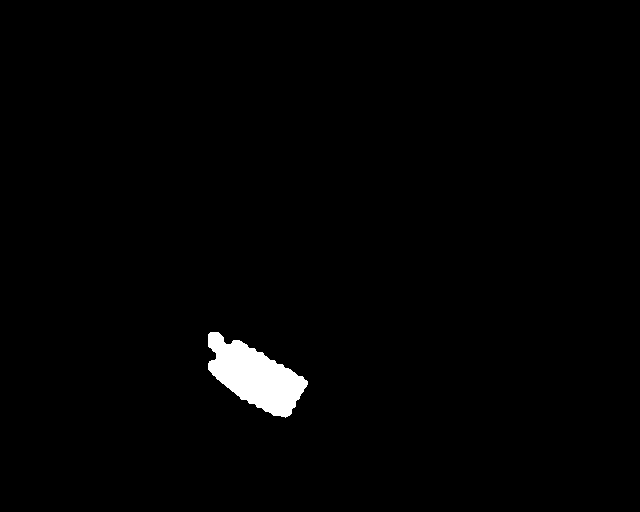

Number of Contours found = 1


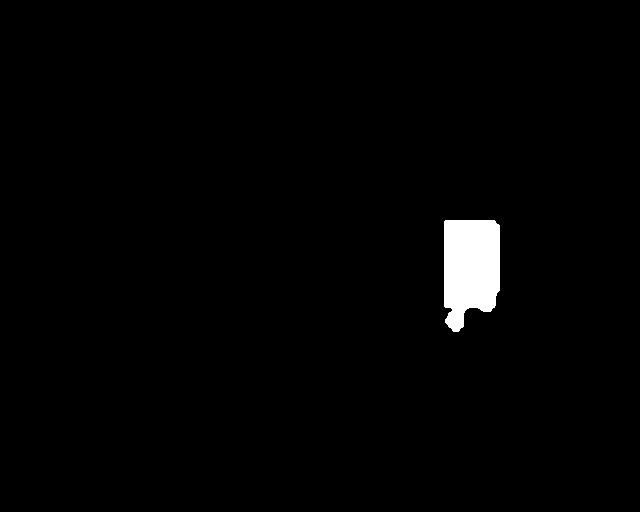

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole78.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


3


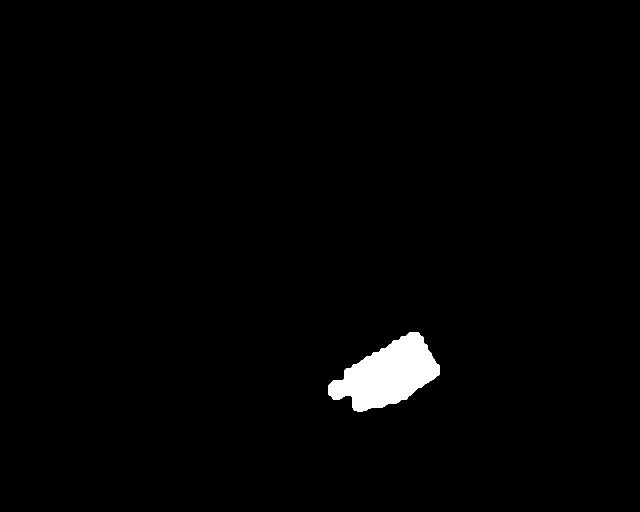

Number of Contours found = 1


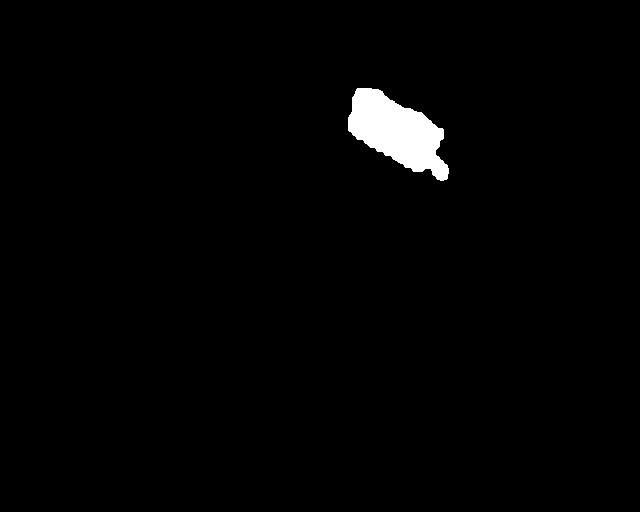

Number of Contours found = 1


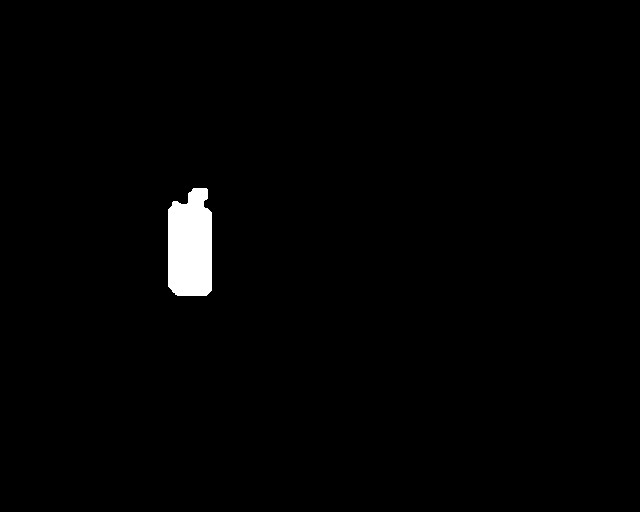

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole79.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


3


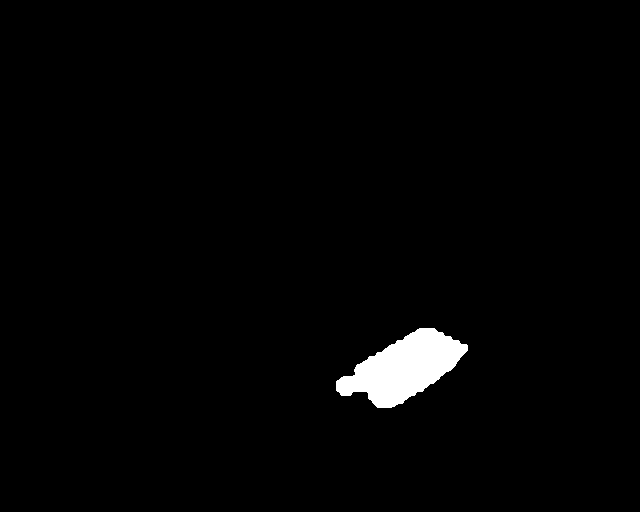

Number of Contours found = 1


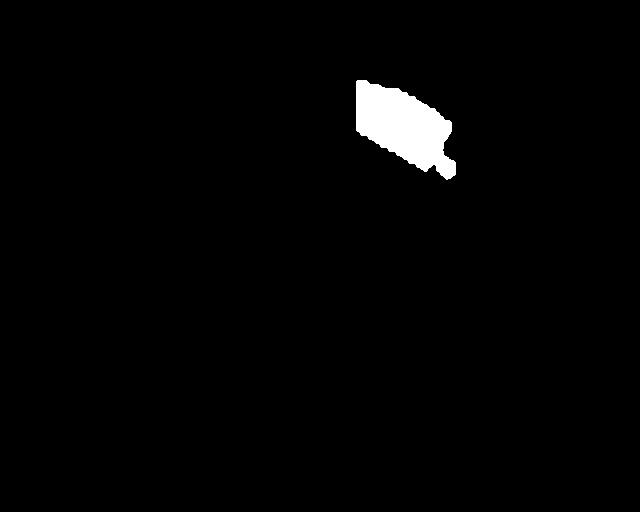

Number of Contours found = 1


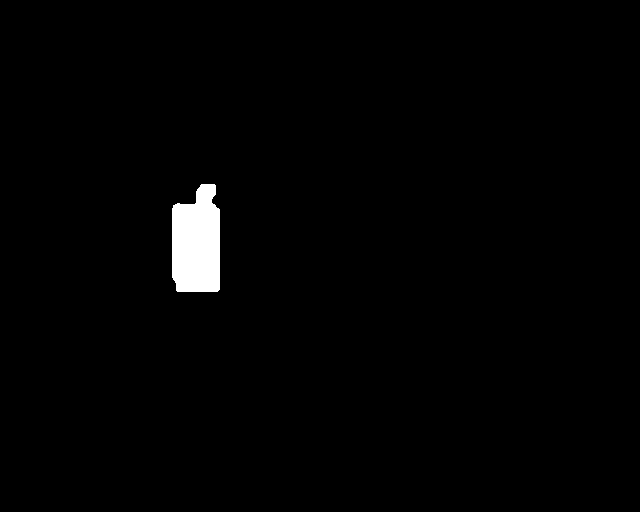

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole80.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 17.1ms
Speed: 0.7ms pre-process, 17.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


2


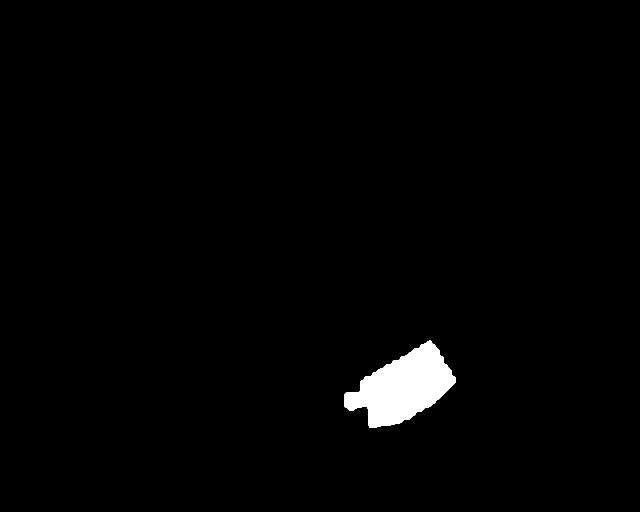

Number of Contours found = 1


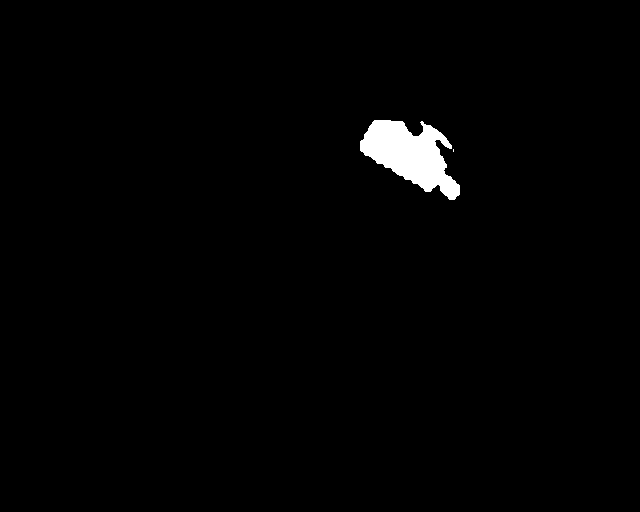

Number of Contours found = 2


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole81.jpg: 512x640 1 11_SignalPad, 1 None, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)



2


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole82.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 1 None, 17.8ms
Speed: 0.5ms pre-process, 17.8ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


4


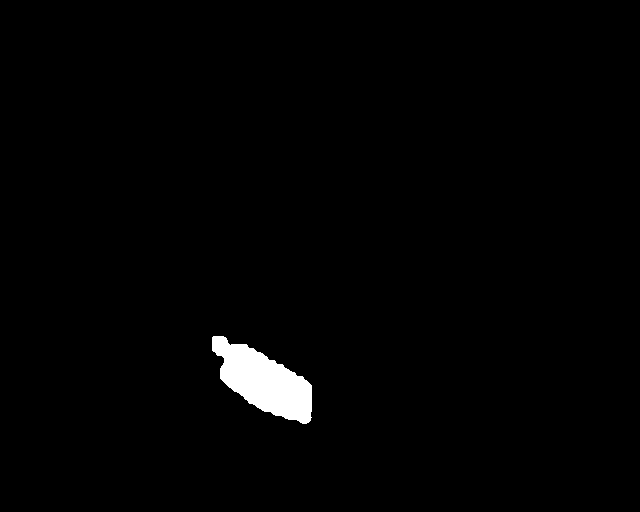

Number of Contours found = 1


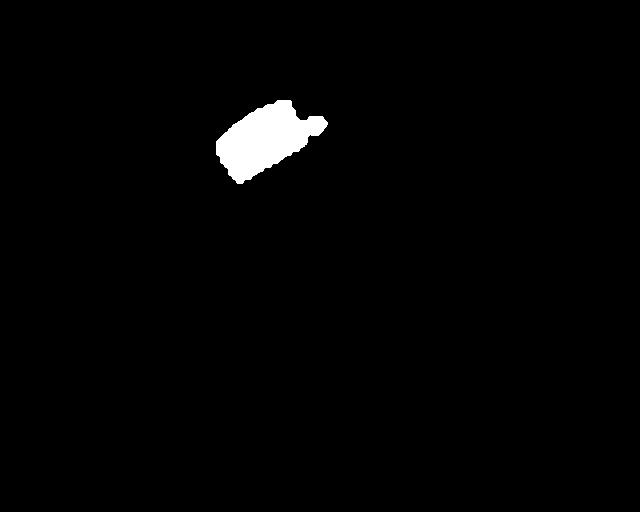

Number of Contours found = 1


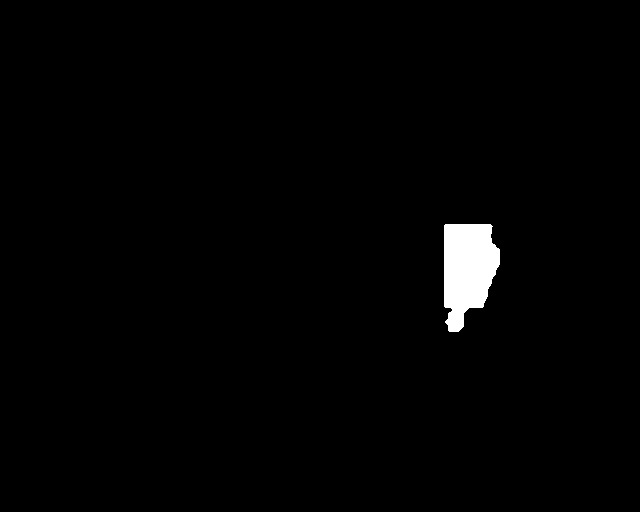

Number of Contours found = 1


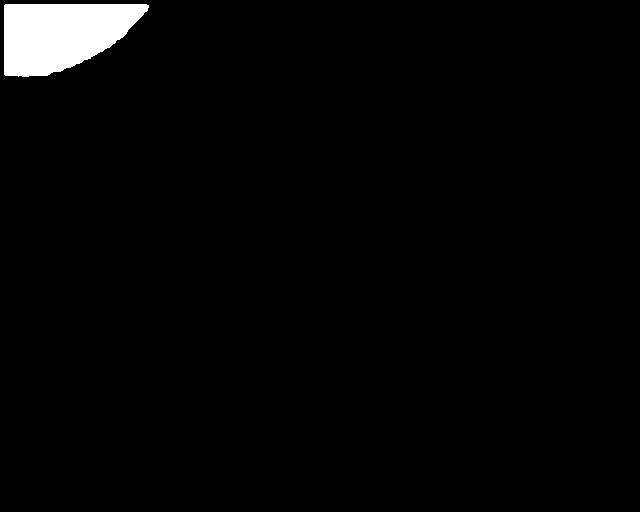

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole83.jpg: 512x640 1 1_SignalPad, 17.1ms
Speed: 0.7ms pre-process, 17.1ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


1


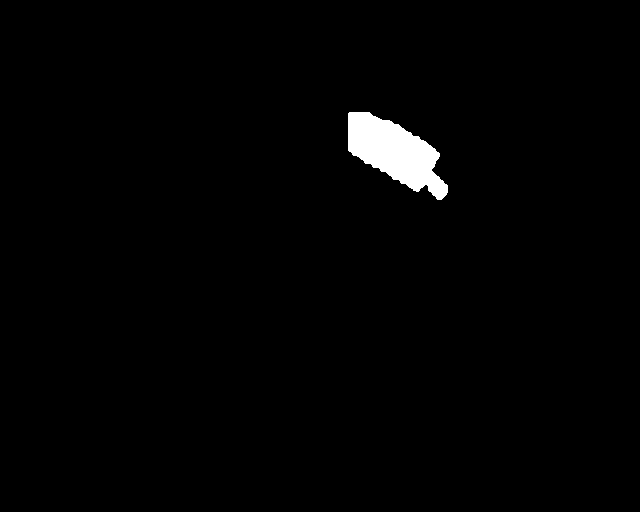

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole84.jpg: 512x640 1 11_SignalPad, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


1


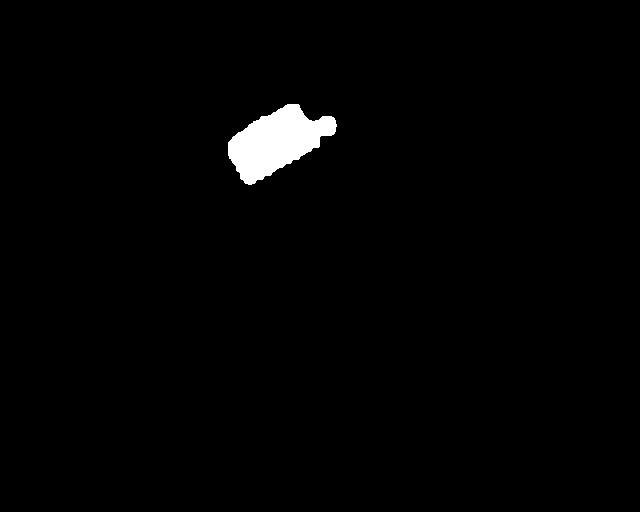

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole85.jpg: 512x640 1 5_SignalPad, 17.1ms
Speed: 0.7ms pre-process, 17.1ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


1


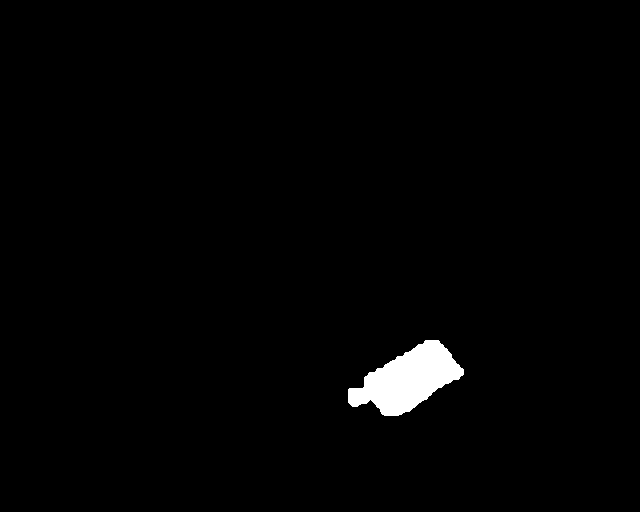

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole86.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


3


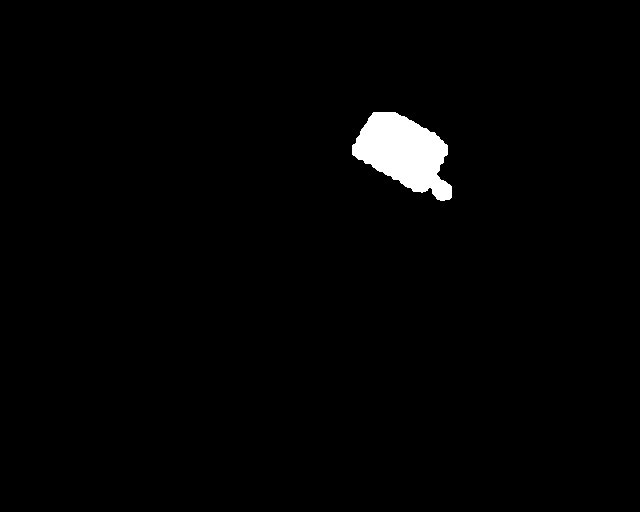

Number of Contours found = 1


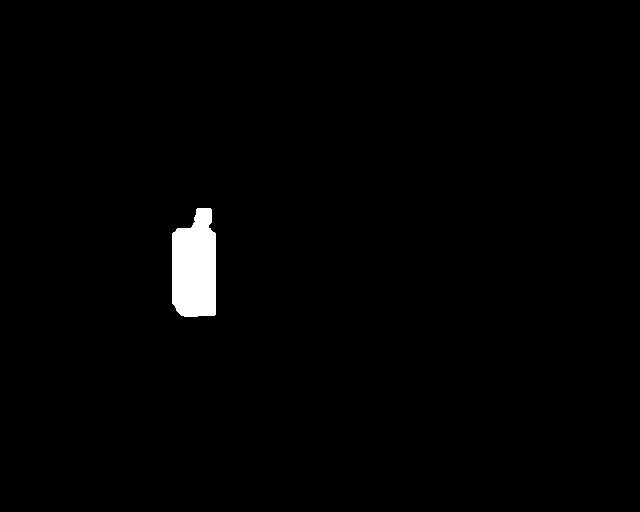

Number of Contours found = 1


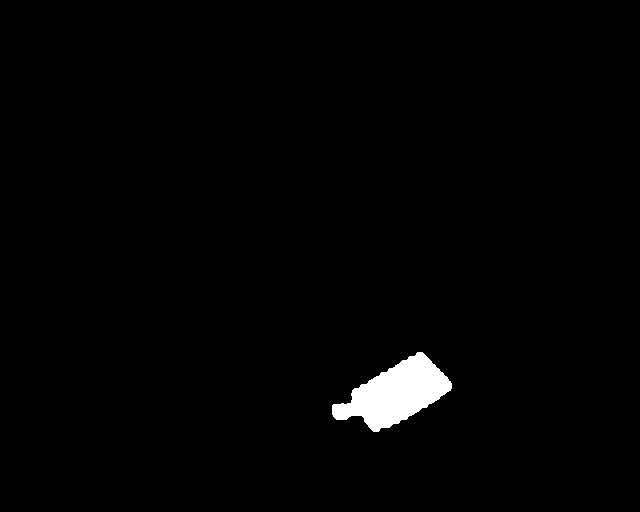

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole87.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 20.4ms
Speed: 0.6ms pre-process, 20.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


3


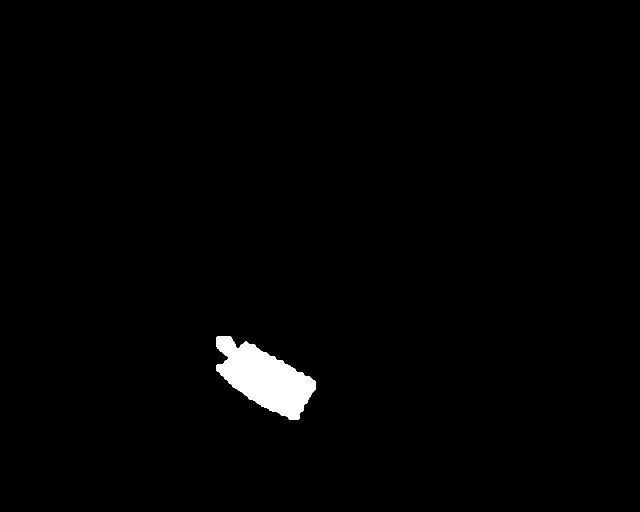

Number of Contours found = 1


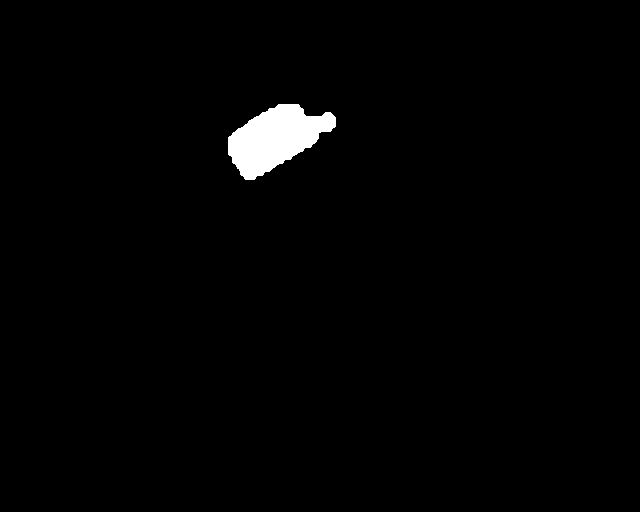

Number of Contours found = 1


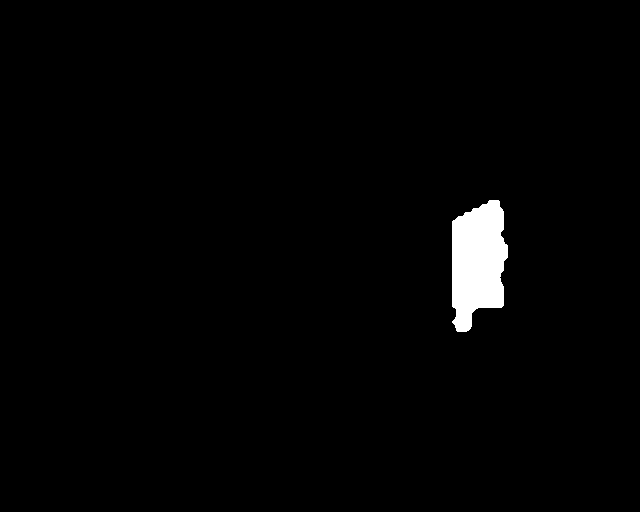

Number of Contours found = 1

image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole88.jpg: 512x640 1 3_SignalPad, 1 7_SignalPad, 17.0ms
Speed: 0.7ms pre-process, 17.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


2


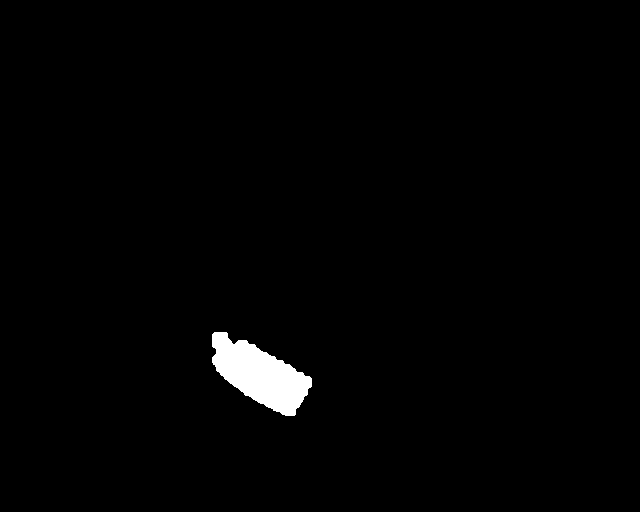

Number of Contours found = 1


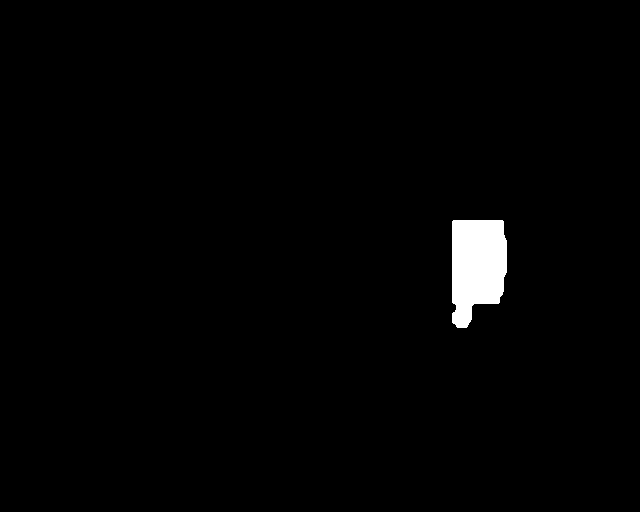

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole89.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.0ms
Speed: 0.7ms pre-process, 17.0ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


3


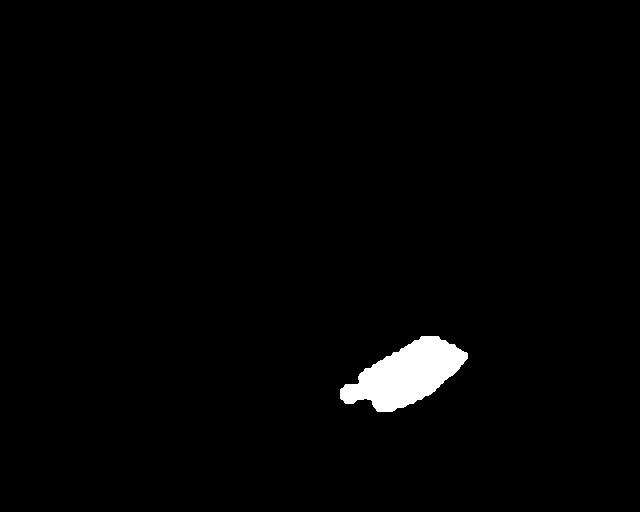

Number of Contours found = 1


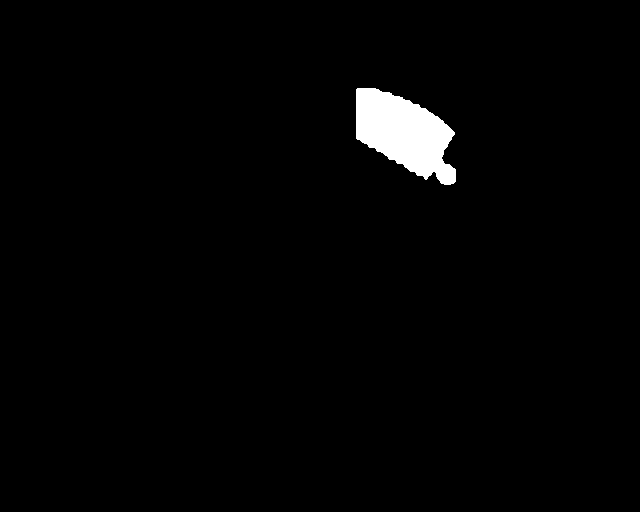

Number of Contours found = 1


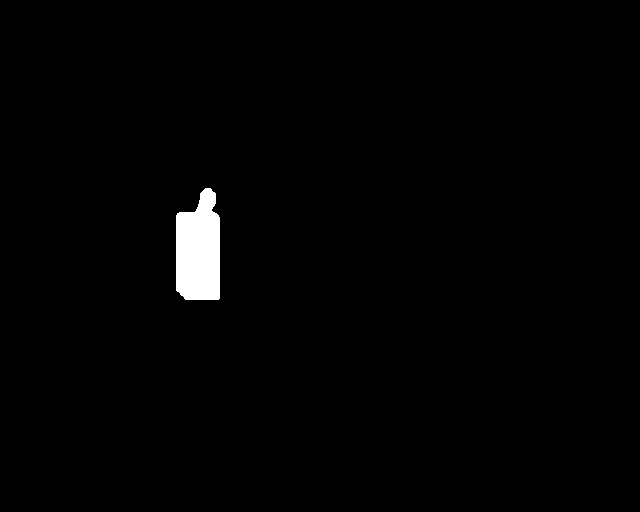

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole90.jpg: 512x640 1 11_SignalPad, 1 3_SignalPad, 1 7_SignalPad, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


3


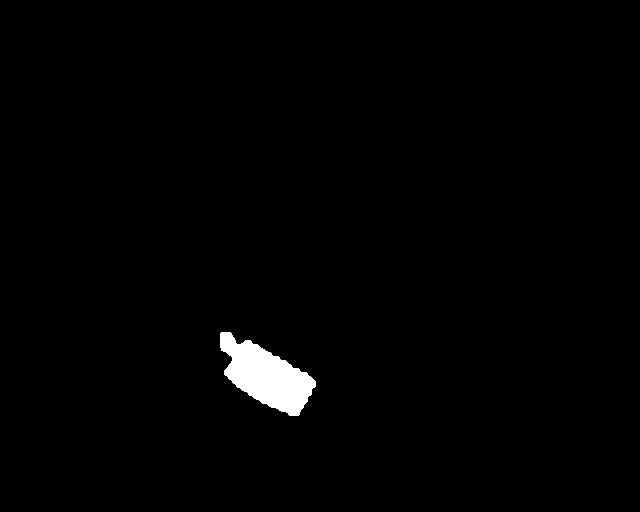

Number of Contours found = 1


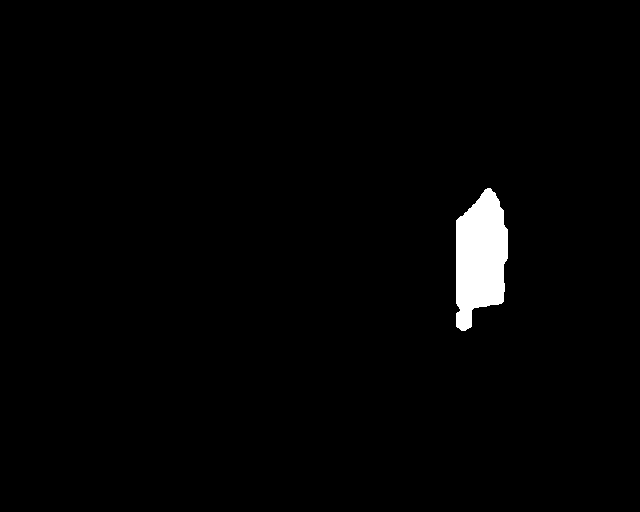

Number of Contours found = 1


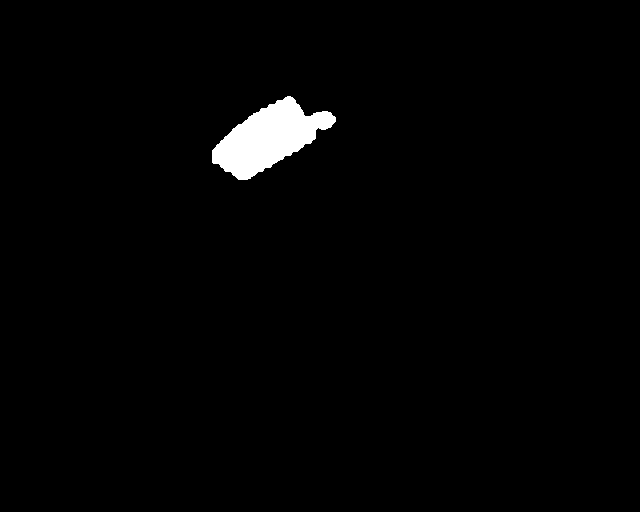

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole91.jpg: 512x640 1 1_SignalPad, 1 5_SignalPad, 1 9_SignalPad, 17.0ms
Speed: 0.5ms pre-process, 17.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


3


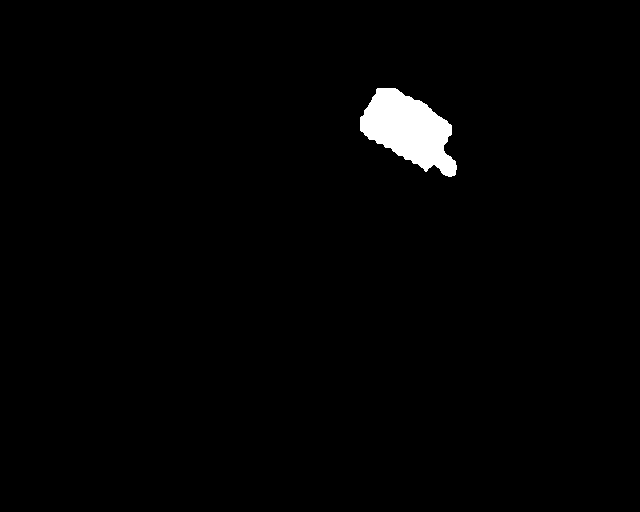

Number of Contours found = 1


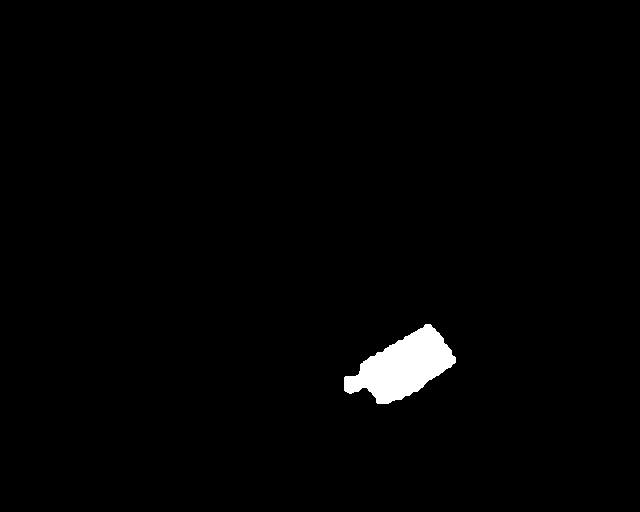

Number of Contours found = 1


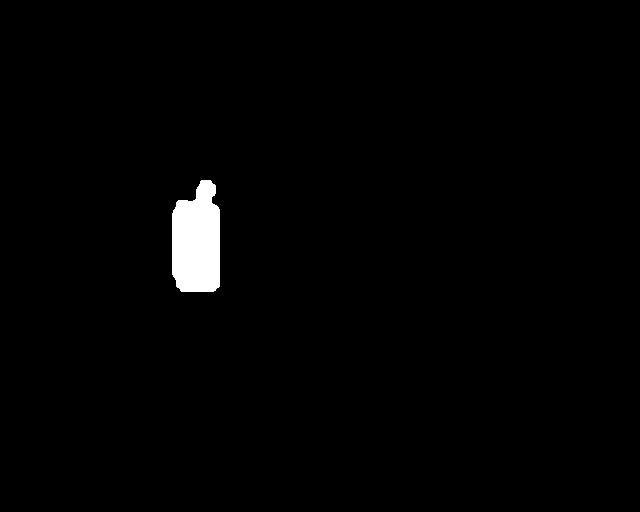

Number of Contours found = 1


image 1/1 /content/drive/MyDrive/Dataset/Stage1_PCB/Hole92.jpg: 512x640 1 None, 17.1ms
Speed: 0.6ms pre-process, 17.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


1


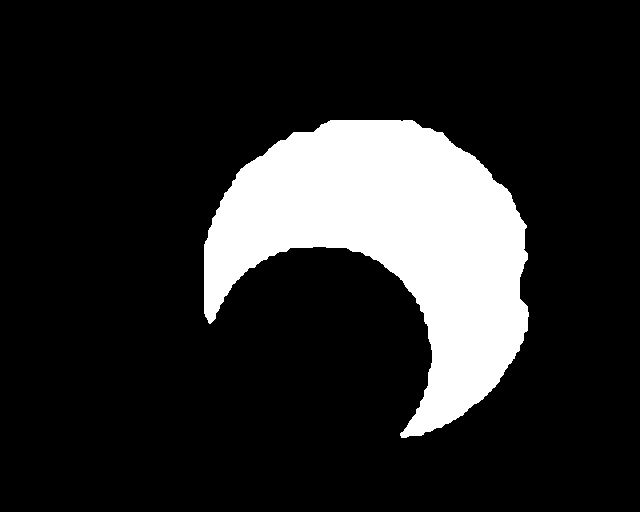

Number of Contours found = 1


,Area11,Area1,Area3,Area5,Area7,Area9
0,0.0,5048.0,0.0,4840.0,0.0,4411.5
1,5417.5,0.0,5271.5,0.0,4359.5,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,5268.0,0.0,4263.5,0.0
4,5374.0,0.0,4743.5,0.0,4336.0,0.0
...,...,...,...,...,...,...
87,0.0,0.0,4870.5,0.0,4559.0,0.0
88,0.0,6045.0,0.0,5397.0,0.0,4157.0
89,5344.0,0.0,5478.5,0.0,4274.5,0.0
90,0.0,5054.5,0.0,4798.0,0.0,4565.0


In [ ]:
import cv2
import numpy as np
import pandas as pd


Area11=[0]*92
Area1=[0]*92
Area3=[0]*92
Area5=[0]*92
Area7=[0]*92
Area9=[0]*92

my_model = YOLO('/content/best.pt')
for i in range(1,93):
  results = list(my_model(f'/content/drive/MyDrive/Dataset/Stage1_PCB/Hole{i}.jpg', conf=0.128))
  result=results[0]
  maskList=[]
  test_list=result.boxes.cls.cpu().numpy().tolist()
  classes=[]
  [classes.append(x) for x in test_list if x not in classes]
  print(len(classes))
  idx=-1
  if 6 in classes: idx=classes.index(6)
  p=0
  idxMap={}
  for cls in classes:
    idxMap[cls]=classes.index(cls)

  for a in range(len(classes)):
    if p==idx and idx!=-1 and p<len(classes)-1:
      continue
    else:
      maskList.append((result.masks.masks[a].cpu().numpy() * 255).astype("uint8"))
    p+=1

  q=0
  for mask in maskList:

    #cv2_imshow(mask)
    # # Find Canny edges
    edged = cv2.Canny(mask, 30, 200)


    # Finding Contours
    # Use a copy of the image e.g. edged.copy()
    # since findContours alters the image
    contours, hierarchy = cv2.findContours(edged,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)



    print("Number of Contours found = " + str(len(contours)))

    #cv2.drawContours(mask, contours, -1, (0, 255, 0), 3)

    for j in range(0,len(contours)):
      if classes[q]!=6 or q>3:
        area=cv2.contourArea(contours[j])
        if classes[q]==0:
          Area11[i-1]=area
        elif classes[q]==1:
          Area1[i-1]=area
        elif classes[q]==2:
          Area3[i-1]=area
        elif classes[q]==3:
          Area5[i-1]=area
        elif classes[q]==4:
          Area7[i-1]=area
        elif classes[q]==5:
          Area9[i-1]=area
      else:
        continue
    q+=1


data={'Area11':Area11,'Area1':Area1,'Area3':Area3,'Area5':Area5,'Area7':Area7,'Area9':Area9}

df=pd.DataFrame(data)

df




In [ ]:
# saving the dataframe
df.to_csv('v2.csv')


In [ ]:
import cv2
import numpy as np
import pandas as pd

maskList=[]
my_model = YOLO('/content/best.pt')
for i in range(1,93):
  results = list(my_model(f'/content/drive/MyDrive/Dataset/Stage1_PCB/Hole{i}.jpg', conf=0.128,verbose=False))
  result=results[0]

  test_list=result.boxes.cls.cpu().numpy().tolist()
  #print(len(test_list))
  if len(test_list)>3:
    maskList.append(i)
print(maskList)

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11782309 parameters, 0 gradients, 42.5 GFLOPs


[2, 24, 48, 76, 82]
